In [2]:
import os
import glob
import numpy as np
import pandas as pd
import sys
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats
%matplotlib inline
%load_ext autoreload
%autoreload 2
sys.path.insert(0, "../")

In [3]:
import bz2
import _pickle as cPickle
def read_pbz2(f_name):
    with bz2.BZ2File(f_name, 'rb') as f:
        data = cPickle.load(f)
    return data

In [97]:
ld_scores_ord = ["LDSC", "L2", "LD2MAF", "LD2"]
trait_subset = [
        "Age at Menarche", "Age at Menopause", "Height", 
        "BMI", "Waist-hip Ratio", "Systolic Blood Pressure",
        "High Cholesterol", "Type 2 diabetes", "Respiratory and Ear-nose-throat Diseases",
        "Auto Immune Traits (Sure)", "Eczema", "Hypothyroidism"
    ]

ld_scores_colors = {
    'LDSC': '#F28E2B',
    'LD2': '#E15759',
    'LD2MAF': '#76B7B2',
    'L2': '#B07AA1'
}

metric_tex = {
    'hg2': '$h_g^2$',
    'Intercept': 'Intercept',
    'Ratio': 'Ratio'
}

In [103]:
metric_df = pd.read_csv("../tables/table_1/M/global_metrics.csv")
metric_df = metric_df.loc[~metric_df['Method'].isin(['L2', 'S-L2'])]
metric_df.head()

Method Metric     Score  Score SE            Trait
0      LDSC    hg2  0.125718  0.007208  Waist-hip Ratio
1    S-LDSC    hg2  0.170511  0.007208  Waist-hip Ratio
4    LD2MAF    hg2  0.135975  0.006910  Waist-hip Ratio
5  S-LD2MAF    hg2  0.167315  0.006910  Waist-hip Ratio
6       LD2    hg2  0.145946  0.006748  Waist-hip Ratio

In [95]:
metric_df['Metric'].unique()

array(['hg2', 'Intercept', 'Ratio'], dtype=object)

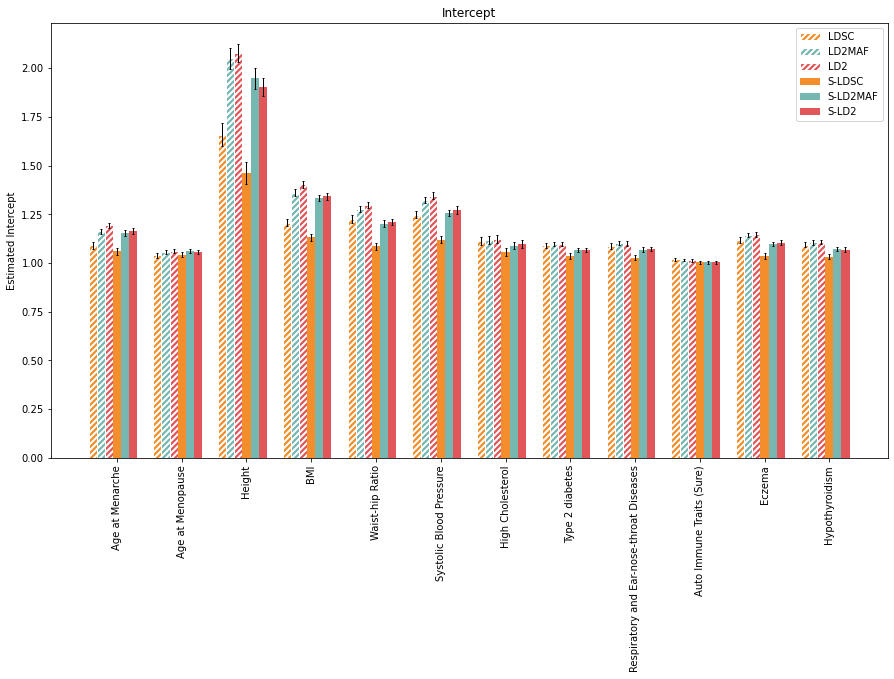

In [104]:
def plot_global_metric(metric_df, metric, relative_to=None):
    
    
    metric_df = metric_df.loc[metric_df['Metric'] == metric]
    
    mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                                 values='Score')
    se_pivot = metric_df.pivot(index='Trait', columns='Method',
                               values='Score SE')
    
    if relative_to is not None:
        
        se_pivot = 100.0*se_pivot.div(mean_pivot[relative_to], axis=0)
        mean_pivot = 100.0*(mean_pivot.div(mean_pivot[relative_to], axis=0) - 1.0)
        
        mean_pivot.drop(relative_to, axis=1, inplace=True)
        se_pivot.drop(relative_to, axis=1, inplace=True)
        
    
    methods = [lds for lds in ld_scores_ord
               if lds in mean_pivot.columns]
    methods += ['S-' + lds for lds in ld_scores_ord
               if 'S-' + lds in mean_pivot.columns]
    
    mean_dict = {
        k: [v[t] for t in trait_subset]
        for k, v in mean_pivot.to_dict().items()
    }
    se_dict = {
        k: [v[t] for t in trait_subset]
        for k, v in se_pivot.to_dict().items()
    }
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    width = 1.0
    x = np.arange(len(mean_dict['LDSC']))*2*width*(1 + len(methods) // 2)
    
    for idx, m in enumerate(methods):
        rect = ax.bar(x - (len(methods)//2 - idx)*width,
                      mean_dict[m],
                      width, yerr=se_dict[m],
                      label=m,
                      color=ld_scores_colors[m.replace('S-', '')],
                      error_kw=dict(lw=1, capsize=width, capthick=1))
        if m[:2] != 'S-':
            for bar in rect:
                bar.set_hatch('////')
                bar.set_edgecolor('white')
        
    ax.set_xticks(x)
    ax.set_xticklabels(trait_subset)
    
    for label in ax.get_xmajorticklabels():
        label.set_rotation(90)
    
    if relative_to is None:
        plt.ylabel(f"Estimated {metric_tex[metric]}")
    else:
        plt.ylabel(f"{metric_tex[metric]} (% difference w.r.t. {relative_to})")
    
    plt.title(f"{metric_tex[metric]}")
    plt.legend()
    
    
plot_global_metric(metric_df, 'Intercept')

In [79]:
s_metric_df = metric_df.loc[metric_df['Metric'] == 'hg2']
piv = s_metric_df.pivot(index='Trait', columns='Method', values='Score')
piv

Method                                         LD2    LD2MAF      LDSC  \
Trait                                                                    
Age at Menarche                           0.234340  0.221894  0.214724   
Age at Menopause                          0.102260  0.097412  0.092621   
Auto Immune Traits (Sure)                 0.005745  0.004943  0.004248   
BMI                                       0.261647  0.244400  0.236561   
Eczema                                    0.064925  0.061161  0.057496   
Height                                    0.669641  0.570450  0.569248   
High Cholesterol                          0.038195  0.035506  0.032455   
Hypothyroidism                            0.042533  0.039396  0.036297   
Respiratory and Ear-nose-throat Diseases  0.044419  0.040514  0.038255   
Systolic Blood Pressure                   0.203473  0.189054  0.177064   
Type 2 diabetes                           0.037071  0.034060  0.031065   
Waist-hip Ratio                           0.145946  0.135975  0.125718   

Method                                       S-LD2  S-LD2MAF    S-LDSC  
Trait                                                                   
Age at Menarche                           0.240060  0.248356  0.252985  
Age at Menopause                          0.109319  0.107113  0.109313  
Auto Immune Traits (Sure)                 0.010026  0.010448  0.009776  
BMI                                       0.265439  0.272409  0.277874  
Eczema                                    0.078387  0.081483  0.084652  
Height                                    0.684020  0.659482  0.674005  
High Cholesterol                          0.047374  0.050572  0.050661  
Hypothyroidism                            0.052882  0.053070  0.054570  
Respiratory and Ear-nose-throat Diseases  0.054880  0.056957  0.059306  
Systolic Blood Pressure                   0.224273  0.229509  0.231899  
Type 2 diabetes                           0.046757  0.047603  0.048157  
Waist-hip Ratio                           0.164152  0.167315  0.170511

In [84]:
100.0*(piv.div(piv['S-LDSC'],axis=0) - 1.0)

Method                                          LD2     LD2MAF       LDSC  \
Trait                                                                       
Age at Menarche                           -7.369776 -12.289359 -15.123636   
Age at Menopause                          -6.451530 -10.886283 -15.269556   
Auto Immune Traits (Sure)                -41.231520 -49.433223 -56.549037   
BMI                                       -5.839827 -12.046306 -14.867636   
Eczema                                   -23.303404 -27.750313 -32.079714   
Height                                    -0.647506 -15.364118 -15.542396   
High Cholesterol                         -24.606876 -29.913045 -35.936903   
Hypothyroidism                           -22.057873 -27.806973 -33.484648   
Respiratory and Ear-nose-throat Diseases -25.101511 -31.687616 -35.495425   
Systolic Blood Pressure                  -12.257944 -18.476045 -23.646057   
Type 2 diabetes                          -23.019795 -29.272423 -35.492460   
Waist-hip Ratio                          -14.406450 -20.254454 -26.269453   

Method                                       S-LD2  S-LD2MAF  S-LDSC  
Trait                                                                 
Age at Menarche                          -5.108785 -1.829781     0.0  
Age at Menopause                          0.005933 -2.012422     0.0  
Auto Immune Traits (Sure)                 2.561533  6.880849     0.0  
BMI                                      -4.475218 -1.966567     0.0  
Eczema                                   -7.401289 -3.743554     0.0  
Height                                    1.485892 -2.154692     0.0  
High Cholesterol                         -6.488317 -0.174417     0.0  
Hypothyroidism                           -3.093051 -2.748339     0.0  
Respiratory and Ear-nose-throat Diseases -7.462868 -3.961097     0.0  
Systolic Blood Pressure                  -3.288520 -1.030794     0.0  
Type 2 diabetes                          -2.906583 -1.150274     0.0  
Waist-hip Ratio                          -3.729315 -1.873941     0.0

In [87]:
se_piv = s_metric_df.pivot(index='Trait', columns='Method', values='Score SE')
100.0*(se_piv.div(piv['S-LDSC'],axis=0))

Method                                          LD2     LD2MAF       LDSC  \
Trait                                                                       
Age at Menarche                            3.674976   3.568902   4.071681   
Age at Menopause                           7.849152   8.353980   9.012143   
Auto Immune Traits (Sure)                 15.060947  16.940458  17.287474   
BMI                                        2.357358   2.445312   2.408083   
Eczema                                     5.975461   5.913190   6.853819   
Height                                     4.116171   3.925277   3.874863   
High Cholesterol                           6.521766   7.983870   7.650153   
Hypothyroidism                             6.655482   6.278331   6.567773   
Respiratory and Ear-nose-throat Diseases   6.263929   6.446900   7.018307   
Systolic Blood Pressure                    3.735503   3.425084   3.601674   
Type 2 diabetes                            5.366532   5.754087   6.295736   
Waist-hip Ratio                            3.957241   4.052682   4.227385   

Method                                        S-LD2   S-LD2MAF     S-LDSC  
Trait                                                                      
Age at Menarche                            3.674976   3.568902   4.071681  
Age at Menopause                           7.849152   8.353980   9.012143  
Auto Immune Traits (Sure)                 15.060947  16.940458  17.287474  
BMI                                        2.357358   2.445312   2.408083  
Eczema                                     5.975461   5.913190   6.853819  
Height                                     4.116171   3.925277   3.874863  
High Cholesterol                           6.521766   7.983870   7.650153  
Hypothyroidism                             6.655482   6.278331   6.567773  
Respiratory and Ear-nose-throat Diseases   6.263929   6.446900   7.018307  
Systolic Blood Pressure                    3.735503   3.425084   3.601674  
Type 2 diabetes                            5.366532   5.754087   6.295736  
Waist-hip Ratio                            3.957241   4.052682   4.227385

In [127]:
annot_df = pd.read_csv("../tables/table_1/UKBB_data/M_5_50_chi2filt/annotation_metrics.csv")
annot_df

Annotation Method    Metric  \
0                                                 base   LDSC       tau   
1                                          Coding_UCSC   LDSC       tau   
2                             Coding_UCSC.flanking.500   LDSC       tau   
3                                Conserved_LindbladToh   LDSC       tau   
4                   Conserved_LindbladToh.flanking.500   LDSC       tau   
...                                                ...    ...       ...   
9307               Ancient_Sequence_Age_Human_Enhancer    LD2  tau_star   
9308  Ancient_Sequence_Age_Human_Enhancer.flanking.500    LD2  tau_star   
9309      Human_Enhancer_Villar_Species_Enhancer_Count    LD2  tau_star   
9310                        Human_Promoter_Villar_ExAC    LD2  tau_star   
9311           Human_Promoter_Villar_ExAC.flanking.500    LD2  tau_star   

             Score      Score SE                      Trait  
0    -1.384078e-08  1.062908e-08            Waist-hip Ratio  
1    -1.053403e-07  7.104801e-08            Waist-hip Ratio  
2    -4.029699e-08  2.095052e-08            Waist-hip Ratio  
3     1.850435e-07  1.004346e-07            Waist-hip Ratio  
4    -7.168398e-09  1.150134e-08            Waist-hip Ratio  
...            ...           ...                        ...  
9307  1.333983e+00  2.711449e+00  Auto Immune Traits (Sure)  
9308  4.666416e+00  2.640031e+00  Auto Immune Traits (Sure)  
9309 -8.431309e-02  1.320818e+00  Auto Immune Traits (Sure)  
9310  3.288557e-01  1.830911e+00  Auto Immune Traits (Sure)  
9311  5.675541e+00  3.156102e+00  Auto Immune Traits (Sure)  

[9312 rows x 6 columns]

In [167]:

metric = 'tau_star'
annot_subset = ['MAF_Adj_Predicted_Allele_Age', 'MAF_Adj_LLD_AFR',
       'Recomb_Rate_10kb', 'Nucleotide_Diversity_10kb',
       'Backgrd_Selection_Stat', 'CpG_Content_50kb', 'MAF_Adj_ASMC']
ma_type = 'random'

meta_results = []
meta_results_se = []

for method in annot_df['Method'].unique():

    m_annot_df = annot_df.loc[(annot_df['Method'] == method) & 
                              (annot_df['Metric'] == metric) & 
                              (annot_df['Annotation'].isin(annot_subset))]

    piv_annot = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score')
    piv_annot_se = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score SE')

    meta_res = {'Method': method}
    meta_res_se = {'Method': method}
    
    for annot in list(piv_annot.index):
        
        res = dict(meta.metagen(ro.FloatVector(piv_annot.loc[annot].values),
                                ro.FloatVector(piv_annot_se.loc[annot].values)).items())
        
        if ma_type == 'fixed':
            meta_res[annot] = list(res['TE.fixed'].items())[0][1]
            meta_res_se[annot] = list(res['seTE.fixed'].items())[0][1]
        elif ma_type == 'random':
            meta_res[annot] = list(res['TE.random'].items())[0][1]
            meta_res_se[annot] = list(res['seTE.random'].items())[0][1]
        
    
    meta_results.append(meta_res)
    meta_results_se.append(meta_res_se)

pd.DataFrame(meta_results).set_index('Method').T
pd.DataFrame(meta_results_se).set_index('Method').T

Method                            LDSC        L2    LD2MAF       LD2
Backgrd_Selection_Stat        0.019538  0.019613  0.019150  0.096350
CpG_Content_50kb              0.046955  0.046858  0.048146  0.157059
MAF_Adj_ASMC                  0.026368  0.026369  0.024116  0.092594
MAF_Adj_LLD_AFR               0.019401  0.019381  0.019809  0.071194
MAF_Adj_Predicted_Allele_Age  0.034668  0.034727  0.038998  0.119493
Nucleotide_Diversity_10kb     0.020963  0.020932  0.021106  0.085823
Recomb_Rate_10kb              0.019383  0.019352  0.019361  0.066396

In [157]:
{'Backgrd_Selection_Stat': 0.071771277583601, 'CpG_Content_50kb': 0.1471742350047609, 'MAF_Adj_ASMC': -0.22128483530494172, 'MAF_Adj_LLD_AFR': -0.1701594572691381, 'MAF_Adj_Predicted_Allele_Age': -0.09376181521815677, 'Nucleotide_Diversity_10kb': -0.031203527581468174, 'Recomb_Rate_10kb': -0.16600250827409252}

{'Backgrd_Selection_Stat': 0.071771277583601,
 'CpG_Content_50kb': 0.1471742350047609,
 'MAF_Adj_ASMC': -0.22128483530494172,
 'MAF_Adj_LLD_AFR': -0.1701594572691381,
 'MAF_Adj_Predicted_Allele_Age': -0.09376181521815677,
 'Nucleotide_Diversity_10kb': -0.031203527581468174,
 'Recomb_Rate_10kb': -0.16600250827409252}

In [140]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
meta = importr('meta')

In [151]:
res = dict(meta.metagen(ro.FloatVector([1.2, 3.4, 5.6]), ro.FloatVector([0.1, 0.09, 0.25])).items())

In [155]:
list(res['TE.random'].items())[0][1], list(res['TE.fixed'].items())[0][1]

(3.3878938696170184, 2.62825324809239)

In [166]:
res

{'studlab': R object with classes: ('RTYPES.INTSXP',) mapped to:
 [1, 2, 3, 4, ..., 9, 10, 11, 12],
 'TE': R object with classes: ('numeric',) mapped to:
 [-0.791920, -0.451873, -0.009486, -0.665859, ..., -0.717099, -0.536848, -0.047118, -0.550455],
 'seTE': R object with classes: ('numeric',) mapped to:
 [0.184422, 0.407071, 0.799283, 0.139534, ..., 0.294376, 0.168101, 0.371319, 0.198370],
 'lower': R object with classes: ('numeric',) mapped to:
 [-1.153381, -1.249717, -1.576053, -0.939340, ..., -1.294065, -0.866320, -0.774890, -0.939254],
 'upper': R object with classes: ('numeric',) mapped to:
 [-0.430458, 0.345972, 1.557080, -0.392378, ..., -0.140132, -0.207376, 0.680653, -0.161657],
 'zval': R object with classes: ('numeric',) mapped to:
 [-4.294052, -1.110059, -0.011869, -4.772034, ..., -2.435994, -3.193604, -0.126895, -2.774889],
 'pval': R object with classes: ('numeric',) mapped to:
 [0.000018, 0.266974, 0.990530, 0.000002, ..., 0.014851, 0.001405, 0.899024, 0.005522],
 'w.fix

In [172]:
annot_df['Annotation'].unique()

array(['base', 'Coding_UCSC', 'Coding_UCSC.flanking.500',
       'Conserved_LindbladToh', 'Conserved_LindbladToh.flanking.500',
       'CTCF_Hoffman', 'CTCF_Hoffman.flanking.500', 'DGF_ENCODE',
       'DGF_ENCODE.flanking.500', 'DHS_peaks_Trynka', 'DHS_Trynka',
       'DHS_Trynka.flanking.500', 'Enhancer_Andersson',
       'Enhancer_Andersson.flanking.500', 'Enhancer_Hoffman',
       'Enhancer_Hoffman.flanking.500', 'FetalDHS_Trynka',
       'FetalDHS_Trynka.flanking.500', 'H3K27ac_Hnisz',
       'H3K27ac_Hnisz.flanking.500', 'H3K27ac_PGC2',
       'H3K27ac_PGC2.flanking.500', 'H3K4me1_peaks_Trynka',
       'H3K4me1_Trynka', 'H3K4me1_Trynka.flanking.500',
       'H3K4me3_peaks_Trynka', 'H3K4me3_Trynka',
       'H3K4me3_Trynka.flanking.500', 'H3K9ac_peaks_Trynka',
       'H3K9ac_Trynka', 'H3K9ac_Trynka.flanking.500', 'Intron_UCSC',
       'Intron_UCSC.flanking.500', 'PromoterFlanking_Hoffman',
       'PromoterFlanking_Hoffman.flanking.500', 'Promoter_UCSC',
       'Promoter_UCSC.flankin

In [225]:
df = pd.read_csv("/Users/szabad/amaranth/PycharmProjects/modified_ldsr/tables/table_1/UKBB_data/M_5_50_chi2filt/global_metrics.csv")
metric = 'Intercept'
relative_to = 'S-LDSC'

metric_df = df.loc[df['Metric'] == metric]

mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                             values='Score')
se_pivot = metric_df.pivot(index='Trait', columns='Method',
                           values='Score SE')

se_pivot = 100.0 * se_pivot.div(mean_pivot[relative_to], axis=0)
mean_pivot = 100.0 * (mean_pivot.div(mean_pivot[relative_to], axis=0) - 1.0)

mean_pivot.drop(relative_to, axis=1, inplace=True)
mean_pivot.describe()

Method        LD2     LD2MAF       LDSC      S-LD2   S-LD2MAF
count   30.000000  30.000000  30.000000  30.000000  30.000000
mean    15.409734  13.376783   7.665465  10.728270   9.640481
std      9.912975   9.103937   4.949802   7.112490   7.176901
min      1.090518   1.184162  -0.172730   0.108229   0.095446
25%      7.257599   7.081858   3.413911   5.598380   4.601093
50%     13.327594   9.991680   6.195654  10.634694   7.983790
75%     21.892793  19.728712  11.645960  13.664456  13.942507
max     42.164718  40.178491  17.572433  30.231677  33.151020

In [69]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
r_meta = importr('meta')

def meta_analyze_annot(annot_df, metric='tau_star', ma_type='random'):
    meta_results = []
    meta_results_se = []

    for method in annot_df['Method'].unique():

        m_annot_df = annot_df.loc[(annot_df['Method'] == method) &
                                  (annot_df['Metric'] == metric) &
                                  (annot_df['Annotation'].isin(annot_subset))]

        piv_annot = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score')
        piv_annot_se = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score SE')

        meta_res = {'Method': method}
        meta_res_se = {'Method': method}

        for annot in list(piv_annot.index):

            res = dict(r_meta.metagen(ro.FloatVector(piv_annot.loc[annot].values),
                                      ro.FloatVector(piv_annot_se.loc[annot].values)).items())

            if ma_type == 'fixed':
                meta_res[annot] = list(res['TE.fixed'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.fixed'].items())[0][1]
            elif ma_type == 'random':
                meta_res[annot] = list(res['TE.random'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.random'].items())[0][1]

        meta_results.append(meta_res)
        meta_results_se.append(meta_res_se)

    return (pd.DataFrame(meta_results).set_index('Method').T,
            pd.DataFrame(meta_results_se).set_index('Method').T)


In [ ]:
df = pd.read_csv("/Users/szabad/amaranth/PycharmProjects/modified_ldsr/tables/table_1/UKBB_data/M_5_50_chi2filt/annotation_metrics.csv")
ma_df = meta_analyze_annot(df)
ma_df.head()

In [223]:
mean_df = ma_df[0]

In [224]:
mean_df = 100.0 * (mean_df.div(mean_df[relative_to], axis=0) - 1.0)
mean_df.describe()

Method  S-LDSC   S-LD2MAF       S-LD2
count      7.0   7.000000    7.000000
mean       0.0   8.897573  356.314656
std        0.0  19.865207  309.075241
min        0.0  -8.119253    6.008387
25%        0.0  -4.144866  163.243157
50%        0.0   1.419185  297.891481
75%        0.0  17.542238  471.256056
max        0.0  42.188337  921.304296

In [57]:
import bz2
import _pickle as cPickle
def read_pbz2(f_name):
    with bz2.BZ2File(f_name, 'rb') as f:
        data = cPickle.load(f)
    return data

data = read_pbz2("../results/regression/UKBB_data/M_5_50_chi2filt/Height/regression_res.pbz2")
data

{'S-LDSC': {'method': 'S-LDSC',
  'binned_dataframe':          binLD        CHR      baseL2  Coding_UCSCL2  \
  0   -23.799000  10.703935    7.439652       0.190966   
  1    10.731000  10.536891   12.563308       0.266174   
  2    14.275000  10.395291   15.593756       0.308499   
  3    16.964485  10.341486   18.021529       0.343643   
  4    19.192000  10.334836   20.105176       0.371984   
  ..         ...        ...         ...            ...   
  95  225.893000   7.954566  222.239517       3.206562   
  96  234.617030   7.630979  230.520793       3.296655   
  97  243.923000   8.118102  239.435823       3.403712   
  98  253.932000   8.077899  248.954500       3.629866   
  99  265.468000   7.842609  259.676433       3.812293   
  
      Coding_UCSC.flanking.500L2  Conserved_LindbladTohL2  \
  0                     0.475305                 0.291710   
  1                     0.745779                 0.434994   
  2                     0.917640                 0.543698   
  3  

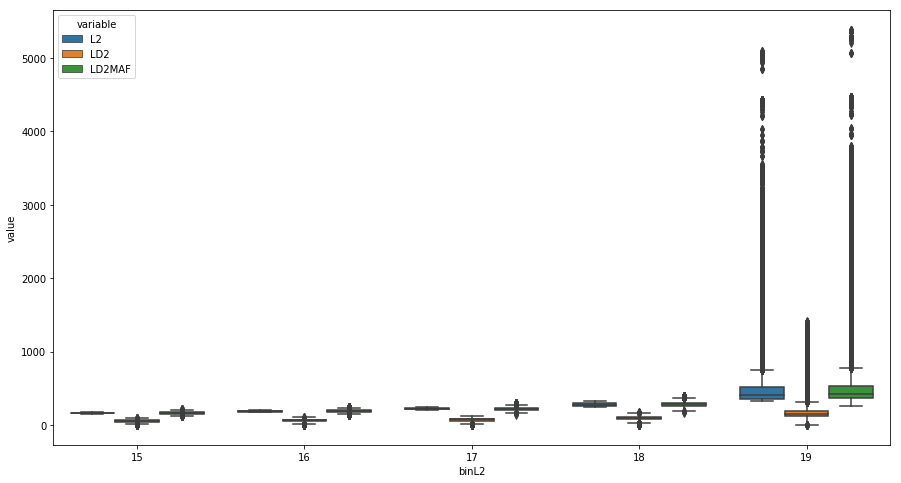

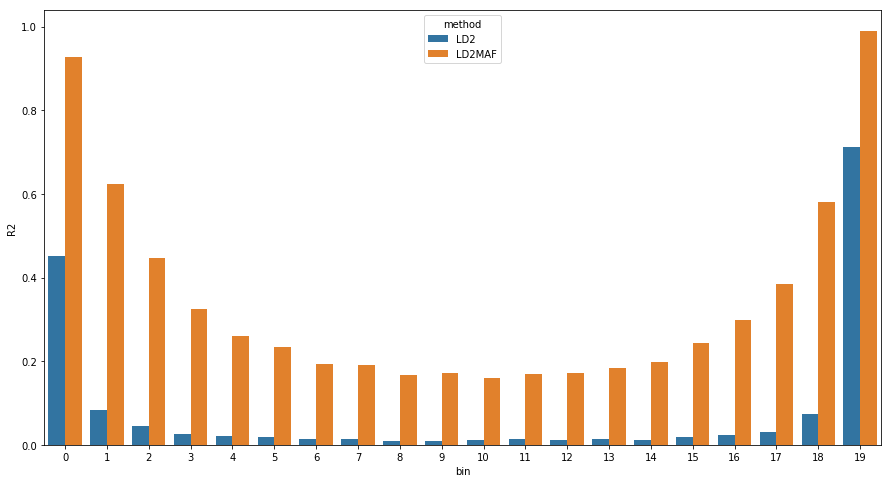

In [6]:
import seaborn as sns
from scipy import stats

def plot_binned_comparison(df, base_lds, other_lds, nbins=100, plot_range=None):
    
    
    # labels=np.quantile(df[base_lds], np.linspace(0.0, 1., nbins))
    df['bin' + base_lds] = pd.qcut(df[base_lds], nbins, labels=range(1, nbins + 1)).cat.codes
    
    r2_df = []
    
    for cc in df['bin' + base_lds].unique():
        regdf = df.loc[df['bin' + base_lds] == cc]
        for sc in other_lds:
            if sc == base_lds:
                continue
            slope, intercept, r_value, p_value, std_err = stats.linregress(regdf[base_lds],
                                                                           regdf[sc])
            #print(f"bin {cc}: {base_lds}-{sc}: R^2 = {r_value**2}")
            r2_df.append({'bin': cc, 'method': sc, 'R2': r_value**2})
            
    r2_df = pd.DataFrame(r2_df)
    
    if plot_range is not None:
        df = df.loc[(df['bin' + base_lds] >= plot_range[0]) & (df['bin' + base_lds] <= plot_range[1])]
    
    melt_df = pd.melt(df, 'bin' + base_lds, value_vars=other_lds)

    f, ax = plt.subplots(figsize=(15, 8))
    
    sns.boxplot(x='bin' + base_lds, y="value", hue="variable",
                data=melt_df)
    
    plt.show()
    
    f, ax = plt.subplots(figsize=(15, 8))
    
    sns.barplot(x='bin', y='R2', hue='method', data=r2_df)
    plt.show()
    

plot_binned_comparison(all_snps_ld_df, "L2", ["L2", "LD2", "LD2MAF"], nbins=20, plot_range=(15, 20))

In [ ]:
approx_gamma_loglik()

In [20]:
reg_res['LD2MAF']

{'method': 'LD2MAF',
 'N': array([457824]),
 'M': 5961159,
 'counts': array([[5961159.]]),
 'MC': 5961159.0,
 'hg2': 0.25055189973891917,
 'hg2_se': 0.007268915660941831,
 'Mean Chi2': 2.997108238881066,
 'Intercept': 1.1681385777018445,
 'Intercept_se': 0.01843558476198765,
 'Ratio': 0.08419101900858242,
 'Ratio_se': 0.009231139506146827,
 'Coefficients': [('baseLD2MAF', 4.203073592550026e-08)]}

In [9]:
reg_res['L2']['Coefficients'][0][1]

0.019129000875428348

In [26]:
read_pbz2("../results/analysis/ld_score_comparison/EUR/results.pbz2")

{'LD2 ~ L2': {'slope': 1.0230132830804963,
  'intercept': -1.7343240831951618,
  'R-squared': 0.9932968038347469,
  'p-value': 0.0},
 'LD2 - L2 ~ MAF': {'slope': 9.127729683224938,
  'intercept': 0.4219091507685482,
  'R-squared': 0.003984395830702202,
  'p-value': 0.0},
 'LD2MAF ~ L2MAF': {'slope': 1.0230745139664823,
  'intercept': -1.6836161907336873,
  'R-squared': 0.9929898450463078,
  'p-value': 0.0},
 'LD2MAF - L2MAF ~ MAF': {'slope': 8.050335117791724,
  'intercept': -0.731051580734448,
  'R-squared': 0.007757581994340139,
  'p-value': 0.0},
 'LD2 ~ LD2MAF': {'slope': 1.487867538653522,
  'intercept': 4.081605119356794,
  'R-squared': 0.8480229979282752,
  'p-value': 0.0},
 'LD2 - LD2MAF ~ MAF': {'slope': 384.40878510092887,
  'intercept': -25.971354371009042,
  'R-squared': 0.2094250128296121,
  'p-value': 0.0}}

In [27]:
read_pbz2("../results/analysis/ld_score_comparison/EUR/EAS/results.pbz2")

{'LD2 ~ L2': {'slope': 1.0341337850899341,
  'intercept': -2.992920726057207,
  'R-squared': 0.9926740184678355,
  'p-value': 0.0},
 'LD2 - L2 ~ MAF': {'slope': 10.753251994826815,
  'intercept': 0.25397447724722655,
  'R-squared': 0.005384490146255244,
  'p-value': 0.0},
 'LD2MAF ~ L2MAF': {'slope': 1.0305973214320305,
  'intercept': -2.4054447764273448,
  'R-squared': 0.991352695988101,
  'p-value': 0.0},
 'LD2MAF - L2MAF ~ MAF': {'slope': 10.89600395560551,
  'intercept': -1.4482114513280688,
  'R-squared': 0.014126135599007264,
  'p-value': 0.0},
 'LD2 ~ LD2MAF': {'slope': 1.5945454211146557,
  'intercept': -14.251682590677234,
  'R-squared': 0.8786733455426373,
  'p-value': 0.0},
 'LD2 - LD2MAF ~ MAF': {'slope': 378.9222770788163,
  'intercept': -34.956037343111454,
  'R-squared': 0.23086497938192113,
  'p-value': 0.0}}

In [28]:
read_pbz2("../results/analysis/ld_score_comparison/EUR/EAS/AFR/results.pbz2")

{'LD2 ~ L2': {'slope': 1.0111053527022609,
  'intercept': 0.5345769130854023,
  'R-squared': 0.9921067819332793,
  'p-value': 0.0},
 'LD2 - L2 ~ MAF': {'slope': 6.228021303332655,
  'intercept': 0.740596372484738,
  'R-squared': 0.002589846362089519,
  'p-value': 0.0},
 'LD2MAF ~ L2MAF': {'slope': 1.0080545053105254,
  'intercept': 0.2954257095683914,
  'R-squared': 0.9920751069041466,
  'p-value': 0.0},
 'LD2MAF - L2MAF ~ MAF': {'slope': 5.143213347292892,
  'intercept': -0.20544305637893578,
  'R-squared': 0.00685375774425047,
  'p-value': 0.0},
 'LD2 ~ LD2MAF': {'slope': 1.870898405063897,
  'intercept': -14.422433160380649,
  'R-squared': 0.9048024540091724,
  'p-value': 0.0},
 'LD2 - LD2MAF ~ MAF': {'slope': 261.0015209282478,
  'intercept': 1.9690066635708732,
  'R-squared': 0.12513329969908618,
  'p-value': 0.0}}

In [30]:
res = read_pbz2("../data/annotations/annotation_data/EUR/M_5_50.pbz2")
res

{'Covariance': array([[5.961159e+06, 8.500100e+04, 2.942600e+05, ..., 3.951240e+05,
         1.488300e+04, 3.440000e+03],
        [8.500100e+04, 8.500100e+04, 0.000000e+00, ..., 8.895000e+03,
         1.175000e+03, 6.200000e+01],
        [2.942600e+05, 0.000000e+00, 2.942600e+05, ..., 3.003100e+04,
         4.488000e+03, 3.080000e+02],
        ...,
        [3.951240e+05, 8.895000e+03, 3.003100e+04, ..., 1.954408e+06,
         7.200000e+01, 2.760000e+02],
        [1.488300e+04, 1.175000e+03, 4.488000e+03, ..., 7.200000e+01,
         1.488300e+04, 0.000000e+00],
        [3.440000e+03, 6.200000e+01, 3.080000e+02, ..., 2.760000e+02,
         0.000000e+00, 3.440000e+03]]),
 'M': 5961159,
 'Names': array(['base', 'Coding_UCSC', 'Coding_UCSC.flanking.500',
        'Conserved_LindbladToh', 'Conserved_LindbladToh.flanking.500',
        'CTCF_Hoffman', 'CTCF_Hoffman.flanking.500', 'DGF_ENCODE',
        'DGF_ENCODE.flanking.500', 'DHS_peaks_Trynka', 'DHS_Trynka',
        'DHS_Trynka.flanking.500'

In [31]:
res['MAF Normalized sum'] / res['M']

array([3.24182112e-01, 4.52602001e-03, 1.58920035e-02, 7.81745224e-03,
       9.88026546e-02, 7.74547800e-03, 1.52597693e-02, 4.37421896e-02,
       1.30643877e-01, 3.55863991e-02, 5.36910138e-02, 1.07036536e-01,
       1.39088844e-03, 4.77010930e-03, 1.35335523e-02, 1.55184495e-02,
       2.70743505e-02, 6.47304989e-02, 1.25934164e-01, 1.01649409e-02,
       8.67995264e-02, 2.15796139e-02, 5.44670478e-02, 1.36844197e-01,
       5.91873886e-02, 1.32784338e-02, 4.28092411e-02, 3.95678336e-02,
       1.22847680e-02, 4.04255248e-02, 3.38101487e-02, 1.25237455e-01,
       2.96278144e-03, 2.66025230e-03, 8.04400791e-03, 1.49017527e-02,
       3.40667125e-03, 1.49635224e-01, 8.38038056e-02, 5.40582386e-02,
       1.02526513e-03, 4.23685943e-02, 6.81556174e-02, 1.11407107e-01,
       1.35408044e-01, 5.71517087e-03, 5.33430847e-03, 3.57107995e-03,
       4.90078725e-03, 1.74117228e-03, 6.86818204e-03, 6.77806957e-03,
       2.20445932e-02, 5.64706279e-01, 2.57491485e-03, 1.15027073e-02,
      

In [ ]:
metric_df = metric_df.loc[metric_df['Metric'] == metric]
    
mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                             values='Score')
se_pivot = metric_df.pivot(index='Trait', columns='Method',
                           values='Score SE')

In [4]:
metric_df = pd.read_csv("../tables/regression_tables/UKBB_data/M_5_50_chi2filt/global_metrics.csv")
metric_df

Trait Metric    Method         Score  Score SE
0                Waist-hip Ratio    hg2     L2MAF      0.144193  0.008758
1                Waist-hip Ratio    hg2   S-L2MAF      0.173261  0.007777
2                Waist-hip Ratio    hg2    LD2MAF      0.145655  0.008635
3                Waist-hip Ratio    hg2  S-LD2MAF      0.171439  0.007573
4                Waist-hip Ratio    hg2       LD2      0.162816  0.008211
..                           ...    ...       ...           ...       ...
955  Forced Vital Capacity (FVC)    LRT  S-LD2MAF   6468.593375  0.000000
956  Forced Vital Capacity (FVC)    LRT       LD2  23089.690630  0.000000
957  Forced Vital Capacity (FVC)    LRT     S-LD2  20334.341875  0.000000
958  Forced Vital Capacity (FVC)    LRT        L2  22502.028029  0.000000
959  Forced Vital Capacity (FVC)    LRT      S-L2  19438.872766  0.000000

[960 rows x 5 columns]

In [12]:
method_names = {
        'LDSC': '$r^2 (\\alpha=1, \\theta=0)$',
        'S-LDSC': '$r^2 (\\alpha=1, \\theta=1)$',
        'L2': '$r^2 (\\alpha=0, \\theta=0)$',
        'S-L2': '$r^2 (\\alpha=0, \\theta=1)$',
        'L2MAF': '$r^2 (\\alpha=1, \\theta=0)$',
        'S-L2MAF': '$r^2 (\\alpha=1, \\theta=1)$',
        'LD2': '$D^2 (\\alpha=0, \\theta=0)$',
        'S-LD2': '$D^2 (\\alpha=0, \\theta=1)$',
        'LD2MAF': '$D^2 (\\alpha=1, \\theta=0)$',
        'S-LD2MAF': '$D^2 (\\alpha=1, \\theta=1)$'
    }

metric = 'hg2'

metric_df = metric_df.loc[metric_df['Metric'] == metric]
    
mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                             values='Score')
se_pivot = metric_df.pivot(index='Trait', columns='Method',
                           values='Score SE')

final_df = mean_pivot.round(3).astype('str') + ' (' + se_pivot.round(3).astype('str') + ')'
final_df.columns = [method_names[c] for c in final_df.columns]


In [ ]:
final_df.to_excel()

In [69]:
metric_df = pd.read_csv("../tables/regression_tables/EUR/M_5_50_chi2filt/annotation_metrics.csv")
metric_df['Metric'].unique()

array(['tau', 'tau_star', 'tau_star_m1', 'enrichment', 'tau_pvalue'],
      dtype=object)

In [6]:
metric_df.loc[metric_df['Metric'] == 'tau_star_m1']

Trait       Metric   Method  \
776    Respiratory and ENT Diseases  tau_star_m1  S-L2MAF   
777    Respiratory and ENT Diseases  tau_star_m1  S-L2MAF   
778    Respiratory and ENT Diseases  tau_star_m1  S-L2MAF   
779    Respiratory and ENT Diseases  tau_star_m1  S-L2MAF   
780    Respiratory and ENT Diseases  tau_star_m1  S-L2MAF   
...                             ...          ...      ...   
90399             College Education  tau_star_m1     S-L2   
90400             College Education  tau_star_m1     S-L2   
90401             College Education  tau_star_m1     S-L2   
90402             College Education  tau_star_m1     S-L2   
90403             College Education  tau_star_m1     S-L2   

                                             Annotation     Score  Score SE  
776                                                base -0.000000  0.000000  
777                                         Coding_UCSC  0.529633  0.478794  
778                            Coding_UCSC.flanking.500 -0.015972  0.202552  
779                               Conserved_LindbladToh -0.377166  0.614394  
780                  Conserved_LindbladToh.flanking.500 -0.011519  0.287956  
...                                                 ...       ...       ...  
90399               Ancient_Sequence_Age_Human_Enhancer  0.389111  0.211743  
90400  Ancient_Sequence_Age_Human_Enhancer.flanking.500 -0.320302  0.175193  
90401      Human_Enhancer_Villar_Species_Enhancer_Count  0.001628  0.074738  
90402                        Human_Promoter_Villar_ExAC  0.085958  0.184371  
90403           Human_Promoter_Villar_ExAC.flanking.500  0.625959  0.330388  

[18236 rows x 6 columns]

In [70]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro

r_meta = importr('rmeta')
metagen = importr('meta')

def meta_analyze_annot(annot_df, metric='tau_star', ma_type='random'):
    meta_results = []
    meta_results2 = []
    meta_results_se = []

    for method in annot_df['Method'].unique():

        m_annot_df = annot_df.loc[(annot_df['Method'] == method) &
                                  (annot_df['Metric'] == metric)]

        piv_annot = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score')
        piv_annot_se = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score SE')

        meta_res = {'Method': method}
        meta_res_se = {'Method': method}
        meta_res2 = {'Method': method}

        for annot in list(piv_annot.index):

            res = dict(metagen.metagen(ro.FloatVector(piv_annot.loc[annot].values),
                                      ro.FloatVector(piv_annot_se.loc[annot].values)).items())

            if ma_type == 'fixed':
                meta_res[annot] = list(res['TE.fixed'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.fixed'].items())[0][1]
            elif ma_type == 'random':
                meta_res[annot] = list(res['TE.random'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.random'].items())[0][1]
            
            meta_res2[annot] = list(list(r_meta.meta_summaries(ro.FloatVector(piv_annot.loc[annot].values),
                                 ro.FloatVector(piv_annot_se.loc[annot].values), method=ma_type).items())[2][1].items())[0][1]

        meta_results.append(meta_res)
        meta_results2.append(meta_res2)
        meta_results_se.append(meta_res_se)

    print(pd.DataFrame(meta_results2).set_index('Method').T)
    return (pd.DataFrame(meta_results).set_index('Method').T,
            pd.DataFrame(meta_results_se).set_index('Method').T)


mean_piv, se_piv = meta_analyze_annot(metric_df, metric='tau_star_m1')
mean_piv

Method                                             S-L2MAF  S-LD2MAF  \
Ancient_Sequence_Age_Human_Enhancer               0.244509  0.254194   
Ancient_Sequence_Age_Human_Enhancer.flanking.500 -0.045039 -0.042352   
Ancient_Sequence_Age_Human_Promoter               0.449041  0.435323   
Ancient_Sequence_Age_Human_Promoter.flanking.500  0.169402  0.175207   
BLUEPRINT_DNA_methylation_MaxCPP                  0.104130  0.098495   
...                                                    ...       ...   
WeakEnhancer_Hoffman                              0.017604  0.029232   
WeakEnhancer_Hoffman.flanking.500                -0.098454 -0.105220   
base                                                   NaN       NaN   
non_synonymous                                    0.048721  0.023069   
synonymous                                       -0.382137 -0.395815   

Method                                               S-LD2      S-L2  
Ancient_Sequence_Age_Human_Enhancer               0.350555  0.34

Method                                                 S-L2MAF      S-LD2MAF  \
Ancient_Sequence_Age_Human_Enhancer               2.445086e-01  2.541937e-01   
Ancient_Sequence_Age_Human_Enhancer.flanking.500 -4.503855e-02 -4.235186e-02   
Ancient_Sequence_Age_Human_Promoter               4.490415e-01  4.353231e-01   
Ancient_Sequence_Age_Human_Promoter.flanking.500  1.694016e-01  1.752072e-01   
BLUEPRINT_DNA_methylation_MaxCPP                  1.041299e-01  9.849476e-02   
...                                                        ...           ...   
WeakEnhancer_Hoffman                              1.760429e-02  2.923247e-02   
WeakEnhancer_Hoffman.flanking.500                -9.845416e-02 -1.052203e-01   
base                                             -2.147484e+09 -2.147484e+09   
non_synonymous                                    4.872095e-02  2.306930e-02   
synonymous                                       -3.821374e-01 -3.958154e-01   

Method                                               S-LD2      S-L2  
Ancient_Sequence_Age_Human_Enhancer               0.350555  0.347456  
Ancient_Sequence_Age_Human_Enhancer.flanking.500 -0.104235 -0.100689  
Ancient_Sequence_Age_Human_Promoter               0.622107  0.641384  
Ancient_Sequence_Age_Human_Promoter.flanking.500  0.195874  0.192692  
BLUEPRINT_DNA_methylation_MaxCPP                 -0.018529 -0.010889  
...                                                    ...       ...  
WeakEnhancer_Hoffman                              0.015724  0.002769  
WeakEnhancer_Hoffman.flanking.500                -0.102309 -0.105012  
base                                             -0.162914 -0.148678  
non_synonymous                                    0.039392  0.048744  
synonymous                                       -0.503786 -0.514267  

[97 rows x 4 columns]

In [76]:
pval = 2.*stats.norm.sf(abs(mean_piv / se_piv))
pval[pval == 0.] = np.nan
pd.DataFrame(-np.log10(pval), columns=mean_piv.columns, index=mean_piv.index)

Method                                              S-L2MAF   S-LD2MAF  \
Ancient_Sequence_Age_Human_Enhancer                6.751722   6.705753   
Ancient_Sequence_Age_Human_Enhancer.flanking.500   0.614156   0.585297   
Ancient_Sequence_Age_Human_Promoter               13.429730  12.674337   
Ancient_Sequence_Age_Human_Promoter.flanking.500   3.602551   3.708105   
BLUEPRINT_DNA_methylation_MaxCPP                   3.667555   3.229605   
...                                                     ...        ...   
WeakEnhancer_Hoffman                               0.170397   0.300903   
WeakEnhancer_Hoffman.flanking.500                  1.593860   1.733968   
base                                               0.498516   0.498516   
non_synonymous                                     0.585799   0.236095   
synonymous                                        10.350124  11.865583   

Method                                                S-LD2       S-L2  
Ancient_Sequence_Age_Human_Enhancer                7.983483   7.864854  
Ancient_Sequence_Age_Human_Enhancer.flanking.500   1.531883   1.548875  
Ancient_Sequence_Age_Human_Promoter               13.285666  14.050835  
Ancient_Sequence_Age_Human_Promoter.flanking.500   2.421392   2.431281  
BLUEPRINT_DNA_methylation_MaxCPP                   0.232103   0.126495  
...                                                     ...        ...  
WeakEnhancer_Hoffman                               0.100533   0.016393  
WeakEnhancer_Hoffman.flanking.500                  1.076092   1.126746  
base                                               2.508177   2.281933  
non_synonymous                                     0.264365   0.343476  
synonymous                                        11.026010  11.827162  

[97 rows x 4 columns]

In [72]:
mean_piv

Method                                                 S-L2MAF      S-LD2MAF  \
Ancient_Sequence_Age_Human_Enhancer               2.445086e-01  2.541937e-01   
Ancient_Sequence_Age_Human_Enhancer.flanking.500 -4.503855e-02 -4.235186e-02   
Ancient_Sequence_Age_Human_Promoter               4.490415e-01  4.353231e-01   
Ancient_Sequence_Age_Human_Promoter.flanking.500  1.694016e-01  1.752072e-01   
BLUEPRINT_DNA_methylation_MaxCPP                  1.041299e-01  9.849476e-02   
...                                                        ...           ...   
WeakEnhancer_Hoffman                              1.760429e-02  2.923247e-02   
WeakEnhancer_Hoffman.flanking.500                -9.845416e-02 -1.052203e-01   
base                                             -2.147484e+09 -2.147484e+09   
non_synonymous                                    4.872095e-02  2.306930e-02   
synonymous                                       -3.821374e-01 -3.958154e-01   

Method                                               S-LD2      S-L2  
Ancient_Sequence_Age_Human_Enhancer               0.350555  0.347456  
Ancient_Sequence_Age_Human_Enhancer.flanking.500 -0.104235 -0.100689  
Ancient_Sequence_Age_Human_Promoter               0.622107  0.641384  
Ancient_Sequence_Age_Human_Promoter.flanking.500  0.195874  0.192692  
BLUEPRINT_DNA_methylation_MaxCPP                 -0.018529 -0.010889  
...                                                    ...       ...  
WeakEnhancer_Hoffman                              0.015724  0.002769  
WeakEnhancer_Hoffman.flanking.500                -0.102309 -0.105012  
base                                             -0.162914 -0.148678  
non_synonymous                                    0.039392  0.048744  
synonymous                                       -0.503786 -0.514267  

[97 rows x 4 columns]

In [28]:
list(res.items())[0][1]

2.0010019234345013

Text(0, 0.5, 'S-LD2')

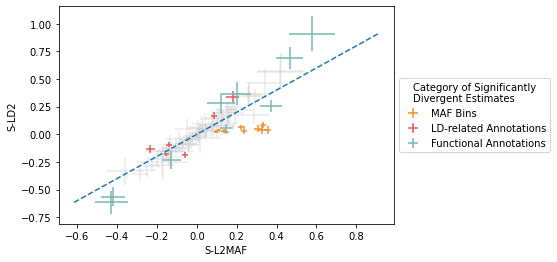

In [278]:
x, y = 'S-L2MAF', 'S-LD2'

try:
    se_piv = se_piv.drop('base')
    mean_piv = mean_piv.drop('base')
except Exception as ex:
    pass 

sig = ((np.sign(mean_piv[y] + 1.96*se_piv[y] - mean_piv[x])*np.sign(mean_piv[y] - 1.96*se_piv[y] - mean_piv[x]) > 0) | 
       (np.sign(mean_piv[x] + 1.96*se_piv[x] - mean_piv[y])*np.sign(mean_piv[x] - 1.96*se_piv[x] - mean_piv[y]) > 0))

sig_annots = set(sig[sig].index)
non_sig_annots = set(sig[~sig].index)

mafbin_annots = [f'MAFbin{i}' for i in range(1, 11)]
ld_annots = ['Backgrd_Selection_Stat', 'CpG_Content_50kb', 'MAF_Adj_ASMC',
             'MAF_Adj_LLD_AFR', 'Nucleotide_Diversity_10kb', 'Recomb_Rate_10kb']
func_annots = list(set(sig.index) - set(mafbin_annots).union(set(ld_annots)))

sig_mafbins = list(set(mafbin_annots).intersection(sig_annots))
sig_ld_annots = list(set(ld_annots).intersection(sig_annots))
sig_func_annots = list(set(func_annots).intersection(sig_annots))

color = sig.apply(lambda x: ['#CFCFCF70', 'red'][x])
color[sig_mafbins] = '#F28E2B'
color[sig_ld_annots] = '#E15759'
color[sig_func_annots] = '#76B7B2'

plot_cats = {
    'Non-significant Annotations': non_sig_annots,
    'MAF Bins': sig_mafbins,
    'LD-related Annotations': sig_ld_annots,
    'Functional Annotations': sig_func_annots
}

for label, annots in plot_cats.items():
    if len(annots) < 1:
        continue
    if label == 'Non-significant Annotations':
        label = None
        zorder = 1
    else:
        zorder = 3
    
    plt.errorbar(x=mean_piv.loc[annots, x], y=mean_piv.loc[annots, y],
                 xerr=se_piv.loc[annots, x], yerr=se_piv.loc[annots, y],
                 ecolor=color[annots], ls='none', label=label, zorder=zorder)

li = np.linspace(mean_piv[[x, y]].values.min(), mean_piv[[x, y]].values.max(), 1000)
plt.plot(li, li, ls='--', zorder=2)
plt.legend(title="Category of Significantly\nDivergent Estimates",
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(x)
plt.ylabel(y)

In [279]:
metric_df

Trait       Metric   Method  \
0                  Waist-hip Ratio          tau  S-L2MAF   
1                  Waist-hip Ratio          tau  S-L2MAF   
2                  Waist-hip Ratio          tau  S-L2MAF   
3                  Waist-hip Ratio          tau  S-L2MAF   
4                  Waist-hip Ratio          tau  S-L2MAF   
...                            ...          ...      ...   
34915  Forced Vital Capacity (FVC)  tau_star_m1     S-L2   
34916  Forced Vital Capacity (FVC)  tau_star_m1     S-L2   
34917  Forced Vital Capacity (FVC)  tau_star_m1     S-L2   
34918  Forced Vital Capacity (FVC)  tau_star_m1     S-L2   
34919  Forced Vital Capacity (FVC)  tau_star_m1     S-L2   

                                             Annotation         Score  \
0                                                  base -1.478317e-08   
1                                           Coding_UCSC -9.188663e-08   
2                              Coding_UCSC.flanking.500 -4.662421e-08   
3                                 Conserved_LindbladToh  1.924905e-07   
4                    Conserved_LindbladToh.flanking.500 -6.944959e-09   
...                                                 ...           ...   
34915               Ancient_Sequence_Age_Human_Enhancer  3.748618e-01   
34916  Ancient_Sequence_Age_Human_Enhancer.flanking.500 -6.172175e-02   
34917      Human_Enhancer_Villar_Species_Enhancer_Count  1.909077e-01   
34918                        Human_Promoter_Villar_ExAC  3.206464e-02   
34919           Human_Promoter_Villar_ExAC.flanking.500  8.436080e-03   

           Score SE  
0      1.245917e-08  
1      7.502409e-08  
2      2.124067e-08  
3      1.018086e-07  
4      1.203315e-08  
...             ...  
34915  1.878351e-01  
34916  1.772666e-01  
34917  1.330672e-01  
34918  1.507380e-01  
34919  2.131003e-01  

[34920 rows x 6 columns]

In [283]:
res = read_pbz2("../results/regression/UKBB_data/M_5_50_chi2filt/BMI/regression_res.pbz2")
res.keys()

dict_keys(['S-LDSC', 'LDSC', 'S-LD2', 'LD2', 'S-LD2MAF', 'LD2MAF', 'S-L2', 'L2', 'S-L2MAF', 'L2MAF'])

In [426]:
import glob
import os

x, y = 'S-L2MAF', 'S-LD2'

dfs = []

for f in glob.glob("../results/regression/UKBB_data/EUR/M_5_50_chi2filt/*/regression_res.pbz2"):
    res = read_pbz2(f)
    
    df = pd.DataFrame({'x': res[x]['Annotations']['tau_pvalue'],
                       'y': res[y]['Annotations']['tau_pvalue'],
                       'Annotation': res[y]['Annotations']['Names']})
    
    df = df.loc[df['Annotation'].apply(lambda x: not (x == 'base' or 'MAFbin' in x or 'flanking.500' in x))]
    
    df['Trait'] = os.path.basename(os.path.dirname(f))
    
    dfs.append(df)

fdf = pd.concat(dfs)
fdf

x         y                                    Annotation  \
1   0.656267  0.670181                                   Coding_UCSC   
3   1.231635  0.872865                         Conserved_LindbladToh   
5   0.309954  0.031190                                  CTCF_Hoffman   
7   1.208683  1.605459                                    DGF_ENCODE   
9   1.209639  0.790794                              DHS_peaks_Trynka   
..       ...       ...                                           ...   
88  3.029453  1.675004                         Human_Enhancer_Villar   
90  2.155835  1.896368           Ancient_Sequence_Age_Human_Promoter   
92  0.981237  1.142836           Ancient_Sequence_Age_Human_Enhancer   
94  1.129070  0.726693  Human_Enhancer_Villar_Species_Enhancer_Count   
95  0.133708  0.128158                    Human_Promoter_Villar_ExAC   

                          Trait  
1               Waist-hip Ratio  
3               Waist-hip Ratio  
5               Waist-hip Ratio  
7               Waist-hip Ratio  
9               Waist-hip Ratio  
..                          ...  
88  Forced Vital Capacity (FVC)  
90  Forced Vital Capacity (FVC)  
92  Forced Vital Capacity (FVC)  
94  Forced Vital Capacity (FVC)  
95  Forced Vital Capacity (FVC)  

[1590 rows x 4 columns]

In [383]:
fdf['x'] = (fdf['x'] > bonf_pval).astype(int)
fdf['y'] = (fdf['y'] > bonf_pval).astype(int)

x_mat = fdf.pivot(index='Annotation', columns='Trait',
                  values='x')
y_mat = fdf.pivot(index='Annotation', columns='Trait',
                  values='y')

Text(0, 0.5, 'S-LD2MAF')

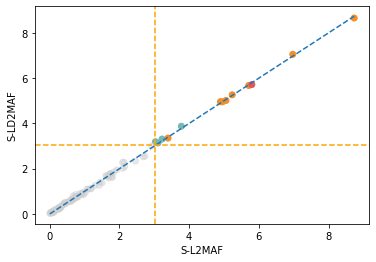

In [379]:

x, y = 'S-L2MAF', 'S-LD2MAF'
metric = 'tau_pvalue'

res = read_pbz2("../results/regression/UKBB_data/EUR/M_5_50_chi2filt/Height/regression_res.pbz2")

bonf_pval = -np.log10(0.05/53)

df = pd.DataFrame({'x': res[x]['Annotations'][metric],
                   'y': res[y]['Annotations'][metric],
                   'Annotation': res[x]['Annotations']['Names']})

sig_annots = df.apply(lambda x: x['x'] > bonf_pval or x['y'] > bonf_pval, axis=1)

df['color'] = '#CFCFCF70'
df.loc[sig_annots & df['Annotation'].isin(mafbin_annots), 'color'] = '#F28E2B'
df.loc[sig_annots & df['Annotation'].isin(ld_annots), 'color'] = '#E15759'
df.loc[sig_annots & df['Annotation'].isin(func_annots), 'color'] = '#76B7B2'

c = df['Annotation'].apply(lambda x: ['#CFCFCF70', 'red'][x in mafbin_annots])
plt.scatter(df['x'], df['y'], c=df['color'])
li = np.linspace(0.0, df[['x', 'y']].values.max(), 1000)
plt.plot(li, li, ls='--', zorder=2)

plt.axhline(bonf_pval, color='orange', ls='--')
plt.axvline(bonf_pval, color='orange', ls='--')

plt.xlabel(x)
plt.ylabel(y)


In [372]:
fdf['x'] = ((fdf['x'] > bonf_pval) & (fdf['y'] <= bonf_pval)).astype(float)
fdf['y'] = ((fdf['y'] > bonf_pval) & (fdf['x'] <= bonf_pval)).astype(float)
fdf.to_csv("~/annot_sig_data.csv")

In [342]:
fdf.groupby('Annotation')['x_pos', 'y_pos'].sum()

/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


x_pos  y_pos
Annotation                                                
Ancient_Sequence_Age_Human_Enhancer             0.0    0.0
Ancient_Sequence_Age_Human_Promoter             0.0    1.0
BLUEPRINT_DNA_methylation_MaxCPP                1.0    0.0
BLUEPRINT_H3K27acQTL_MaxCPP                     1.0    0.0
BLUEPRINT_H3K4me1QTL_MaxCPP                     0.0    0.0
Backgrd_Selection_Stat                          0.0    1.0
BivFlnk                                         1.0    0.0
CTCF_Hoffman                                    0.0    0.0
Coding_UCSC                                     0.0    0.0
Conserved_LindbladToh                           0.0    0.0
Conserved_Mammal_phastCons46way                 0.0    0.0
Conserved_Primate_phastCons46way                0.0    0.0
Conserved_Vertebrate_phastCons46way             0.0    0.0
CpG_Content_50kb                                0.0    2.0
DGF_ENCODE                                      1.0    0.0
DHS_Trynka                                      1.0    0.0
DHS_peaks_Trynka                                0.0    0.0
Enhancer_Andersson                              1.0    0.0
Enhancer_Hoffman                                0.0    0.0
FetalDHS_Trynka                                 0.0    0.0
GERP.NS                                         0.0    0.0
GERP.RSsup4                                     1.0    0.0
GTEx_eQTL_MaxCPP                                4.0    0.0
H3K27ac_Hnisz                                   0.0    0.0
H3K27ac_PGC2                                    0.0    0.0
H3K4me1_Trynka                                  0.0    0.0
H3K4me1_peaks_Trynka                            0.0    1.0
H3K4me3_Trynka                                  0.0    0.0
H3K4me3_peaks_Trynka                            0.0    0.0
H3K9ac_Trynka                                   1.0    0.0
H3K9ac_peaks_Trynka                             1.0    0.0
Human_Enhancer_Villar                           1.0    0.0
Human_Enhancer_Villar_Species_Enhancer_Count    0.0    0.0
Human_Promoter_Villar                           1.0    0.0
Human_Promoter_Villar_ExAC                      0.0    0.0
Intron_UCSC                                     0.0    3.0
MAF_Adj_ASMC                                    8.0    0.0
MAF_Adj_LLD_AFR                                 0.0    0.0
MAF_Adj_Predicted_Allele_Age                    2.0    0.0
Nucleotide_Diversity_10kb                       0.0    0.0
PromoterFlanking_Hoffman                        0.0    1.0
Promoter_UCSC                                   0.0    0.0
Recomb_Rate_10kb                                1.0    0.0
Repressed_Hoffman                               0.0    0.0
SuperEnhancer_Hnisz                             0.0    0.0
TFBS_ENCODE                                     0.0    0.0
TSS_Hoffman                                     0.0    0.0
Transcr_Hoffman                                 0.0    0.0
UTR_3_UCSC                                      0.0    0.0
UTR_5_UCSC                                      0.0    0.0
WeakEnhancer_Hoffman                            0.0    0.0
non_synonymous                                  0.0    0.0
synonymous                                      1.0    0.0

In [293]:
res['S-LD2']['Annotations'].keys()

dict_keys(['Names', 'hg2', 'hg2_se', 'enrichment', 'enrichment_se', 'enrichment_pvalue', 'tau', 'tau_se', 'tau_pvalue', 'tau_zscore', 'tau_star', 'tau_star_se', 'tau_star_m1', 'tau_star_m1_se'])

In [294]:
res['S-L2MAF']['Annotations'].keys()

dict_keys(['Names', 'hg2', 'hg2_se', 'enrichment', 'enrichment_se', 'enrichment_pvalue', 'tau', 'tau_se', 'tau_pvalue', 'tau_zscore', 'tau_star', 'tau_star_se', 'tau_star_m1', 'tau_star_m1_se'])

In [303]:
len([x for x in res['S-L2MAF']['Annotations']['Names'] if x == 'base' or 'MAFbin' in x or 'flanking.500' in x])

44

In [304]:
len(res['S-L2MAF']['Annotations']['Names'])

97

In [326]:
df.apply(lambda x: x['x'] > bonf_pval or x['y'] > bonf_pval, axis=1)

0     False
1      True
2     False
3      True
4      True
      ...  
92     True
93     True
94     True
95     True
96     True
Length: 97, dtype: bool

In [329]:
df['Annotation'].isin(mafbin_annots)

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Name: Annotation, Length: 97, dtype: bool

In [359]:
from scipy import stats

methods = ['L2MAF', 'LD2MAF', 'LD2', 'S-L2MAF', 'S-LD2MAF', 'S-LD2']

ref_pop = 'EUR'
sample_pops = ['EUR20', 'EUR50', 'EUR100', 'EUR200']
metric = 'hg2'

ref_df = pd.read_csv(f"../tables/regression_tables/UKBB_data/{ref_pop}/M_5_50_chi2filt/global_metrics.csv")
ref_df = ref_df.loc[ref_df['Metric'] == metric]

results = []

for p in sample_pops:
    
    df = pd.read_csv(f"../tables/regression_tables/UKBB_data/{p}/M_5_50_chi2filt/global_metrics.csv")
    df = df.loc[df['Metric'] == metric]
    
    for m in methods:
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            ref_df.loc[ref_df['Method'] == m, 'Score'],
            df.loc[df['Method'] == m, 'Score']
        )
        
        results.append({
            'Method': m,
            'Sample Size': int(p.replace(ref_pop, "")),
            'R^2': r_value**2,
            'Prop Mean Difference': np.mean((df.loc[df['Method'] == m, 'Score'] - ref_df.loc[ref_df['Method'] == m, 'Score']) / ref_df.loc[ref_df['Method'] == m, 'Score'])
        })

fdf = pd.DataFrame(results)
fdf

Method  Sample Size       R^2  Prop Mean Difference
0      L2MAF           20  1.000000              0.000000
1     LD2MAF           20  1.000000              0.000000
2        LD2           20  1.000000             -0.030532
3    S-L2MAF           20  1.000000              0.000000
4   S-LD2MAF           20  1.000000              0.000000
5      S-LD2           20  0.999786             -0.030837
6      L2MAF           50  1.000000              0.000000
7     LD2MAF           50  1.000000              0.000000
8        LD2           50  1.000000             -0.012598
9    S-L2MAF           50  1.000000              0.000000
10  S-LD2MAF           50  1.000000              0.000000
11     S-LD2           50  0.999905             -0.013248
12     L2MAF          100  1.000000              0.000000
13    LD2MAF          100  1.000000              0.000000
14       LD2          100  1.000000             -0.006797
15   S-L2MAF          100  1.000000              0.000000
16  S-LD2MAF          100  1.000000              0.000000
17     S-LD2          100  0.999949             -0.006814
18     L2MAF          200  1.000000              0.000000
19    LD2MAF          200  1.000000              0.000000
20       LD2          200  1.000000             -0.004578
21   S-L2MAF          200  1.000000              0.000000
22  S-LD2MAF          200  1.000000              0.000000
23     S-LD2          200  0.999977             -0.004056

In [67]:
x, y = 'S-L2MAF', 'S-LD2MAF'
metric = 'enrichment'

res = read_pbz2("../results/regression/EUR/M_5_50_chi2filt/Height/regression_res.pbz2")

df = pd.DataFrame({'x': res[x]['Annotations'][metric],
                   'y': res[y]['Annotations'][metric],
                   'Annotation': res[x]['Annotations']['Names']})

plt.scatter(df['x'], df['y'])
li = np.linspace(0.0, df[['x', 'y']].values.max(), 1000)
plt.plot(li, li, ls='--', zorder=2)

plt.xlabel(x)
plt.ylabel(y)

FileNotFoundError: [Errno 2] No such file or directory: '../results/regression/EUR/M_5_50_chi2filt/Height/regression_res.pbz2'

In [8]:
import glob
import os

x, y = 'S-L2MAF', 'S-LD2'
bonf_pval = -np.log10(0.05/53)
metric = 'tau_pvalue'

dfs = []

for f in glob.glob("../results/regression/EUR/M_5_50_chi2filt/*/regression_res.pbz2"):
    res = read_pbz2(f)
    
    df = pd.DataFrame({'x': res[x]['Annotations'][metric],
                       'y': res[y]['Annotations'][metric],
                       'Annotation': res[y]['Annotations']['Names']})
    
    df = df.loc[df['Annotation'].apply(lambda x: not (x == 'base' or 'MAFbin' in x or 'flanking.500' in x))]
    
    df['Trait'] = os.path.basename(os.path.dirname(f))
    
    dfs.append(df)

fdf = pd.concat(dfs)
#fdf['x'] = (fdf['x'] > bonf_pval).astype(int)
#fdf['y'] = (fdf['y'] > bonf_pval).astype(int)

#nsig_by_annot = fdf.groupby('Annotation').sum().sum(axis=1)
#include_annot = list(nsig_by_annot[nsig_by_annot > 0].index)
#nsig_by_trait = fdf.groupby('Trait').sum().sum(axis=1)
#include_trait = list(nsig_by_trait[nsig_by_trait > 0].index)

#fdf = fdf.loc[fdf['Trait'].isin(include_trait) & fdf['Annotation'].isin(include_annot)]

#fdf = fdf.loc[~fdf['Annotation'].isin(enrichment_exclude)]
fdf

x         y                                    Annotation  \
1   0.570817  0.346481                                   Coding_UCSC   
3   0.268175  0.329205                         Conserved_LindbladToh   
5   0.053215  0.033084                                  CTCF_Hoffman   
7   3.045209  3.538404                                    DGF_ENCODE   
9   0.707356  1.041295                              DHS_peaks_Trynka   
..       ...       ...                                           ...   
88  0.364814  0.392617                         Human_Enhancer_Villar   
90  2.284676  2.216729           Ancient_Sequence_Age_Human_Promoter   
92  0.799361  1.136913           Ancient_Sequence_Age_Human_Enhancer   
94  0.303873  0.010916  Human_Enhancer_Villar_Species_Enhancer_Count   
95  0.168690  0.191941                    Human_Promoter_Villar_ExAC   

                               Trait  
1   UKB_460K.disease_RESPIRATORY_ENT  
3   UKB_460K.disease_RESPIRATORY_ENT  
5   UKB_460K.disease_RESPIRATORY_ENT  
7   UKB_460K.disease_RESPIRATORY_ENT  
9   UKB_460K.disease_RESPIRATORY_ENT  
..                               ...  
88            UKB_460K.cov_EDU_YEARS  
90            UKB_460K.cov_EDU_YEARS  
92            UKB_460K.cov_EDU_YEARS  
94            UKB_460K.cov_EDU_YEARS  
95            UKB_460K.cov_EDU_YEARS  

[2491 rows x 4 columns]

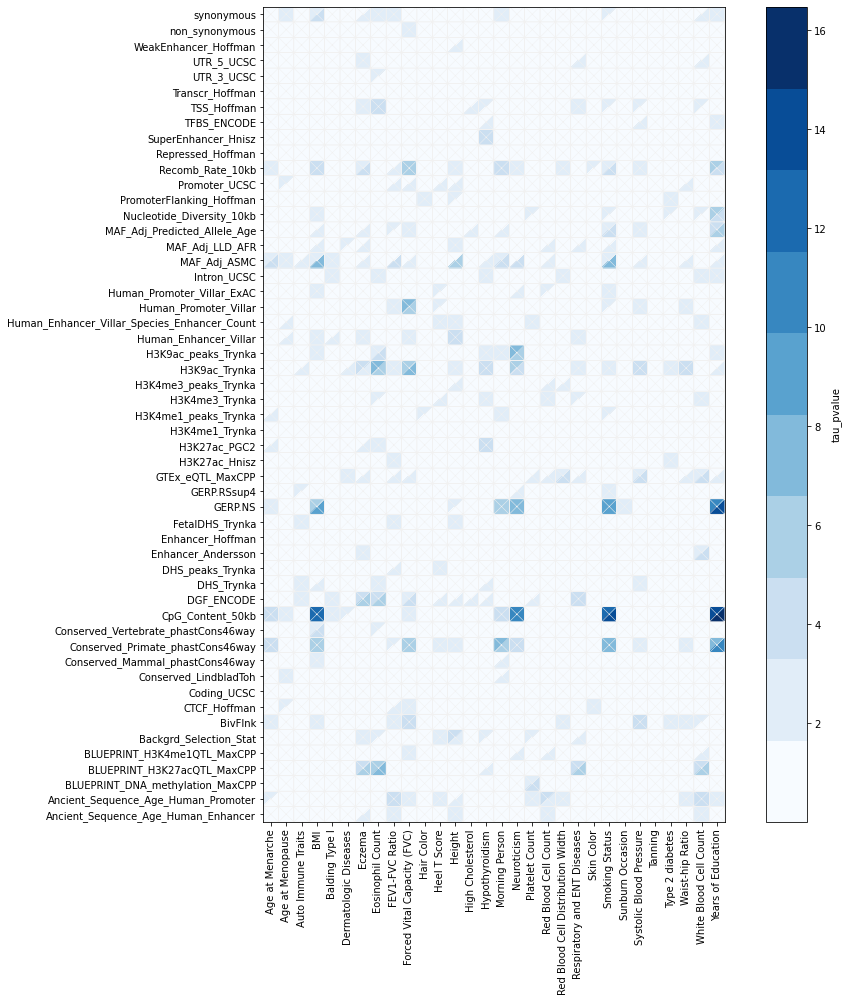

In [503]:
def quatromatrix(left, bottom, right, top, ax=None, triplotkw={},tripcolorkw={}):
    if not ax: ax=plt.gca()
    n = left.shape[0]; m=left.shape[1]

    a = np.array([[0,0],[0,1],[.5,.5],[1,0],[1,1]])
    tr = np.array([[0,1,2], [0,2,3],[2,3,4],[1,2,4]])

    A = np.zeros((n*m*5,2))
    Tr = np.zeros((n*m*4,3))

    for i in range(n):
        for j in range(m):
            k = i*m+j
            A[k*5:(k+1)*5,:] = np.c_[a[:,0]+j, a[:,1]+i]
            Tr[k*4:(k+1)*4,:] = tr + k*5

    C = np.c_[ left.flatten(), bottom.flatten(), 
              right.flatten(), top.flatten()   ].flatten()

    triplot = ax.triplot(A[:,0], A[:,1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:,0], A[:,1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor



cmap = plt.cm.get_cmap('Blues', 10)

x_mat = fdf.pivot(index='Annotation', columns='Trait',
                  values='x')
y_mat = fdf.pivot(index='Annotation', columns='Trait',
                  values='y')

right=x_mat.values
bottom=x_mat.values

left=y_mat.values
top=y_mat.values

fig, ax=plt.subplots(figsize=(15, 15))

r = quatromatrix(left, bottom, right, top, ax=ax,
             triplotkw={"color":"#F1F1F1", "lw":0.5},
             tripcolorkw={"cmap": cmap}) 

ax.margins(0)
ax.set_aspect("equal")

plt.xticks(np.arange(x_mat.shape[1]) + .5, x_mat.columns, rotation=90)
plt.yticks(np.arange(x_mat.shape[0]) + .5, x_mat.index)

cbar = plt.colorbar(r)
cbar.ax.set_ylabel(metric)

plt.show()

In [471]:
enrichment_exclude = [
        'BLUEPRINT_DNA_methylation_MaxCPP',
        'BLUEPRINT_H3K27acQTL_MaxCPP',
        'BLUEPRINT_H3K4me1QTL_MaxCPP',
        'Backgrd_Selection_Stat',
        'CpG_Content_50kb',
        'GERP.NS',
        'GTEx_eQTL_MaxCPP',
        'Human_Enhancer_Villar_Species_Enhancer_Count',
        'MAF_Adj_ASMC',
        'MAF_Adj_LLD_AFR',
        'MAF_Adj_Predicted_Allele_Age',
        'Nucleotide_Diversity_10kb',
        'Recomb_Rate_10kb',
        'base'
    ]

In [489]:
plt.cm.get_cmap('Blues', 11)

In [495]:
df = pd.read_csv("../data/ld_scores/1000G_Phase3_EUR_baselineLD_v2.2_ldscores/baselineLD.22.annot.gz", sep="\t")

In [497]:
list(df.columns)

['CHR',
 'BP',
 'SNP',
 'CM',
 'base',
 'Coding_UCSC',
 'Coding_UCSC.flanking.500',
 'Conserved_LindbladToh',
 'Conserved_LindbladToh.flanking.500',
 'CTCF_Hoffman',
 'CTCF_Hoffman.flanking.500',
 'DGF_ENCODE',
 'DGF_ENCODE.flanking.500',
 'DHS_peaks_Trynka',
 'DHS_Trynka',
 'DHS_Trynka.flanking.500',
 'Enhancer_Andersson',
 'Enhancer_Andersson.flanking.500',
 'Enhancer_Hoffman',
 'Enhancer_Hoffman.flanking.500',
 'FetalDHS_Trynka',
 'FetalDHS_Trynka.flanking.500',
 'H3K27ac_Hnisz',
 'H3K27ac_Hnisz.flanking.500',
 'H3K27ac_PGC2',
 'H3K27ac_PGC2.flanking.500',
 'H3K4me1_peaks_Trynka',
 'H3K4me1_Trynka',
 'H3K4me1_Trynka.flanking.500',
 'H3K4me3_peaks_Trynka',
 'H3K4me3_Trynka',
 'H3K4me3_Trynka.flanking.500',
 'H3K9ac_peaks_Trynka',
 'H3K9ac_Trynka',
 'H3K9ac_Trynka.flanking.500',
 'Intron_UCSC',
 'Intron_UCSC.flanking.500',
 'PromoterFlanking_Hoffman',
 'PromoterFlanking_Hoffman.flanking.500',
 'Promoter_UCSC',
 'Promoter_UCSC.flanking.500',
 'Repressed_Hoffman',
 'Repressed_Hoffman.fl

In [499]:
df['GERP.RSsup4'].unique()

array([0, 1])

In [510]:
fdf.pivot(index=['Annotation', 'test'], columns='Trait',
                  values='x')

ValueError: Length of passed values is 1590, index implies 2.

In [507]:
fdf['test'] = np.random.binomial(5, 0.5, size=len(fdf))

In [506]:
np.random.binomial(5, 0.5, size=len(fdf))

array([1, 1, 3, ..., 4, 2, 3])

In [509]:
fdf

x         y                                    Annotation  \
1   0.656267  0.670181                                   Coding_UCSC   
3   1.231635  0.872865                         Conserved_LindbladToh   
5   0.309954  0.031190                                  CTCF_Hoffman   
7   1.208683  1.605459                                    DGF_ENCODE   
9   1.209639  0.790794                              DHS_peaks_Trynka   
..       ...       ...                                           ...   
88  3.029453  1.675004                         Human_Enhancer_Villar   
90  2.155835  1.896368           Ancient_Sequence_Age_Human_Promoter   
92  0.981237  1.142836           Ancient_Sequence_Age_Human_Enhancer   
94  1.129070  0.726693  Human_Enhancer_Villar_Species_Enhancer_Count   
95  0.133708  0.128158                    Human_Promoter_Villar_ExAC   

                          Trait  test  
1               Waist-hip Ratio     5  
3               Waist-hip Ratio     4  
5               Waist-hip Ratio     4  
7               Waist-hip Ratio     3  
9               Waist-hip Ratio     2  
..                          ...   ...  
88  Forced Vital Capacity (FVC)     1  
90  Forced Vital Capacity (FVC)     3  
92  Forced Vital Capacity (FVC)     3  
94  Forced Vital Capacity (FVC)     2  
95  Forced Vital Capacity (FVC)     3  

[1590 rows x 5 columns]

In [542]:
df = pd.read_csv("../tables/regression_tables/EUR/M_5_50_chi2filt/annotation_metrics.csv")

In [530]:
df = df.loc[df['Metric'] == 'enrichment']
df

Trait      Metric   Method  \
1164   Respiratory and Ear-nose-throat Diseases (UKBi...  enrichment  S-L2MAF   
1165   Respiratory and Ear-nose-throat Diseases (UKBi...  enrichment  S-L2MAF   
1166   Respiratory and Ear-nose-throat Diseases (UKBi...  enrichment  S-L2MAF   
1167   Respiratory and Ear-nose-throat Diseases (UKBi...  enrichment  S-L2MAF   
1168   Respiratory and Ear-nose-throat Diseases (UKBi...  enrichment  S-L2MAF   
...                                                  ...         ...      ...   
72939                      College Education (UKBiobank)  enrichment     S-L2   
72940                      College Education (UKBiobank)  enrichment     S-L2   
72941                      College Education (UKBiobank)  enrichment     S-L2   
72942                      College Education (UKBiobank)  enrichment     S-L2   
72943                      College Education (UKBiobank)  enrichment     S-L2   

                                             Annotation      Score  \
1164                                               base   1.000001   
1165                                        Coding_UCSC   2.874495   
1166                           Coding_UCSC.flanking.500   2.909798   
1167                              Conserved_LindbladToh   4.890173   
1168                 Conserved_LindbladToh.flanking.500   1.474244   
...                                                 ...        ...   
72939               Ancient_Sequence_Age_Human_Enhancer   8.041720   
72940  Ancient_Sequence_Age_Human_Enhancer.flanking.500   0.000000   
72941      Human_Enhancer_Villar_Species_Enhancer_Count   1.357497   
72942                        Human_Promoter_Villar_ExAC   6.754686   
72943           Human_Promoter_Villar_ExAC.flanking.500  19.953598   

           Score SE  
1164   1.525524e-07  
1165   1.944999e+00  
1166   8.506564e-01  
1167   1.803780e+00  
1168   2.741683e-01  
...             ...  
72939  2.708563e+00  
72940  1.556072e+00  
72941  4.952888e-01  
72942  3.061705e+00  
72943  1.259996e+01  

[18236 rows x 6 columns]

In [534]:
df['Annotation'].unique()

df = df.loc[df['Annotation'].isin(['Ancient_Sequence_Age_Human_Promoter',
'Ancient_Sequence_Age_Human_Enhancer',
'Human_Enhancer_Villar',
'Human_Promoter_Villar_ExAC',
'Human_Promoter_Villar',
'Enhancer_Hoffman',
'Enhancer_Andersson',
'Promoter_UCSC',
'Repressed_Hoffman',
'WeakEnhancer_Hoffman'])]

In [536]:
df['Method'].unique() ['S-L2MAF', ]

array(['S-L2MAF', 'S-LD2MAF', 'S-LD2', 'S-L2'], dtype=object)

In [541]:
mdf = df.loc[df['Method'] == 'S-L2MAF']
mdf.pivot(index='Trait', columns='Annotation', values='Score')

Annotation                                          Ancient_Sequence_Age_Human_Enhancer  \
Trait                                                                                     
Age at Menarche (UKBiobank)                                                    2.372807   
Age at Menopause (UKBiobank)                                                   6.297981   
Age first birth (Barban et al., 2016 Nat Genet)                                5.332870   
Anorexia (Boraska et al., 2014 Mol Psych )                                     0.000000   
Autism Spectrum (PGC Cross-Disorder Group, 2013...                             4.291758   
Auto Immune Traits (Sure) (UKBiobank)                                          5.825651   
BMI (Speliotes et al., 2010 Nat Genet )                                        4.966508   
BMI (UKBiobank)                                                                2.663208   
Balding Type I (UKBiobank)                                                    13.201741   
College Education (UKBiobank)                                                  5.989972   
Coronary Artery Disease (Schunkert et al., 2011...                             5.606011   
Crohn's Disease (Jostins et al., 2012 Nature )                                 6.120320   
Depressive symptoms (Okbay et al., 2016 Nat Genet)                            15.028604   
Dermatologic Diseases (UKBiobank)                                              6.739947   
Eczema (UKBiobank)                                                            11.050594   
Eosinophil Count (UKBiobank)                                                  10.944463   
Ever Smoked (TAG Consortium, 2010 Nat Genet )                                  2.169972   
FEV1-FVC Ratio (UKBiobank)                                                    11.662764   
Forced Vital Capacity (FVC) (UKBiobank)                                        7.675985   
HDL (Teslovich et al., 2010 Nature)                                            8.277936   
Hair Color (UKBiobank)                                                         0.000000   
Heel T Score (UKBiobank)                                                      10.003461   
Height (Lango Allen et al., 2010 Nature )                                     11.679388   
Height (UKBiobank)                                                             7.339177   
High Cholesterol (UKBiobank)                                                  10.424626   
Hypothyroidism (UKBiobank)                                                     9.499396   
LDL (Teslovich et al., 2010 Nature )                                           8.161969   
Morning Person (UKBiobank)                                                     2.122890   
Neuroticism (UKBiobank)                                                        4.270408   
Number children ever born (Barban et al., 2016 ...                             1.500638   
Platelet Count (UKBiobank)                                                    11.555167   
Red Blood Cell Count (UKBiobank)                                              25.553407   
Red Blood Cell Distribution Width (UKBiobank)                                  9.676559   
Respiratory and Ear-nose-throat Diseases (UKBio...                            12.020367   
Rheumatoid Arthritis (Okada et al., 2014 Nature )                             29.751594   
Schizophrenia (SCZ Working Group of the PGC, 20...                             8.960755   
Skin Color (UKBiobank)                                                         0.000000   
Smoking Status (UKBiobank)                                                     6.033814   
Sunburn Occasion (UKBiobank)                                                   3.878156   
Systolic Blood Pressure (UKBiobank)                                           10.049426   
Tanning (UKBiobank)                                                            0.000000   
Type 2 Diabetes (Morris et al., 2012 Nat Genet )                              24.701353

In [515]:
res = read_pbz2("../results/regression/EUR/M_5_50_chi2filt/PASS_BMI1/regression_res.pbz2")
[res[k]['Intercept'] for k in res.keys()]

[0.7765455727818804,
 0.7907683976968409,
 0.7932897353588787,
 0.8059550098103077,
 0.7873224837940985,
 0.7944379331049557,
 0.7862527748596174,
 0.802026859263675,
 0.7763512345790211,
 0.790783807383125]

In [543]:
df

Trait      Metric   Method  \
0      Respiratory and Ear-nose-throat Diseases (UKBi...         tau  S-L2MAF   
1      Respiratory and Ear-nose-throat Diseases (UKBi...         tau  S-L2MAF   
2      Respiratory and Ear-nose-throat Diseases (UKBi...         tau  S-L2MAF   
3      Respiratory and Ear-nose-throat Diseases (UKBi...         tau  S-L2MAF   
4      Respiratory and Ear-nose-throat Diseases (UKBi...         tau  S-L2MAF   
...                                                  ...         ...      ...   
72939                      College Education (UKBiobank)  enrichment     S-L2   
72940                      College Education (UKBiobank)  enrichment     S-L2   
72941                      College Education (UKBiobank)  enrichment     S-L2   
72942                      College Education (UKBiobank)  enrichment     S-L2   
72943                      College Education (UKBiobank)  enrichment     S-L2   

                                             Annotation         Score  \
0                                                  base -1.903302e-08   
1                                           Coding_UCSC  4.089102e-08   
2                              Coding_UCSC.flanking.500 -6.749095e-10   
3                                 Conserved_LindbladToh -2.225606e-08   
4                    Conserved_LindbladToh.flanking.500 -2.288950e-10   
...                                                 ...           ...   
72939               Ancient_Sequence_Age_Human_Enhancer  8.041720e+00   
72940  Ancient_Sequence_Age_Human_Enhancer.flanking.500  0.000000e+00   
72941      Human_Enhancer_Villar_Species_Enhancer_Count  1.357497e+00   
72942                        Human_Promoter_Villar_ExAC  6.754686e+00   
72943           Human_Promoter_Villar_ExAC.flanking.500  1.995360e+01   

           Score SE  
0      1.031670e-08  
1      3.696590e-08  
2      8.558730e-09  
3      3.625456e-08  
4      5.722054e-09  
...             ...  
72939  2.708563e+00  
72940  1.556072e+00  
72941  4.952888e-01  
72942  3.061705e+00  
72943  1.259996e+01  

[72944 rows x 6 columns]

In [544]:
metric = 'enrichment'
df.loc[(df['Metric'] == metric) & (df['Method'] == 'S-L2MAF')].pivot(index='Annotation', columns='Trait',
                      values='Score')

Trait                                             Age at Menarche (UKBiobank)  \
Annotation                                                                      
Ancient_Sequence_Age_Human_Enhancer                                  2.372807   
Ancient_Sequence_Age_Human_Enhancer.flanking.500                     0.000649   
Ancient_Sequence_Age_Human_Promoter                                 11.217373   
Ancient_Sequence_Age_Human_Promoter.flanking.500                     4.008830   
BLUEPRINT_DNA_methylation_MaxCPP                                     2.001105   
...                                                                       ...   
WeakEnhancer_Hoffman                                                 0.448528   
WeakEnhancer_Hoffman.flanking.500                                    1.149434   
base                                                                 1.000000   
non_synonymous                                                       3.376412   
synonymous                                                           6.029903   

Trait                                             Age at Menopause (UKBiobank)  \
Annotation                                                                       
Ancient_Sequence_Age_Human_Enhancer                                   6.297981   
Ancient_Sequence_Age_Human_Enhancer.flanking.500                      0.000000   
Ancient_Sequence_Age_Human_Promoter                                  20.328239   
Ancient_Sequence_Age_Human_Promoter.flanking.500                     12.995368   
BLUEPRINT_DNA_methylation_MaxCPP                                      2.412925   
...                                                                        ...   
WeakEnhancer_Hoffman                                                  0.000000   
WeakEnhancer_Hoffman.flanking.500                                     0.015326   
base                                                                  1.000000   
non_synonymous                                                       20.990233   
synonymous                                                            0.000000   

Trait                                             Age first birth (Barban et al., 2016 Nat Genet)  \
Annotation                                                                                          
Ancient_Sequence_Age_Human_Enhancer                                                      5.332870   
Ancient_Sequence_Age_Human_Enhancer.flanking.500                                         3.560839   
Ancient_Sequence_Age_Human_Promoter                                                      9.502473   
Ancient_Sequence_Age_Human_Promoter.flanking.500                                         3.500934   
BLUEPRINT_DNA_methylation_MaxCPP                                                         2.016511   
...                                                                                           ...   
WeakEnhancer_Hoffman                                                                     3.965279   
WeakEnhancer_Hoffman.flanking.500                                                        0.588525   
base                                                                                     1.000000   
non_synonymous                                                                           0.000000   
synonymous                                                                               0.000000   

Trait                                             Anorexia (Boraska et al., 2014 Mol Psych )  \
Annotation                                                                                     
Ancient_Sequence_Age_Human_Enhancer                                                 0.000000   
Ancient_Sequence_Age_Human_Enhancer.flanking.500                                    9.355564   
Ancient_Sequence_Age_Human_Promoter                                                 9.074838   
Ancient_Sequence_Age_Human_Promoter.flanking.500                                    0

In [547]:
df.loc[(df['Metric'] == metric)].groupby('Annotation')['Score'].sum()

Annotation
Ancient_Sequence_Age_Human_Enhancer                 1777.957933
Ancient_Sequence_Age_Human_Enhancer.flanking.500     512.107360
Ancient_Sequence_Age_Human_Promoter                 2762.715822
Ancient_Sequence_Age_Human_Promoter.flanking.500    1251.688017
BLUEPRINT_DNA_methylation_MaxCPP                     475.891402
                                                       ...     
WeakEnhancer_Hoffman                                 742.704790
WeakEnhancer_Hoffman.flanking.500                    270.505631
base                                                 188.000032
non_synonymous                                      1690.002425
synonymous                                          1064.673312
Name: Score, Length: 97, dtype: float64

In [32]:
mean_piv.astype(str)

Method                                                         S-L2MAF  \
Ancient_Sequence_Age_Human_Enhancer                   0.24450859764127   
Ancient_Sequence_Age_Human_Enhancer.flanking.500  -0.04503855316341427   
Ancient_Sequence_Age_Human_Promoter                  0.449041457333557   
Ancient_Sequence_Age_Human_Promoter.flanking.500   0.16940163992983356   
BLUEPRINT_DNA_methylation_MaxCPP                   0.10412994221937512   
...                                                                ...   
WeakEnhancer_Hoffman                              0.017604292996522868   
WeakEnhancer_Hoffman.flanking.500                 -0.09845415564413694   
base                                                     -2147483648.0   
non_synonymous                                     0.04872095375966338   
synonymous                                        -0.38213742024216923   

Method                                                        S-LD2MAF  \
Ancient_Sequence_Age_Human_Enhancer                 0.2541937049612108   
Ancient_Sequence_Age_Human_Enhancer.flanking.500  -0.04235186398485011   
Ancient_Sequence_Age_Human_Promoter                0.43532305143844774   
Ancient_Sequence_Age_Human_Promoter.flanking.500   0.17520719803227544   
BLUEPRINT_DNA_methylation_MaxCPP                   0.09849476074198013   
...                                                                ...   
WeakEnhancer_Hoffman                               0.02923247420557845   
WeakEnhancer_Hoffman.flanking.500                 -0.10522025089187516   
base                                                     -2147483648.0   
non_synonymous                                    0.023069303054036382   
synonymous                                         -0.3958153837750749   

Method                                                            S-LD2  \
Ancient_Sequence_Age_Human_Enhancer                  0.3505546279355607   
Ancient_Sequence_Age_Human_Enhancer.flanking.500   -0.10423501777246144   
Ancient_Sequence_Age_Human_Promoter                  0.6221072347974174   
Ancient_Sequence_Age_Human_Promoter.flanking.500    0.19587390635419863   
BLUEPRINT_DNA_methylation_MaxCPP                  -0.018529316385136444   
...                                                                 ...   
WeakEnhancer_Hoffman                               0.015723685052927604   
WeakEnhancer_Hoffman.flanking.500                  -0.10230901098783551   
base                                               -0.16291437194631073   
non_synonymous                                     0.039391504883735905   
synonymous                                          -0.5037862255184646   

Method                                                             S-L2  
Ancient_Sequence_Age_Human_Enhancer                  0.3474564270548304  
Ancient_Sequence_Age_Human_Enhancer.flanking.500   -0.10068873217718737  
Ancient_Sequence_Age_Human_Promoter                   0.641383629632881  
Ancient_Sequence_Age_Human_Promoter.flanking.500    0.19269153557626587  
BLUEPRINT_DNA_methylation_MaxCPP                  -0.010889339874788673  
...                                                                 ...  
WeakEnhancer_Hoffman                               0.002768628730455475  
WeakEnhancer_Hoffman.flanking.500                  -0.10501238771390434  
base                                               -0.14867812322797583  
non_synonymous                                      0.04874446551539153  
synonymous                                          -0.5142668530508091  

[97 rows x 4 columns]

In [33]:
mean_piv.round(3).astype('str') + ' (' + se_piv.round(3).astype('str') + ')'

Method                                                                  S-L2MAF  \
Ancient_Sequence_Age_Human_Enhancer                               0.245 (0.047)   
Ancient_Sequence_Age_Human_Enhancer.flanking.500                 -0.045 (0.039)   
Ancient_Sequence_Age_Human_Promoter                               0.449 (0.059)   
Ancient_Sequence_Age_Human_Promoter.flanking.500                  0.169 (0.046)   
BLUEPRINT_DNA_methylation_MaxCPP                                  0.104 (0.028)   
...                                                                         ...   
WeakEnhancer_Hoffman                                              0.018 (0.042)   
WeakEnhancer_Hoffman.flanking.500                                -0.098 (0.044)   
base                                              -2147483648.0 (-2147483648.0)   
non_synonymous                                                    0.049 (0.043)   
synonymous                                                       -0.382 (0.058)   

Method                                                                 S-LD2MAF  \
Ancient_Sequence_Age_Human_Enhancer                               0.254 (0.049)   
Ancient_Sequence_Age_Human_Enhancer.flanking.500                 -0.042 (0.038)   
Ancient_Sequence_Age_Human_Promoter                               0.435 (0.059)   
Ancient_Sequence_Age_Human_Promoter.flanking.500                  0.175 (0.047)   
BLUEPRINT_DNA_methylation_MaxCPP                                  0.098 (0.029)   
...                                                                         ...   
WeakEnhancer_Hoffman                                              0.029 (0.043)   
WeakEnhancer_Hoffman.flanking.500                                -0.105 (0.045)   
base                                              -2147483648.0 (-2147483648.0)   
non_synonymous                                                    0.023 (0.042)   
synonymous                                                       -0.396 (0.056)   

Method                                                     S-LD2  \
Ancient_Sequence_Age_Human_Enhancer                0.351 (0.061)   
Ancient_Sequence_Age_Human_Enhancer.flanking.500  -0.104 (0.048)   
Ancient_Sequence_Age_Human_Promoter                0.622 (0.083)   
Ancient_Sequence_Age_Human_Promoter.flanking.500   0.196 (0.068)   
BLUEPRINT_DNA_methylation_MaxCPP                  -0.019 (0.034)   
...                                                          ...   
WeakEnhancer_Hoffman                                0.016 (0.06)   
WeakEnhancer_Hoffman.flanking.500                 -0.102 (0.059)   
base                                              -0.163 (0.055)   
non_synonymous                                     0.039 (0.065)   
synonymous                                        -0.504 (0.074)   

Method                                                      S-L2  
Ancient_Sequence_Age_Human_Enhancer                0.347 (0.061)  
Ancient_Sequence_Age_Human_Enhancer.flanking.500  -0.101 (0.046)  
Ancient_Sequence_Age_Human_Promoter                0.641 (0.083)  
Ancient_Sequence_Age_Human_Promoter.flanking.500   0.193 (0.066)  
BLUEPRINT_DNA_methylation_MaxCPP                  -0.011 (0.034)  
...                                                          ...  
WeakEnhancer_Hoffman                                0.003 (0.06)  
WeakEnhancer_Hoffman.flanking.500                 -0.105 (0.059)  
base                                              -0.149 (0.053)  
non_synonymous                                     0.049 (0.065)  
synonymous                                        -0.514 (0.073)  

[97 rows x 4 columns]

In [3]:
read_pbz2("../results/analysis/ld_score_comparison/EUR/results.pbz2")

{'LD2 ~ L2': {'slope': 1.0230132830804963,
  'intercept': -1.7343240831951618,
  'R-squared': 0.9932968038347469,
  'p-value': 0.0},
 'LD2 - L2 ~ MAF': {'slope': 9.127729683224938,
  'intercept': 0.4219091507685482,
  'R-squared': 0.003984395830702202,
  'p-value': 0.0},
 'LD2MAF ~ L2MAF': {'slope': 1.0230745139664823,
  'intercept': -1.6836161907336873,
  'R-squared': 0.9929898450463078,
  'p-value': 0.0},
 'LD2MAF - L2MAF ~ MAF': {'slope': 8.050335117791724,
  'intercept': -0.731051580734448,
  'R-squared': 0.007757581994340139,
  'p-value': 0.0},
 'LD2 ~ LD2MAF': {'slope': 1.487867538653522,
  'intercept': 4.081605119356794,
  'R-squared': 0.8480229979282752,
  'p-value': 0.0},
 'LD2 - LD2MAF ~ MAF': {'slope': 384.40878510092887,
  'intercept': -25.971354371009042,
  'R-squared': 0.2094250128296121,
  'p-value': 0.0}}

In [5]:
df = pd.read_csv("../cache/DIFF_LD2MAF_L2MAF.csv")
df

KeyboardInterrupt: 

In [316]:
def get_significant_factors(mean_pivot, se_pivot):
    
    compare_methods = itertools.combinations(mean_pivot.columns, 2)
    
    lb = mean_pivot - 1.96*se_pivot
    ub = mean_pivot + 1.96*se_pivot
    
    sig_factors = {}
    
    for m1, m2 in compare_methods:
        if m1 != m2:
            latest_start = lb[[m1, m2]].max(axis=1)
            earliest_end = ub[[m1, m2]].min(axis=1)
            for name, value in (earliest_end - latest_start).iteritems():
                if value < 0:
                    if name in sig_factors:
                        sig_factors[name] = min(sig_factors[name], value)
                    else:
                        sig_factors[name] = value
    
    return sorted(sig_factors, key=sig_factors.get)

def get_significant_factors2(mean_pivot, se_pivot):
    
    compare_methods = list(itertools.combinations(mean_pivot.columns, 2))
    
    sig_factors = set()
    
    for m1, m2 in compare_methods:
        if m1 != m2:
            pval = 2.*stats.norm.sf(abs((mean_pivot[m1] - mean_pivot[m2]) / se_pivot[m1]))
            sig_factors.update(mean_pivot[pval < 0.05 / len(compare_methods)].index)
            
            pval = 2.*stats.norm.sf(abs((mean_pivot[m2] - mean_pivot[m1]) / se_pivot[m2]))
            sig_factors.update(mean_pivot[pval < 0.05 / len(compare_methods)].index)
    
    return list(sig_factors)


def plot_combined_global_results(metric_df, metric,
                                 relative_to=None,
                                 adjust_intercept=True):

    metric_df = metric_df.loc[metric_df['Metric'] == metric]

    mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                                 values='Score')
    se_pivot = metric_df.pivot(index='Trait', columns='Method',
                               values='Score SE')
    
    
    methods = [lds for lds in ld_scores_ord
               if lds in mean_pivot.columns]
    
    methods += ['S-' + lds for lds in ld_scores_ord
                if 'S-' + lds in mean_pivot.columns]
        
    mean_pivot = mean_pivot[methods]
    se_pivot = se_pivot[methods]
    
    mean_pivot = mean_pivot.loc[trait_subset, :]
    se_pivot = se_pivot.loc[trait_subset, :]

    if relative_to is not None:
        se_pivot = 100.0 * se_pivot.div(mean_pivot[relative_to], axis=0)
        mean_pivot = 100.0 * (mean_pivot.div(mean_pivot[relative_to], axis=0) - 1.0)

        mean_pivot.drop(relative_to, axis=1, inplace=True)
        se_pivot.drop(relative_to, axis=1, inplace=True)
        
        methods = [m for m in methods if m != relative_to]
        
    elif adjust_intercept and metric == 'Intercept':
        mean_pivot -= 1.0
        
    mean_dict = {
        k: [v[t] for t in v.keys()]
        for k, v in mean_pivot.to_dict().items()
    }
    se_dict = {
        k: [v[t] for t in v.keys()]
        for k, v in se_pivot.to_dict().items()
    }

    fig, ax = plt.subplots(figsize=set_size(800))

    width = 1.0
    x = np.arange(len(mean_dict[methods[0]])) * 2 * width * (1 + len(methods) // 2)

    for idx, m in enumerate(methods):
        rect = ax.bar(x - (len(methods) // 2 - idx) * width,
                      mean_dict[m],
                      width, yerr=se_dict[m],
                      label=method_names[m],
                      color=ld_scores_colors[m.replace('S-', '')],
                      error_kw=dict(lw=1, capsize=2, capthick=1))
        if m[:2] == 'S-':
            for bar in rect:
                bar.set_hatch('////')
                bar.set_edgecolor('white')

    ax.set_xticks(x)
    ax.set_xticklabels(mean_pivot.index)
    print(mean_pivot.index)

    for label in ax.get_xmajorticklabels():
        label.set_rotation(90)

    if relative_to is not None:
        plt.ylabel(f"{metric_tex[metric]} (% difference w.r.t. {method_names[relative_to]})")
    elif adjust_intercept and metric == 'Intercept':
        plt.ylabel(f"Estimated Confounding (Intercept - 1.0)")
    else:
        plt.ylabel(f"Estimated {metric_tex[metric]}")

    plt.legend(frameon=False, bbox_to_anchor=(1.01, 0.5), loc="center left")

    plt.tight_layout()
    plt.show()

In [75]:
def meta_analyze_annot(annot_df, metric='tau_star', ma_type='random'):
    meta_results = []
    meta_results_se = []

    for method in annot_df['Method'].unique():

        m_annot_df = annot_df.loc[(annot_df['Method'] == method) &
                                  (annot_df['Metric'] == metric)]

        piv_annot = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score')
        piv_annot_se = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score SE')

        meta_res = {'Method': method}
        meta_res_se = {'Method': method}

        for annot in list(piv_annot.index):
            
            try:
                res = dict(r_meta.metagen(ro.FloatVector(piv_annot.loc[annot].values),
                                      ro.FloatVector(piv_annot_se.loc[annot].values)).items())
            except Exception:
                print(annot, method)
                
            if ma_type == 'fixed':
                meta_res[annot] = list(res['TE.fixed'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.fixed'].items())[0][1]
            elif ma_type == 'random':
                meta_res[annot] = list(res['TE.random'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.random'].items())[0][1]

        meta_results.append(meta_res)
        meta_results_se.append(meta_res_se)

    return (pd.DataFrame(meta_results).set_index('Method').T,
            pd.DataFrame(meta_results_se).set_index('Method').T)

def get_significant_factors(mean_pivot, se_pivot, m1, m2):

    pval = 2. * stats.norm.sf(abs((mean_pivot[m2] - mean_pivot[m1]) / se_pivot[m2]))
    return set(mean_pivot[pval < 0.05].index)

def plot_meta_analyzed_annotation_coefficients_scatter(annotation_df,
                                                       metric='tau_star_w',
                                                       x='S-L2MAF',
                                                       y='S-LD2',
                                                       write_table=True,
                                                       write_pvalue=True):

    mean_piv, se_piv = meta_analyze_annot(annotation_df, metric)

    if metric in ['enrichment', 'enrichment2']:
        drop = enrichment_exclude
    else:
        drop = ['base']

    drop += [an for an in mean_piv.index if 'flanking.500' in an]

    se_piv = se_piv.drop(drop)
    mean_piv = mean_piv.drop(drop)
    
    sig_annots = get_significant_factors(mean_piv, se_piv, x, y)
    non_sig_annots = set(mean_piv.index) - set(sig_annots)
    
    print(sig_annots)

    mafbin_annots = [f'MAFbin{i}' for i in range(1, 11)]
    ld_annots = ['Backgrd_Selection_Stat', 'CpG_Content_50kb', 'MAF_Adj_ASMC',
                 'MAF_Adj_LLD_AFR', 'Nucleotide_Diversity_10kb', 'Recomb_Rate_10kb']
    func_annots = list(set(mean_piv.index) - set(mafbin_annots).union(set(ld_annots)))

    sig_mafbins = list(set(mafbin_annots).intersection(sig_annots))
    sig_ld_annots = list(set(ld_annots).intersection(sig_annots))
    sig_func_annots = list(set(func_annots).intersection(sig_annots))

    color = mean_piv.index.to_series().apply(lambda s: ['#CFCFCF70', 'red'][s in sig_annots])
    color[sig_mafbins] = '#666666'
    color[sig_ld_annots] = '#e7298a'
    color[sig_func_annots] = '#a6761d'

    plot_cats = {
        'Non-significant Annotations': non_sig_annots,
        'MAF Bins': sig_mafbins,
        'LD-related Annotations': sig_ld_annots,
        'Functional Annotations': sig_func_annots
    }

    plt.subplots(figsize=(10, 8))

    for label, annots in plot_cats.items():
        if len(annots) < 1:
            continue
        if label == 'Non-significant Annotations':
            label = None
            zorder = 1
        else:
            zorder = 3

        plt.errorbar(x=mean_piv.loc[annots, x], y=mean_piv.loc[annots, y],
                     xerr=se_piv.loc[annots, x], yerr=se_piv.loc[annots, y],
                     ecolor=color[annots], ls='none', label=label, zorder=zorder)

    li = np.linspace(mean_piv[[x, y]].values.min(),
                     mean_piv[[x, y]].values.max(),
                     1000)
    plt.plot(li, li, ls='--', zorder=2)

    plt.legend(title="Category of Significantly\nDivergent Estimates")
    # loc='center left', bbox_to_anchor=(1, 0.5)
    plt.xlabel(f"{metric_tex[metric]} - {method_names[x]}")
    plt.ylabel(f"{metric_tex[metric]} - {method_names[y]}")

    plt.tight_layout()

In [574]:
metric_df = pd.read_csv("../tables/regression_tables/EUR/M_5_50_chi2filt/global_metrics.csv")
annot_df = pd.read_csv("../tables/regression_tables/EUR/M_5_50_chi2filt/annotation_metrics.csv")

In [300]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 18,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}

plt.rcParams.update(tex_fonts)

Index(['Height (UKBB)', 'FEV1-FVC Ratio', 'Red Blood Cell Count',
       'Systolic Blood Pressure', 'BMI (UKBB)', 'Platelet Count',
       'Heel T Score', 'Forced Vital Capacity (FVC)', 'Waist-hip Ratio',
       'White Blood Cell Count', 'HDL', 'Neuroticism', 'Smoking Status',
       'College Education', 'Years of Education'],
      dtype='object', name='Trait')


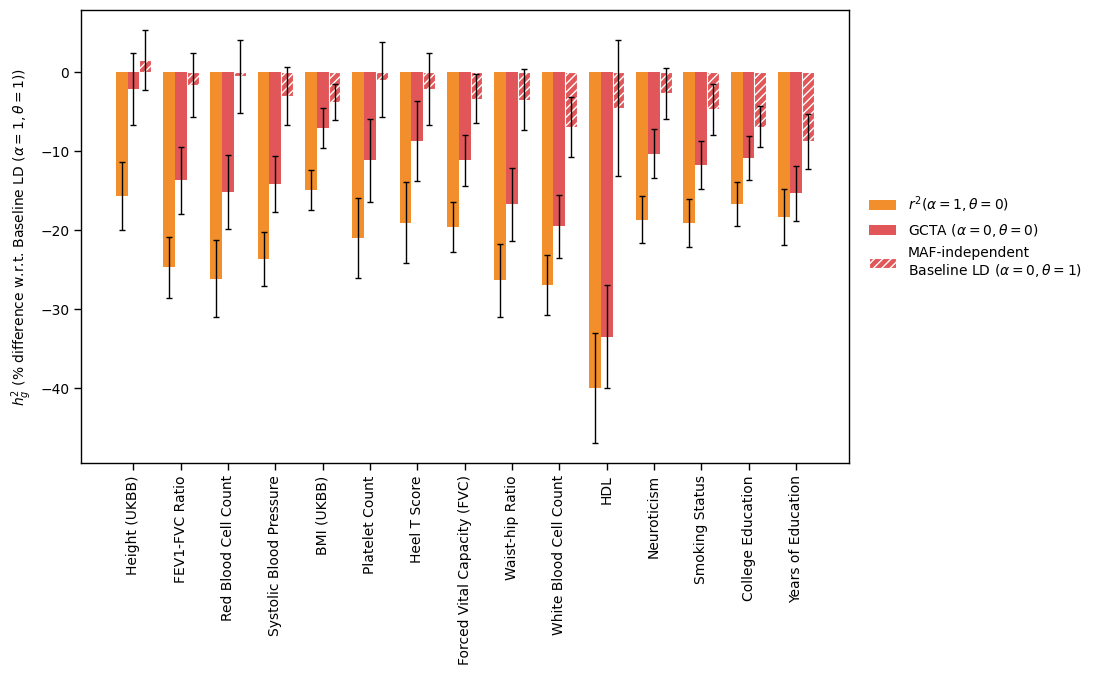

In [575]:
metric_tex = {
        'hg2': '$h_g^2$',
        'LRT': 'LRT',
        'Intercept': 'Intercept',
        'tau_star': '$\\tau^*$',
        'tau_star_m1': '$\\tau^*(w)$',
        'tau': '$\\tau$',
        'tau_pvalue': '$\\tau$ -log10(p-value)',
        'enrichment': 'Enrichment'
    }

method_names = {
        'LDSC': '$r^2 (\\alpha=1, \\theta=0)$',
        'S-LDSC': '$r^2 (\\alpha=1, \\theta=1)$',
        'L2': '$r^2 (\\alpha=0, \\theta=0)$',
        'S-L2': '$r^2 (\\alpha=0, \\theta=1)$',
        'L2MAF': '$r^2 (\\alpha=1, \\theta=0)$',
        'S-L2MAF': 'Baseline LD $(\\alpha=1, \\theta=1)$',
        'LD2': 'GCTA $(\\alpha=0, \\theta=0)$',
        'S-LD2': 'MAF-independent\nBaseline LD $(\\alpha=0, \\theta=1)$',
        'LD2MAF': '$D^2 (\\alpha=1, \\theta=0)$',
        'S-LD2MAF': '$D^2 (\\alpha=1, \\theta=1)$'
    }
ld_scores_colors = {
        'LDSC': '#F28E2B',
        'LD2': '#E15759',
        'LD2MAF': '#76B7B2',
        'L2': '#B07AA1',
        'L2MAF': '#F28E2B'
    }
ld_scores_ord = ["L2MAF", "LD2"]
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
sns.set_context('paper')
plt.rcParams.update({"xtick.labelsize": 10,
                     "ytick.labelsize": 10,
                    "legend.fontsize": 10,
                    "axes.labelsize": 10})
plot_combined_global_results(metric_df, 'hg2', relative_to='S-L2MAF')

In [290]:
set_size(800)

(11.069600110696001, 6.841389110279728)

In [576]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
r_meta = importr('meta')
plot_meta_analyzed_annotation_coefficients_scatter(annot_df)

TypeError: get_significant_factors() takes 2 positional arguments but 4 were given

In [ ]:
'CpG_Content_50kb', 'Recomb_Rate_10kb', 'GTEx_eQTL_MaxCPP', 
'Backgrd_Selection_Stat', 'BLUEPRINT_DNA_methylation_MaxCPP',
'Ancient_Sequence_Age_Human_Promoter', 'Nucleotide_Diversity_10kb',
'MAF_Adj_ASMC', 'Conserved_Primate_phastCons46way'

In [272]:
trait_subset = [
    'Height (UKBB)', 'FEV1-FVC Ratio', 'Red Blood Cell Count',
    'Systolic Blood Pressure', 'BMI (UKBB)', 'Platelet Count',
    'Heel T Score', 'Forced Vital Capacity (FVC)', 'Waist-hip Ratio',
    'White Blood Cell Count', 'HDL', 'Neuroticism', 'Smoking Status',
    'College Education', 'Years of Education'
]


In [167]:
len(['Waist-hip Ratio', 'Type 2 Diabetes (UKBB)', 'HDL', 'Eosinophil Count',
       'BMI (UKBB)', 'Eczema', 'Heel T Score', 'Auto Immune Traits', 'LDL',
       'Platelet Count', 'Red Blood Cell Distribution Width', 'Neuroticism',
       'Autism Spectrum', 'Respiratory and ENT Diseases',
       'Red Blood Cell Count', 'Height (UKBB)', 'Age at Menarche',
       'White Blood Cell Count', 'Age first birth', 'College Education',
       'FEV1-FVC Ratio', 'Morning Person', 'Rheumatoid Arthritis',
       'High Cholesterol', 'Hypothyroidism', 'Crohn\'s Disease',
       'Forced Vital Capacity (FVC)', 'Systolic Blood Pressure',
       'Smoking Status'])

29

In [104]:
len(['Height (UKBB)', 'FEV1-FVC Ratio', 'Red Blood Cell Count',
       'Systolic Blood Pressure', 'BMI (UKBB)', 'Platelet Count',
       'Heel T Score', 'Forced Vital Capacity (FVC)', 'Waist-hip Ratio',
       'White Blood Cell Count', 'HDL', 'Neuroticism', 'Smoking Status',
       'College Education', 'Hypothyroidism', 'Eosinophil Count',
       'Type 2 Diabetes (UKBB)', 'Age at Menarche', 'High Cholesterol',
       'Eczema', 'Rheumatoid Arthritis', 'Age first birth',
       'Auto Immune Traits', 'Red Blood Cell Distribution Width'])

24

In [463]:

n_metric_df = metric_df.loc[metric_df['Metric'] == 'hg2']

mean_pivot = n_metric_df.pivot(index='Trait', columns='Method',
                             values='Score')
se_pivot = n_metric_df.pivot(index='Trait', columns='Method',
                               values='Score SE')

lb = mean_pivot - se_pivot
ub = mean_pivot + se_pivot

lb

Method                                   L2     L2MAF       LD2    LD2MAF  \
Trait                                                                       
Age at Menarche                    0.231616  0.210284  0.228767  0.210362   
Age at Menopause                   0.093562  0.084255  0.092856  0.085050   
Age first birth                    0.055372  0.049310  0.054256  0.048065   
Anorexia                           0.195872  0.215540  0.188735  0.214677   
Autism Spectrum                    0.516601  0.402122  0.516562  0.443642   
Auto Immune Traits                 0.007905  0.004162  0.007902  0.004348   
BMI                                0.124479  0.119513  0.120261  0.116763   
BMI (UKBB)                         0.284409  0.251751  0.282905  0.252877   
Balding Type I                     0.201017  0.171948  0.202147  0.172476   
College Education                  0.134698  0.121640  0.133197  0.122665   
Coronary Artery Disease            0.062527  0.060688  0.060661  0.064948   
Crohn's Disease                    0.449770  0.331056  0.446375  0.324712   
Depressive symptoms                0.032627  0.032930  0.032227  0.033597   
Dermatologic Diseases              0.011664  0.008186  0.010795  0.008024   
Eczema                             0.069539  0.060497  0.070808  0.060708   
Eosinophil Count                   0.202790  0.171888  0.201752  0.174088   
Ever Smoked                        0.086051  0.073870  0.084601  0.074359   
FEV1-FVC Ratio                     0.282363  0.233371  0.282233  0.233595   
Forced Vital Capacity (FVC)        0.235821  0.207417  0.234399  0.209141   
HDL                                0.126623  0.094569  0.128552  0.094126   
Hair Color                         0.135717  0.123562  0.135465  0.127407   
Heel T Score                       0.368994  0.314251  0.370875  0.317733   
Height                             0.200111  0.176377  0.196477  0.178152   
Height (UKBB)                      0.741261  0.595419  0.739101  0.607849   
High Cholesterol                   0.043824  0.031782  0.043270  0.032625   
Hypothyroidism                     0.053575  0.041711  0.053529  0.042292   
LDL                                0.085967  0.065825  0.084438  0.060656   
Morning Person                     0.105023  0.096415  0.104861  0.096704   
Neuroticism                        0.119753  0.102591  0.119753  0.102948   
Number children ever born          0.021306  0.019200  0.021836  0.020723   
Platelet Count                     0.356072  0.295753  0.353132  0.296884   
Red Blood Cell Count               0.268583  0.212852  0.264555  0.217826   
Red Blood Cell Distribution Width  0.230142  0.195430  0.226997  0.196969   
Respiratory and ENT Diseases       0.047834  0.039617  0.047487  0.040405   
Rheumatoid Arthritis               0.141869  0.090126  0.132092  0.094098   
Schizophrenia                      0.417085  0.394665  0.416945  0.390700   
Skin Color                         0.065481  0.073732  0.061802  0.071770   
Smoking Status                     0.100578  0.085049  0.099682  0.085606   
Sunburn Occasion                   0.045772  0.049691  0.043920  0.047839   
Systolic Blood Pressure            0.235567  0.199405  0.234062  0.202421   
Tanning                            0.048578  0.055927  0.048461  0.057183   
Type 2 Diabetes                    0.084347  0.067749  0.079535  0.060638   
Type 2 Diabetes (UKBB)             0.046333  0.037862  0.046791  0.038349   
Ulcerative Colitis                 0.205386  0.135583  0.204481  0.144487   
Waist-hip Ratio                    0.175255  0.143893  0.174448  0.146099   
White Blood Cell Count             0.214911  0.186223  0.215689  0.189548   
Years of Education                 0.106934  0.103607  0.106371  0.104053   

Method                                 S-L2   S-L2MAF     S-LD2  S-LD2MAF  
Trait                                                                      
Age at Menarche                    0.239579  0.243455  0.234799  0.238924 

In [93]:
get_significant_factors(mean_pivot, se_pivot)

['Autism Spectrum',
 'Height (UKBB)',
 'Rheumatoid Arthritis',
 "Crohn's Disease",
 'FEV1-FVC Ratio',
 'Eosinophil Count',
 'Red Blood Cell Count',
 'Platelet Count',
 'HDL',
 'Systolic Blood Pressure',
 'BMI (UKBB)',
 'White Blood Cell Count',
 'Age at Menarche',
 'LDL',
 'Heel T Score',
 'Forced Vital Capacity (FVC)',
 'Waist-hip Ratio',
 'Schizophrenia',
 'Height',
 'Neuroticism',
 'Smoking Status',
 'Balding Type I',
 'College Education',
 'Eczema',
 'High Cholesterol',
 'Hypothyroidism',
 'Age first birth',
 'Type 2 Diabetes (UKBB)',
 'Age at Menopause',
 'Auto Immune Traits',
 'Respiratory and ENT Diseases',
 'Years of Education',
 'Red Blood Cell Distribution Width',
 'BMI']

In [116]:
for f in glob.glob("../results/regression/EUR/M_5_50_chi2filt/*/regression_res.pbz2"):
    res = read_pbz2(f)
    
    df = pd.DataFrame({'x': res[x]['Annotations'][metric],
                       'y': res[y]['Annotations'][metric],
                       'Annotation': res[y]['Annotations']['Names']})
    
    df = df.loc[df['Annotation'].apply(lambda x: not (x == 'base' or 'MAFbin' in x or 'flanking.500' in x))]
    
    df['Trait'] = os.path.basename(os.path.dirname(f))
    
    dfs.append(df)

6.080297872340425

In [125]:
res = read_pbz2("../results/regression/EUR/M_5_50_chi2filt/UKB_460K.body_HEIGHTz/regression_res.pbz2")
res.keys()

dict_keys(['S-LDSC', 'LDSC', 'S-LD2', 'LD2', 'S-LD2MAF', 'LD2MAF', 'S-L2', 'L2', 'S-L2MAF', 'L2MAF', 'S-UL2', 'UL2', 'S-UL2MAF', 'UL2MAF'])

In [128]:
res['S-L2']['Annotation Sum'], res['S-L2']['Counts']

(array([[1.93250112e+06, 2.69803249e+04, 9.47347599e+04, 4.66010758e+04,
         5.88978334e+05, 4.61720259e+04, 9.09659111e+04, 2.60754147e+05,
         7.78788921e+05, 2.12136183e+05, 3.20060670e+05, 6.38061811e+05,
         8.29130715e+03, 2.84353800e+04, 8.06756573e+04, 9.25079447e+04,
         1.61394508e+05, 3.85868796e+05, 7.50713576e+05, 6.05948288e+04,
         5.17425778e+05, 1.28639510e+05, 3.24686732e+05, 8.15750016e+05,
         3.52825434e+05, 7.91548551e+04, 2.55192693e+05, 2.35870147e+05,
         7.32314554e+04, 2.40982981e+05, 2.01547672e+05, 7.46560379e+05,
         1.76616113e+04, 1.58581869e+04, 4.79516101e+04, 8.88317172e+04,
         2.03077090e+04, 8.91999364e+05, 4.99567810e+05, 3.22249756e+05,
         6.11176844e+03, 2.52565927e+05, 4.06286472e+05, 6.64115481e+05,
         8.07188882e+05, 3.40690423e+04, 3.17986609e+04, 2.12877754e+04,
         2.92143720e+04, 1.03794048e+04, 4.09423252e+04, 4.04051504e+04,
         1.31411325e+05, 3.36630392e+06, 1.53494768

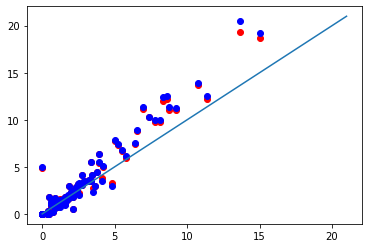

In [149]:
c = res['S-L2']['Counts'] / res['S-L2']['M']
c2 = res['S-L2']['Annotation Sum'] / res['S-L2']['Annotation Sum'][0][0]
y = res['S-L2']['Annotations']['enrichment'] * c / c2

plt.scatter(res['S-L2MAF']['Annotations']['enrichment'], res['S-L2']['Annotations']['enrichment'], c='red')
plt.scatter(res['S-L2MAF']['Annotations']['enrichment'], y, c='blue')
x=np.linspace(0., 21., 100)

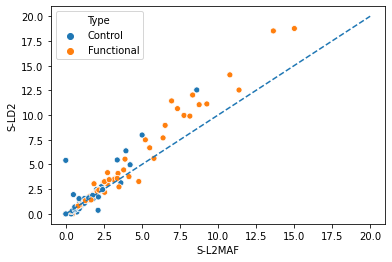

In [241]:
df = pd.DataFrame({'Name': res['S-L2MAF']['Annotations']['Names'],
              'S-L2MAF': res['S-L2MAF']['Annotations']['enrichment'],
              'S-LD2': res['S-LD2']['Annotations']['enrichment']})

df['Type'] = df['Name'].apply(lambda an: ['Functional', 'Control'][an == 'base' or 'MAFbin' in an or 'flanking.500' in an])

sns.scatterplot(x='S-L2MAF', y='S-LD2', hue='Type', data=df)
x = np.linspace(0.0, 20.)
plt.plot(x, x, ls='--')

In [58]:
enrichment_exclude = [
        'BLUEPRINT_DNA_methylation_MaxCPP',
        'BLUEPRINT_H3K27acQTL_MaxCPP',
        'BLUEPRINT_H3K4me1QTL_MaxCPP',
        'Backgrd_Selection_Stat',
        'CpG_Content_50kb',
        'GERP.NS',
        'GTEx_eQTL_MaxCPP',
        'Human_Enhancer_Villar_Species_Enhancer_Count',
        'MAF_Adj_ASMC',
        'MAF_Adj_LLD_AFR',
        'MAF_Adj_Predicted_Allele_Age',
        'Nucleotide_Diversity_10kb',
        'Recomb_Rate_10kb',
        'base'
    ]

In [ ]:
mean_piv, se_piv = meta_analyze_annot(annot_df, 'enrichment')
mean_piv.drop(enrichment_exclude, inplace=True)

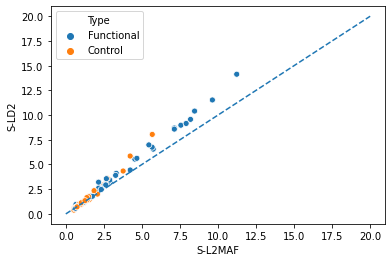

In [265]:
mean_piv['Type'] = mean_piv.index.to_series().apply(lambda an: ['Functional', 'Control'][an == 'base' or 'MAFbin' in an or 'flanking.500' in an])
sns.scatterplot(x='S-L2MAF', y='S-LD2', hue='Type', data=mean_piv)
x = np.linspace(0.0, 20.)
plt.plot(x, x, ls='--')

In [266]:
mean_piv.groupby('Type').mean()

Method       S-L2MAF  S-LD2MAF     S-LD2      S-L2
Type                                              
Control     1.500217  1.505669  1.679373  1.668612
Functional  3.842708  3.854427  4.536578  4.528143

In [267]:
1.7/1.5, 4.5/3.8

(1.1333333333333333, 1.1842105263157896)

# Debugging issues with enrichment estimates:

In [5]:
nss_df, ld_score_names, weight_col, annot_sums, ldc_counts = read_pbz2(
    "../cache/regression/M_5_50_chi2filt/UKB_460K.repro_MENARCHE_AGE/S-L2.pbz2"
)

In [6]:
nss_df2, ld_score_names2, weight_col2, annot_sums2, ldc_counts2 = read_pbz2(
    "../cache/regression/M_5_50_chi2filt/UKB_460K.repro_MENARCHE_AGE/S-L2MAF.pbz2"
)

In [7]:
from ldsc.ldscore.regressions import Hsq

reg = Hsq(nss_df[['CHISQ']].values,
          nss_df[ld_score_names].values,
          nss_df[[weight_col]].values,
          nss_df[['N']].values,
          annot_sums,
          old_weights=True)

reg2 = Hsq(nss_df2[['CHISQ']].values,
          nss_df2[ld_score_names2].values,
          nss_df2[[weight_col2]].values,
          nss_df2[['N']].values,
          annot_sums2,
          old_weights=True)

In [8]:
reg.tot, reg2.tot, reg.intercept, reg2.intercept

(0.24793897064638815, 0.252999142489249, 1.0718610579601893, 1.060817314630111)

In [13]:
def plot_xy(x, y, ax=None, title=None, c=None):
    
    if ax is None:
        ax = plt

    line = np.linspace(np.min([x, y]), np.max([x, y]), 1000)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(slope)

    ax.scatter(x, y, c=c)
    ax.plot(line, line, ls='--')
    ax.plot(line, intercept + slope*line, c='red')
    
    if title is not None:
        ax.set(xlabel='S-L2MAF', ylabel='S-L2')
        ax.set_title(title + f' ~ Slope: {slope}')

In [10]:
annots = read_pbz2("../data/annotations/annotation_data/EUR/M_5_50.pbz2")

for i in range(annots['Weighted Covariance'].shape[0]):
    annots['Weighted Covariance'][i, :] = ldc_counts*annots['Weighted Covariance'][i, :] / annot_sums

1.0
1.0997448311926488
1.0136890074545646
1.2297991152257723


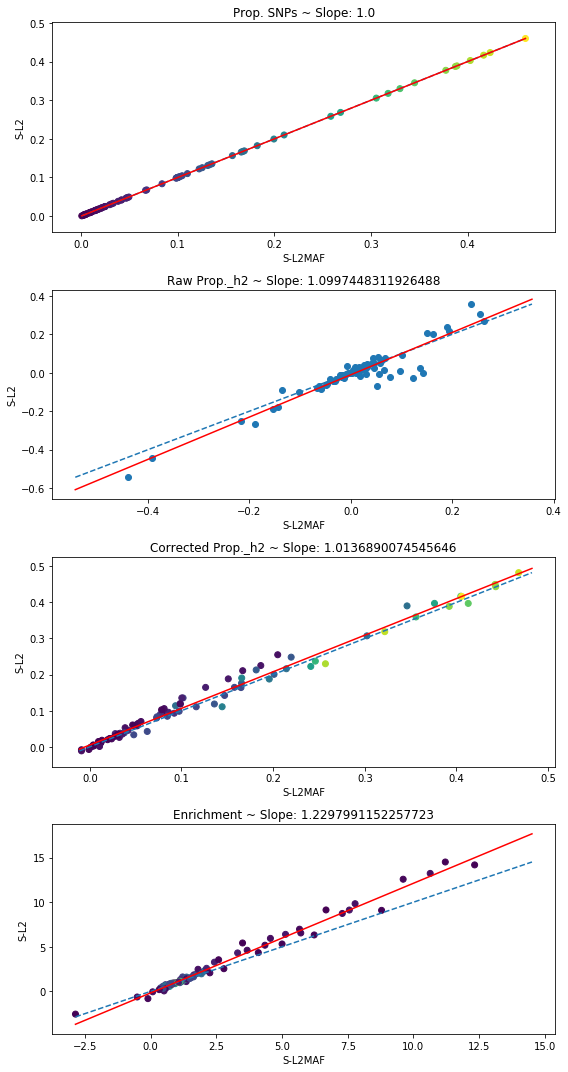

In [13]:
reg_ol = reg._overlap_output(
                ld_score_names, annots['Weighted Covariance'],
                ldc_counts, ldc_counts[0][0], True
            )
reg_ol.set_index('Category', inplace=True)
reg_enrichment_exclude = [e + 'L2' for e in enrichment_exclude]
reg_ol = reg_ol.drop(reg_enrichment_exclude)


reg_ol_filt = [ldn not in reg_enrichment_exclude for ldn in ld_score_names]

reg2_ol = reg2._overlap_output(
                ld_score_names2, annots['Covariance'],
                annot_sums2, annot_sums2[0][0], True
            )
reg2_ol.set_index('Category', inplace=True)
reg2_enrichment_exclude = [e + 'L2MAF' for e in enrichment_exclude]
reg2_ol = reg2_ol.drop(reg2_enrichment_exclude)


reg2_ol_filt = [ldn not in reg2_enrichment_exclude for ldn in ld_score_names2]

_, axes = plt.subplots(figsize=(8, 15), nrows=4)

plot_xy(reg2_ol['Prop._SNPs'], reg_ol['Prop._SNPs'], axes[0], "Prop. SNPs", c=reg2_ol['Prop._SNPs'])
plot_xy(reg2.prop[0][reg2_ol_filt], reg.prop[0][reg_ol_filt], axes[1], "Raw Prop._h2")
plot_xy(reg2_ol['Prop._h2'], reg_ol['Prop._h2'], axes[2], "Corrected Prop._h2", c=reg2_ol['Prop._SNPs'])
plot_xy(reg2_ol['Enrichment'], reg_ol['Enrichment'], axes[3], "Enrichment", c=reg2_ol['Prop._SNPs'])
plt.tight_layout()

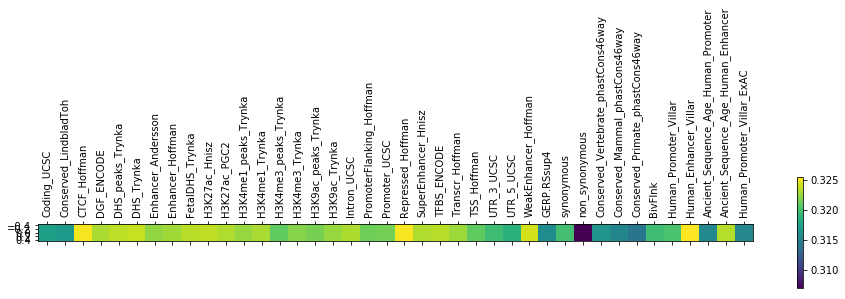

In [27]:
col_sel = [n in annots['Binary annotations'] and 'MAFbin' not in n and 'flanking.500' not in n for n in annots['Names']]
plt.matshow(annot_sums[:, col_sel] /  ldc_counts[:, col_sel])
plt.xticks(range(len(annots['Names'][col_sel])), annots['Names'][col_sel], rotation=90)
plt.colorbar()
plt.show()

In [449]:
reg_ol = reg._overlap_output(
                ld_score_names, annots['Covariance'],
                ldc_counts, ldc_counts[0][0], True
            )
reg_ol

Category  Prop._SNPs  \
0                                              baseL2    1.000000   
1                                       Coding_UCSCL2    0.014259   
2                          Coding_UCSC.flanking.500L2    0.049363   
3                             Conserved_LindbladTohL2    0.024671   
4                Conserved_LindbladToh.flanking.500L2    0.305531   
..                                                ...         ...   
92              Ancient_Sequence_Age_Human_EnhancerL2    0.005138   
93  Ancient_Sequence_Age_Human_Enhancer.flanking.5...    0.009027   
94     Human_Enhancer_Villar_Species_Enhancer_CountL2    0.066283   
95                       Human_Promoter_Villar_ExACL2    0.002497   
96          Human_Promoter_Villar_ExAC.flanking.500L2    0.000577   

        Prop._h2  Prop._h2_std_error    Enrichment  Enrichment_std_error  \
0   9.953066e-01        2.116971e-03  9.953066e-01          2.116971e-03   
1   6.682351e+11        3.012851e+11  4.686363e+13          2.112926e+13   
2   2.112097e+12        9.522748e+11  4.278716e+13          1.929131e+13   
3   1.083189e+12        4.883741e+11  4.390618e+13          1.979584e+13   
4   7.093066e+12        3.198028e+12  2.321551e+13          1.046710e+13   
..           ...                 ...           ...                   ...   
92  2.478442e+11        1.117447e+11  4.823659e+13          2.174828e+13   
93  2.765826e+11        1.247019e+11  3.064027e+13          1.381468e+13   
94  1.996626e+12        9.002124e+11  3.012270e+13          1.358133e+13   
95  2.881606e+11        1.299221e+11  1.154183e+14          5.203831e+13   
96  6.279586e+10        2.831257e+10  1.088186e+14          4.906271e+13   

   Enrichment_p   Coefficient  Coefficient_std_error  Coefficient_z-score  
0            NA  5.064300e-09           7.857349e-08             0.064453  
1   3.32855e-05  1.680808e-07           3.819672e-07             0.440040  
2      0.735059 -2.665793e-07           8.967221e-08            -2.972819  
3   3.39719e-06 -3.076871e-08           5.332762e-07            -0.057698  
4      0.376486 -1.863493e-07           6.419105e-08            -2.903041  
..          ...           ...                    ...                  ...  
92     0.339242 -1.266116e-07           3.230170e-07            -0.391966  
93     0.213737 -3.089184e-07           2.103653e-07            -1.468485  
94     0.211429  3.151249e-08           2.597174e-08             1.213338  
95  0.000830838  1.168563e-06           5.645534e-07             2.069889  
96     0.399249 -6.712039e-08           1.414931e-06            -0.047437  

[97 rows x 10 columns]

In [450]:
reg2_ol = reg2._overlap_output(
                ld_score_names2, annots['Covariance'],
                annot_sums2, annot_sums2[0][0], True
            )
reg2_ol

Category  Prop._SNPs  Prop._h2  \
0                                           baseL2MAF    1.000000  1.000000   
1                                    Coding_UCSCL2MAF    0.014259  0.079956   
2                       Coding_UCSC.flanking.500L2MAF    0.049363  0.028728   
3                          Conserved_LindbladTohL2MAF    0.024671  0.186685   
4             Conserved_LindbladToh.flanking.500L2MAF    0.305531  0.249695   
..                                                ...         ...       ...   
92           Ancient_Sequence_Age_Human_EnhancerL2MAF    0.005138  0.012192   
93  Ancient_Sequence_Age_Human_Enhancer.flanking.5...    0.009027  0.000006   
94  Human_Enhancer_Villar_Species_Enhancer_CountL2MAF    0.066283  0.123624   
95                    Human_Promoter_Villar_ExACL2MAF    0.002497  0.030483   
96       Human_Promoter_Villar_ExAC.flanking.500L2MAF    0.000577  0.003725   

    Prop._h2_std_error  Enrichment  Enrichment_std_error Enrichment_p  \
0         6.856496e-08    1.000000          6.856496e-08           NA   
1         1.613366e-02    5.607321          1.131461e+00  5.01401e-05   
2         2.467528e-02    0.581976          4.998752e-01     0.399764   
3         3.278362e-02    7.567108          1.328857e+00  3.97148e-06   
4         6.114488e-02    0.817249          2.001264e-01     0.359688   
..                 ...         ...                   ...          ...   
92        9.982426e-03    2.372807          1.942826e+00     0.480537   
93        1.047369e-02    0.000649          1.160293e+00      0.39092   
94        4.749132e-02    1.865089          7.164923e-01     0.225412   
95        7.875770e-03   12.209392          3.154520e+00  0.000487029   
96        4.469211e-03    6.455166          7.744673e+00      0.47983   

     Coefficient  Coefficient_std_error  Coefficient_z-score  
0  -3.534879e-08           1.859532e-08            -1.900951  
1   7.453609e-08           9.931769e-08             0.750481  
2  -8.821600e-08           2.543853e-08            -3.467810  
3   1.906661e-08           1.360607e-07             0.140133  
4  -5.419654e-08           2.033694e-08            -2.664931  
..           ...                    ...                  ...  
92 -5.285374e-08           8.953646e-08            -0.590304  
93 -6.539835e-08           6.101893e-08            -1.071772  
94  8.796525e-09           7.886844e-09             1.115342  
95  3.488375e-07           1.422231e-07             2.452749  
96 -1.348876e-07           4.000150e-07            -0.337206  

[97 rows x 10 columns]

In [28]:
reg_ol.loc[reg_ol['Enrichment'] > 6]

Prop._SNPs  Prop._h2  \
Category                                                          
Coding_UCSCL2                                0.014259  0.093364   
Conserved_LindbladTohL2                      0.024671  0.225073   
Intron_UCSC.flanking.500L2                   0.009340  0.065133   
GERP.RSsup4L2                                0.008150  0.102521   
synonymousL2                                 0.003120  0.019739   
Conserved_Vertebrate_phastCons46wayL2        0.029436  0.188226   
Conserved_Mammal_phastCons46wayL2            0.021439  0.210837   
Conserved_Primate_phastCons46wayL2           0.019269  0.254991   
BivFlnkL2                                    0.013549  0.118427   
Human_Promoter_Villar.flanking.500L2         0.003589  0.032616   
Ancient_Sequence_Age_Human_PromoterL2        0.004171  0.060529   
Human_Promoter_Villar_ExACL2                 0.002497  0.035418   
Human_Promoter_Villar_ExAC.flanking.500L2    0.000577  0.005270   

                                           Prop._h2_std_error  Enrichment  \
Category                                                                    
Coding_UCSCL2                                        0.020804    6.547645   
Conserved_LindbladTohL2                              0.043725    9.123134   
Intron_UCSC.flanking.500L2                           0.021825    6.973279   
GERP.RSsup4L2                                        0.026113   12.579360   
synonymousL2                                         0.020458    6.326412   
Conserved_Vertebrate_phastCons46wayL2                0.044356    6.394393   
Conserved_Mammal_phastCons46wayL2                    0.043890    9.834078   
Conserved_Primate_phastCons46wayL2                   0.036589   13.233155   
BivFlnkL2                                            0.021312    8.740413   
Human_Promoter_Villar.flanking.500L2                 0.017148    9.088055   
Ancient_Sequence_Age_Human_PromoterL2                0.017582   14.513053   
Human_Promoter_Villar_ExACL2                         0.009786   14.186137   
Human_Promoter_Villar_ExAC.flanking.500L2            0.005279    9.132214   

                                           Enrichment_std_error Enrichment_p  \
Category                                                                       
Coding_UCSCL2                                          1.458975  0.000185501   
Conserved_LindbladTohL2                                1.772373  1.12638e-05   
Intron_UCSC.flanking.500L2                             2.336637    0.0110014   
GERP.RSsup4L2                                          3.204119  0.000507822   
synonymousL2                                           6.557140     0.410573   
Conserved_Vertebrate_phastCons46wayL2                  1.506859   0.00053706   
Conserved_Mammal_phastCons46wayL2                      2.047165  3.76681e-05   
Conserved_Primate_phastCons46wayL2                     1.898866  4.93117e-09   
BivFlnkL2                                              1.572922  1.77616e-06   
Human_Promoter_Villar.flanking.500L2                   4.777994    0.0972065   
Ancient_Sequence_Age_Human_PromoterL2                  4.215559   0.00159339   
Human_Promoter_Villar_ExACL2                           3.919668  0.000973481   
Human_Promoter_Villar_ExAC.flanking.500L2              9.148300     0.388275   

                                            Coefficient  \
Category                                                  
Coding_UCSCL2                              1.988745e-07   
Conserved_LindbladTohL2                   -1.973677e-08   
Intron_UCSC.flanking.500L2                 2.943764e-07   
GERP.RSsup4L2                              6.355281e-07   
synonymousL2                              -8.889414e-07   
Conserved_Vertebrate_phastCons46wayL2     -3.335010e-07   
Conserved_Mammal_phastCons46wayL2          4.665672e-07   
Conserved_Primate_phastCons46wayL2         1.384280e-06   
BivFlnkL2                                  7.563335e-07   
Human_Promoter_Villar.flanking.

In [457]:
reg2_ol.loc[reg2_ol['Enrichment'] > 5]

Prop._SNPs  Prop._h2  \
Category                                                             
Coding_UCSCL2MAF                                0.014259  0.079956   
Conserved_LindbladTohL2MAF                      0.024671  0.186685   
Intron_UCSC.flanking.500L2MAF                   0.009340  0.051909   
GERP.RSsup4L2MAF                                0.008150  0.077735   
synonymousL2MAF                                 0.003120  0.018813   
Conserved_Vertebrate_phastCons46wayL2MAF        0.029436  0.151497   
Conserved_Mammal_phastCons46wayL2MAF            0.021439  0.167360   
Conserved_Primate_phastCons46wayL2MAF           0.019269  0.203233   
BivFlnkL2MAF                                    0.013549  0.098179   
Human_Promoter_Villar.flanking.500L2MAF         0.003589  0.031240   
Ancient_Sequence_Age_Human_PromoterL2MAF        0.004171  0.046784   
Human_Promoter_Villar_ExACL2MAF                 0.002497  0.030483   
Human_Promoter_Villar_ExAC.flanking.500L2MAF    0.000577  0.003725   

                                              Prop._h2_std_error  Enrichment  \
Category                                                                       
Coding_UCSCL2MAF                                        0.016134    5.607321   
Conserved_LindbladTohL2MAF                              0.032784    7.567108   
Intron_UCSC.flanking.500L2MAF                           0.018343    5.557537   
GERP.RSsup4L2MAF                                        0.021850    9.538154   
synonymousL2MAF                                         0.013735    6.029903   
Conserved_Vertebrate_phastCons46wayL2MAF                0.031572    5.146661   
Conserved_Mammal_phastCons46wayL2MAF                    0.032234    7.806151   
Conserved_Primate_phastCons46wayL2MAF                   0.028303   10.547110   
BivFlnkL2MAF                                            0.017979    7.246010   
Human_Promoter_Villar.flanking.500L2MAF                 0.013985    8.704641   
Ancient_Sequence_Age_Human_PromoterL2MAF                0.013499   11.217373   
Human_Promoter_Villar_ExACL2MAF                         0.007876   12.209392   
Human_Promoter_Villar_ExAC.flanking.500L2MAF            0.004469    6.455166   

                                              Enrichment_std_error  \
Category                                                             
Coding_UCSCL2MAF                                          1.131461   
Conserved_LindbladTohL2MAF                                1.328857   
Intron_UCSC.flanking.500L2MAF                             1.963866   
GERP.RSsup4L2MAF                                          2.681012   
synonymousL2MAF                                           4.402262   
Conserved_Vertebrate_phastCons46wayL2MAF                  1.072550   
Conserved_Mammal_phastCons46wayL2MAF                      1.503502   
Conserved_Primate_phastCons46wayL2MAF                     1.468807   
BivFlnkL2MAF                                              1.326942   
Human_Promoter_Villar.flanking.500L2MAF                   3.896798   
Ancient_Sequence_Age_Human_PromoterL2MAF                  3.236631   
Human_Promoter_Villar_ExACL2MAF                           3.154520   
Human_Promoter_Villar_ExAC.flanking.500L2MAF              7.744673   

                                             Enrichment_p   Coefficient  \
Category                                                                  
Coding_UCSCL2MAF                              5.01401e-05  7.453609e-08   
Conserved_LindbladTohL2MAF                    3.97148e-06  1.906661e-08   
Intron_UCSC.flanking.500L2MAF                    0.020455  6.233938e-08   
GERP.RSsup4L2MAF                               0.00176354  1.320182e-07   
synonymousL2MAF                                  0.251748 -2.200372e-07   
Conserved_Vertebrate_phastCons46wayL2MAF      0.000140752 -8.790894e-08   
Conserved_Mammal_phastCons46wayL2MAF           1.2508e-05  9.359984e-08   
Conserved_Primate_phastCons46wayL2MAF         2.29591e-09  3.518249e

# Checking predictive performance

In [282]:
am_res = read_pbz2("../results/regression/EUR/M_5_50_chi2filt/UKB_460K.repro_MENARCHE_AGE/regression_res.pbz2")
am_res

{'S-LD2': {'method': 'S-LD2',
  'binned_dataframe':           binLD       CHR     baseLD2  Coding_UCSCLD2  \
  0     -6.262981  9.924600    0.839234        0.016067   
  1      1.457655  9.776580    1.871126        0.033849   
  2      2.270735  9.635805    2.598382        0.045637   
  3      2.949805  9.788290    3.246247        0.056896   
  4      3.578799  9.768576    3.844743        0.065825   
  5      4.153379  9.713311    4.394260        0.072460   
  6      4.689394  9.612637    4.911982        0.081766   
  7      5.202206  9.656782    5.415160        0.087916   
  8      5.701726  9.640354    5.902695        0.091302   
  9      6.184832  9.668660    6.378771        0.103723   
  10     6.657409  9.632098    6.840463        0.112116   
  11     7.118835  9.526706    7.295914        0.119456   
  12     7.572860  9.529486    7.741895        0.128535   
  13     8.026002  9.482814    8.191815        0.126756   
  14     8.479398  9.448610    8.639610        0.135964   
  15  

S-L2MAF
1186998
1186998
S-L2
1186998
1186998


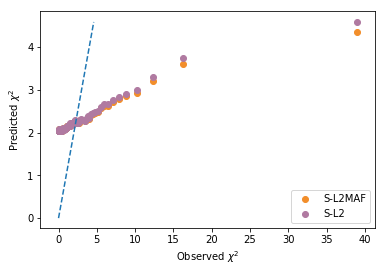

In [290]:
def predict_chi2(params, inputs, N):
    coef, intercept = params
    return N*np.dot(inputs, coef) + intercept


models = ['S-L2MAF', 'S-L2']

ld_scores_colors = {
        'LDSC': '#F28E2B',
        'LD2': '#E15759',
        'LD2MAF': '#76B7B2',
        'L2': '#B07AA1',
        'L2MAF': '#F28E2B',
        'S-LDSC': '#F28E2B',
        'S-LD2': '#E15759',
        'S-LD2MAF': '#76B7B2',
        'S-L2': '#B07AA1',
        'S-L2MAF': '#F28E2B'
    }

final_df = nss_df[['CHISQ']].copy()

for m in models:
    
    print(m)
    
    if m == 'S-L2MAF':
        data_df = nss_df2
        cols = ld_score_names2
    else:
        data_df = nss_df
        cols = ld_score_names
    
    pred_chi2 = predict_chi2(([c for _, c in am_res[m]['Coefficients']], am_res[m]['Intercept']),
                              data_df[cols].values, am_res[m]['N'])
    
    print(len(pred_chi2))
    print(len(final_df))
    
    final_df[m] = pred_chi2
    

final_df['Observed Percentiles'] = pd.qcut(final_df['CHISQ'], 100,
                                           labels=np.quantile(final_df['CHISQ'],
                                                              np.linspace(0.0, 1., 100)))
    

n_final_df = final_df.groupby('Observed Percentiles', as_index=False).mean()

for m in models:
    plt.scatter(n_final_df['CHISQ'], n_final_df[m], c=ld_scores_colors[m.replace('S-', '')])
    
exp_line = np.linspace(0., n_final_df[models].max().max())
plt.plot(exp_line, exp_line, ls='--')
    
plt.xlabel("Observed $\\chi^2$")
plt.ylabel("Predicted $\\chi^2$")
plt.legend()
plt.show()


In [484]:
nss_df2['SNP'].loc[~nss_df2['SNP'].isin(nss_df['SNP'])]

9319         rs637990
9326         rs951805
9327         rs710311
9328        rs1888759
9329       rs12121807
              ...    
1151457      rs738379
1151458     rs5759082
1151459     rs4822246
1151460      rs738381
1151461     rs5759093
Name: SNP, Length: 13176, dtype: object

In [281]:
len(nss_df), len(nss_df2)

(1186998, 1186998)

In [ ]:
methods = ['S-L2MAF', 'S-L2']

dfs=[]

for f in glob.glob("../results/regression/EUR/M_5_50_chi2filt/*/regression_res.pbz2"):
    res = read_pbz2(f)
    
    for m in methods:
        df = pd.DataFrame({'MSE': [res[m]['Prediction Peformance']['MSE per MAF bin']['MAFbin' + str(i + 1)] for i in range(10)]})

        df['bin'] = ['MAFbin' + str(i + 1) for i in range(10)]
        df['Method'] = m
        df['Trait'] = os.path.basename(os.path.dirname(f))

        dfs.append(df)
    
dfs = pd.concat(dfs)

plt.figure(figsize=(10, 10))
sns.boxplot(x="bin", y="MSE", hue="Method", data=dfs)

In [ ]:
sig_cats = [cat.replace('L2MAF', '') for cat in reg2_ol.loc[reg2_ol['Enrichment'] > 5].index]

row_sel = ['MAFbin' in n for n in annots['Names']]
col_sel = [n in annots['Binary annotations'] and 'MAFbin' not in n and 'flanking.500' not in n for n in annots['Names']]


maf_mat = annots['Covariance'][row_sel, :]
maf_mat = maf_mat[:, col_sel] / ldc_counts[0][col_sel].reshape(1, -1)

plt.matshow(maf_mat)
plt.yticks(range(10), ['MAFbin' + str(i + 1) for i in range(10)])
plt.xticks(range(len(annots['Names'][col_sel])), annots['Names'][col_sel], rotation=90)
plt.colorbar()
plt.show()

# Debugging issues with annotation covariance matrix

In [196]:
annots = read_pbz2("../data/annotations/annotation_data/EUR/M_5_50.pbz2")

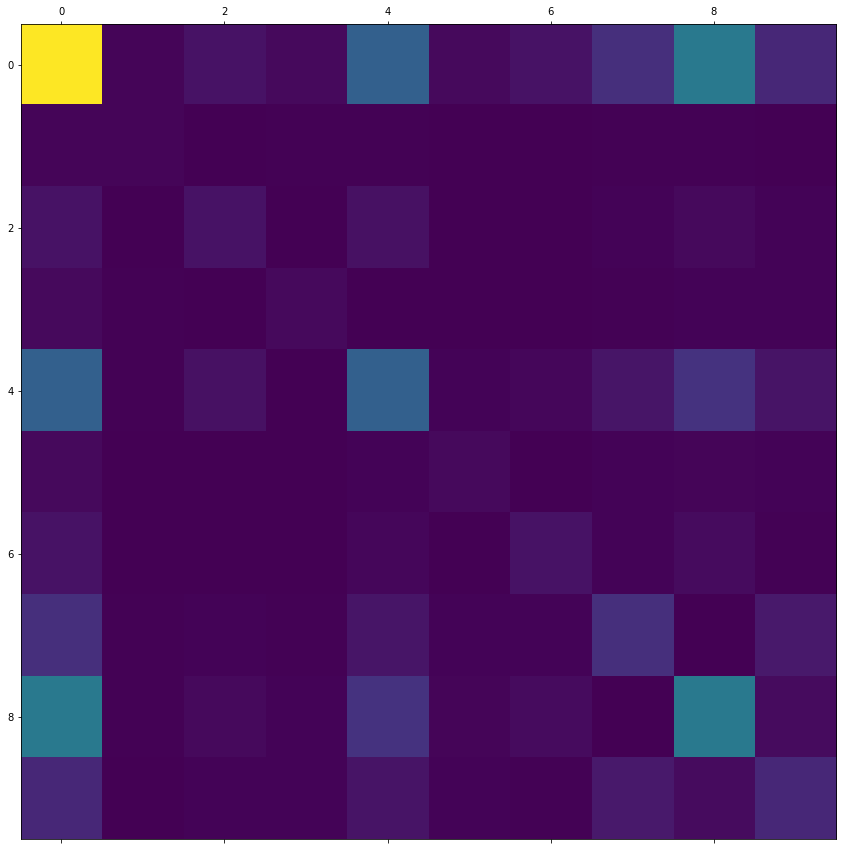

In [205]:
g, ax = plt.subplots(figsize=(15, 15))
ax.matshow(annots['Covariance'][:10, :10])

In [213]:
annot_sums, ldc_counts
cov_mat = annots['Covariance'].copy()

for i in range(cov_mat.shape[0]):
    cov_mat[i, :] = cov_mat[i, :] / annot_sums
    
cov_mat

array([[3.08468593e+00, 3.15048096e+00, 3.10614605e+00, ...,
        3.08352728e+00, 3.16964114e+00, 3.14559666e+00],
       [4.39849681e-02, 3.15048096e+00, 0.00000000e+00, ...,
        6.94161203e-02, 2.50240431e-01, 5.66938933e-02],
       [1.52268994e-01, 0.00000000e+00, 3.10614605e+00, ...,
        2.34360372e-01, 9.55811962e-01, 2.81640631e-01],
       ...,
       [2.04462495e-01, 3.29684688e-01, 3.17000856e-01, ...,
        1.52520990e+01, 1.53338818e-02, 2.52379267e-01],
       [7.70141858e-03, 4.35502539e-02, 4.73743746e-02, ...,
        5.61884279e-04, 3.16964114e+00, 0.00000000e+00],
       [1.78007659e-03, 2.29797084e-03, 3.25118257e-03, ...,
        2.15388974e-03, 0.00000000e+00, 3.14559666e+00]])

In [210]:
annots['Covariance']

array([[5.961159e+06, 8.500100e+04, 2.942600e+05, ..., 3.951240e+05,
        1.488300e+04, 3.440000e+03],
       [8.500100e+04, 8.500100e+04, 0.000000e+00, ..., 8.895000e+03,
        1.175000e+03, 6.200000e+01],
       [2.942600e+05, 0.000000e+00, 2.942600e+05, ..., 3.003100e+04,
        4.488000e+03, 3.080000e+02],
       ...,
       [3.951240e+05, 8.895000e+03, 3.003100e+04, ..., 1.954408e+06,
        7.200000e+01, 2.760000e+02],
       [1.488300e+04, 1.175000e+03, 4.488000e+03, ..., 7.200000e+01,
        1.488300e+04, 0.000000e+00],
       [3.440000e+03, 6.200000e+01, 3.080000e+02, ..., 2.760000e+02,
        0.000000e+00, 3.440000e+03]])

In [220]:
annot_counts = np.array([1000, 500, 200], dtype=np.float)

cov_mat = np.array([[1000, 500, 200],
                    [500, 500, 50],
                    [200, 50, 200]], dtype=np.float)

for i in range(cov_mat.shape[0]):
    cov_mat[i, :] = cov_mat[i, :] / annot_counts

cov_mat

array([[1.  , 1.  , 1.  ],
       [0.5 , 1.  , 0.25],
       [0.2 , 0.1 , 1.  ]])

In [224]:
vec = np.array([1.0, 0.2, 0.3])
np.dot(cov_mat, vec.T)

array([1.5  , 0.775, 0.52 ])

In [222]:
vec.T

array([1. , 0.2, 0.3])

In [244]:
mean_piv

NameError: name 'mean_piv' is not defined

1.0157901140598469


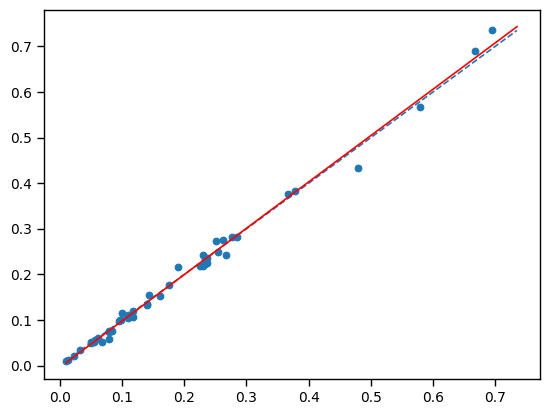

In [465]:
plot_xy(mean_pivot['S-L2MAF'], mean_pivot['S-L2'])

0.3249922687011448


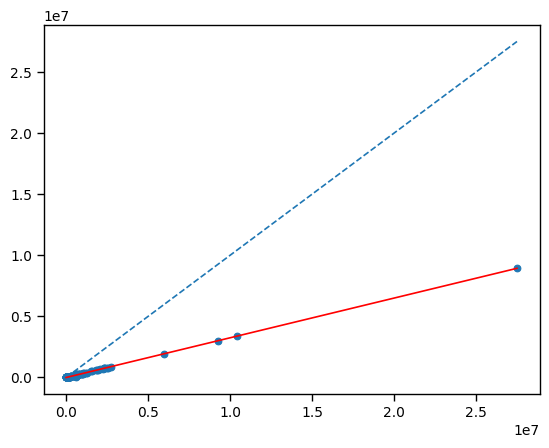

In [467]:
plot_xy(ldc_counts[0], annot_sums[0])

In [469]:
arr = np.random.normal(size=(10, 10))
arr.shape, arr[None, None].shape

((10, 10), (1, 1, 10, 10))

# Z-Score analyses

In [597]:
def get_z_score_of_difference(mean_pivot, se_pivot, m1, m2):
    return (mean_pivot[m2] - mean_pivot[m1]) / se_pivot[m1]

In [578]:
metric_df = pd.read_csv("../tables/regression_tables/EUR/M_5_50_chi2filt/global_metrics.csv")
annot_df = pd.read_csv("../tables/regression_tables/EUR/M_5_50_chi2filt/annotation_metrics.csv")

In [603]:
metric = 'Intercept'
ref_m = 'L2MAF'

n_metric_df = metric_df.loc[metric_df['Metric'] == metric]

mean_pivot = n_metric_df.pivot(index='Trait', columns='Method',
                             values='Score')
se_pivot = n_metric_df.pivot(index='Trait', columns='Method',
                               values='Score SE')

other_m = [m for m in mean_pivot.columns if m != ref_m]

df = pd.concat([get_z_score_of_difference(mean_pivot, se_pivot, ref_m, m)
               for m in other_m], axis=1)
df.columns = other_m
df.to_excel(f"../tables/regression_tables/EUR/M_5_50_chi2filt/global_metrics/{metric}_zscore_wrt_{ref_m}.xls")

In [600]:
metric = 'tau_star_w'
ref_m = 'S-L2MAF'

mean_pivot, se_pivot = meta_analyze_annot(annot_df, metric=metric)

mean_pivot = mean_pivot.loc[[an for an in mean_pivot.index if an != 'base' and 'MAFbin' not in an and 'flanking.' not in an]]
se_pivot = se_pivot.loc[[an for an in mean_pivot.index if an != 'base' and 'MAFbin' not in an and 'flanking.' not in an]]


other_m = [m for m in mean_pivot.columns if m != ref_m]

df = pd.concat([get_z_score_of_difference(mean_pivot, se_pivot, ref_m, m)
               for m in other_m], axis=1)
df.columns = other_m
df.to_excel(f"../tables/regression_tables/EUR/M_5_50_chi2filt/meta_analyzed_annotation_metrics/{metric}_zscore_wrt_{ref_m}.xls")

In [608]:
enrich_pred = pd.read_csv("../results/analysis/enrichment/chi2_table.csv")
enrich_pred, enrich_pred.columns

(     Unnamed: 0  $\chi^2$ Difference  $\chi^2$ Relative Difference  \
 0             0             0.005742                  12600.602449   
 1             1             0.140110                  13444.197491   
 2             2            -0.061430                   6714.566803   
 3             3            -0.054889                   6840.333712   
 4             4            -0.157523                  25697.126138   
 ..          ...                  ...                           ...   
 795         795             0.266730                    309.214821   
 796         796             1.061837                   5412.096425   
 797         797             0.424786                   5150.189059   
 798         798             0.490792                    448.216989   
 799         799            -0.192898                    376.218410   
 
                      Annotation  MAFbin    Model  
 0                   Coding_UCSC       1     S-L2  
 1                   Coding_UCSC       1  

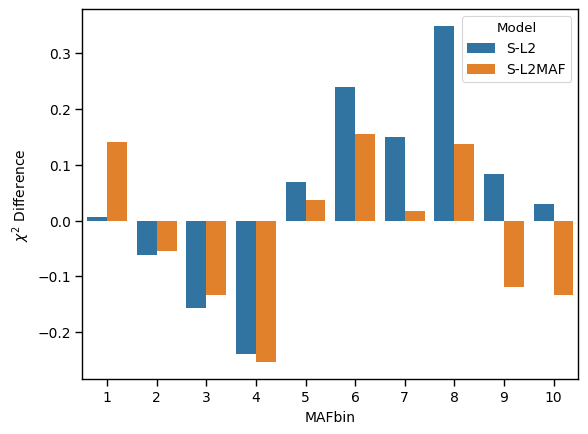

In [617]:
sns.barplot(x="MAFbin", y="$\chi^2$ Difference", hue="Model",
            data=enrich_pred.loc[enrich_pred['Annotation'] == 'Coding_UCSC'])

In [614]:
enrich_pred['Annotation'].unique()

array(['Coding_UCSC', 'Conserved_LindbladToh', 'CTCF_Hoffman',
       'DGF_ENCODE', 'DHS_peaks_Trynka', 'DHS_Trynka',
       'Enhancer_Andersson', 'Enhancer_Hoffman', 'FetalDHS_Trynka',
       'H3K27ac_Hnisz', 'H3K27ac_PGC2', 'H3K4me1_peaks_Trynka',
       'H3K4me1_Trynka', 'H3K4me3_peaks_Trynka', 'H3K4me3_Trynka',
       'H3K9ac_peaks_Trynka', 'H3K9ac_Trynka', 'Intron_UCSC',
       'PromoterFlanking_Hoffman', 'Promoter_UCSC', 'Repressed_Hoffman',
       'SuperEnhancer_Hnisz', 'TFBS_ENCODE', 'Transcr_Hoffman',
       'TSS_Hoffman', 'UTR_3_UCSC', 'UTR_5_UCSC', 'WeakEnhancer_Hoffman',
       'GERP.RSsup4', 'synonymous', 'non_synonymous',
       'Conserved_Vertebrate_phastCons46way',
       'Conserved_Mammal_phastCons46way',
       'Conserved_Primate_phastCons46way', 'BivFlnk',
       'Human_Promoter_Villar', 'Human_Enhancer_Villar',
       'Ancient_Sequence_Age_Human_Promoter',
       'Ancient_Sequence_Age_Human_Enhancer',
       'Human_Promoter_Villar_ExAC'], dtype=object)

In [11]:
methods = ['S-D2_0.0', 'S-D2_0.25', 'S-D2_0.5', 'S-D2_0.75', 'S-D2_1.0']
metric = 'Mean Absolute Difference'

annot_res = []
global_res = []
avg_chi2 = []

for trait_file in glob.glob("../results/regression/EUR/M_5_50_chi2filt/*/regression_res.pbz2"):
    trait_res = read_pbz2(trait_file)
    trait_name = os.path.basename(os.path.dirname(trait_file))
    
    for m in methods:
        
        for mbin, mbin_res in trait_res[m]['Predictive Performance']['Per MAF bin'].items():
            global_res.append({
                'Trait': trait_name,
                'MAFbin': mbin,
                'Score': mbin_res[metric],
                'Method': m
            })
            
        avg_chi2.append({
            'Trait': trait_name,
            'Score': trait_res[m]['Predictive Performance']['Overall']['Mean Predicted Chisq'],
            'Method': m
        })
        
        for ann, ann_res in trait_res[m]['Annotations']['Predictive Performance'].items():
            for mbin, mbin_res in ann_res['Per MAF bin'].items():
                annot_res.append({
                    'Annotation': ann,
                    'Trait': trait_name,
                    'MAFbin': mbin,
                    'Score': mbin_res[metric],
                    'Method': m
                })
                
annot_res = pd.DataFrame(annot_res)
global_res = pd.DataFrame(global_res)
avg_chi2 = pd.DataFrame(avg_chi2)

              Score
Method             
S-R2_0.0   2.013794
S-R2_0.25  2.007148
S-R2_0.5   1.999576
S-R2_0.75  1.991954
S-R2_1.0   1.985969


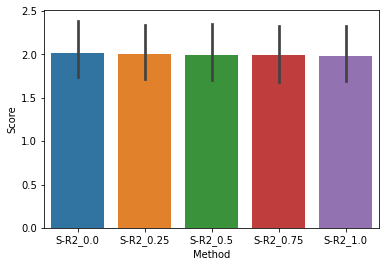

In [54]:
print(avg_chi2.groupby('Method').mean())
sns.barplot(x='Method', y='Score', data=avg_chi2)

0.6447194391208476


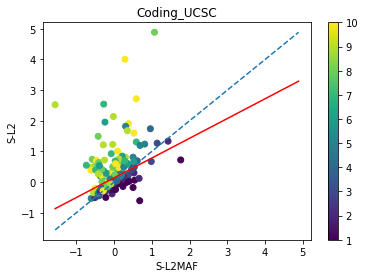

0.36496777131876057


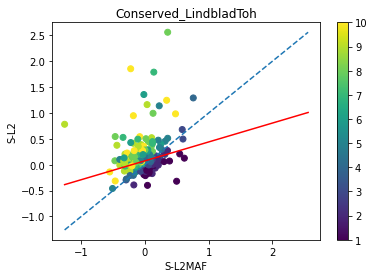

0.966293098399189


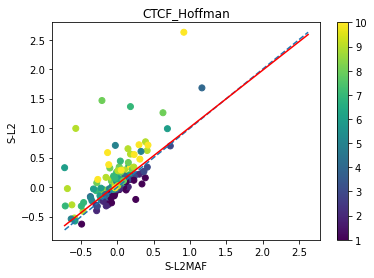

0.3548416529177189


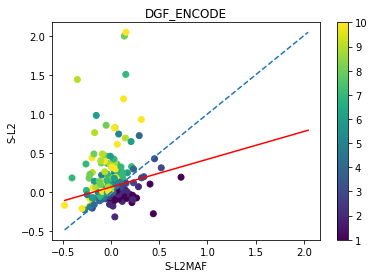

0.648700596251483


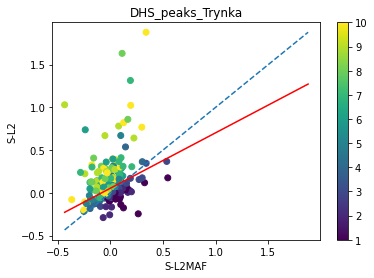

0.5986638266916806


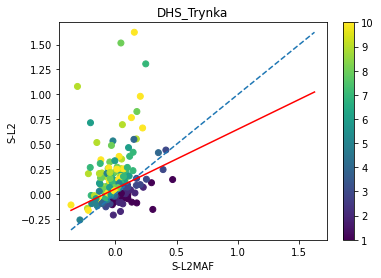

0.7403793846025256


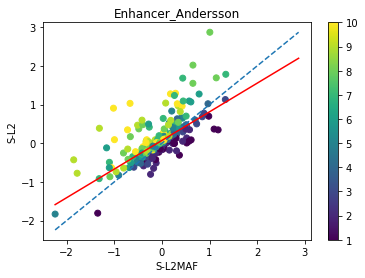

0.44298979736370203


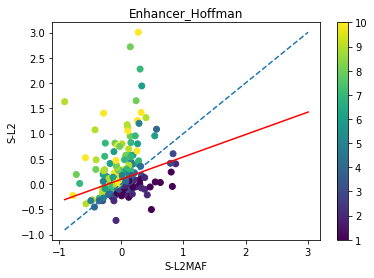

0.4481075688525381


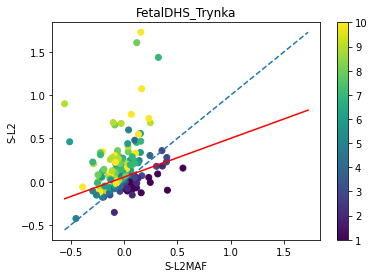

0.38425434374069595


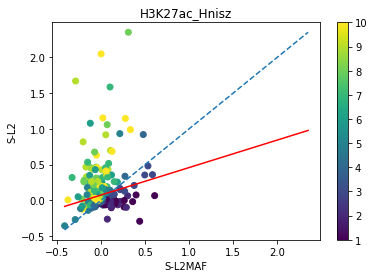

0.298703693693641


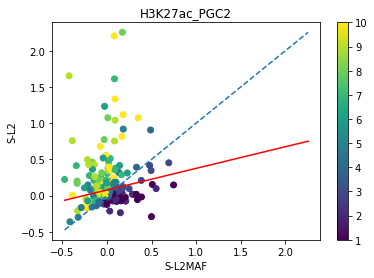

0.3157008126336128


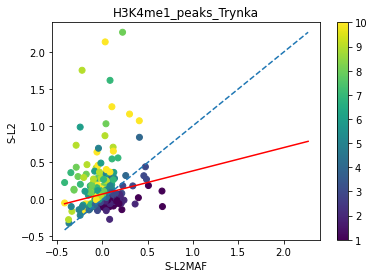

0.6385871486194


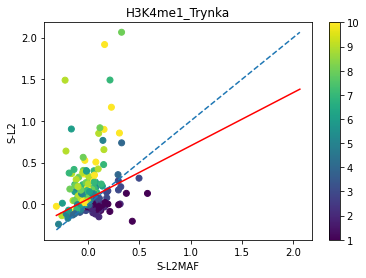

0.46430073986610176


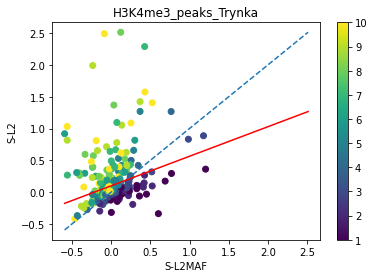

0.45608870737442936


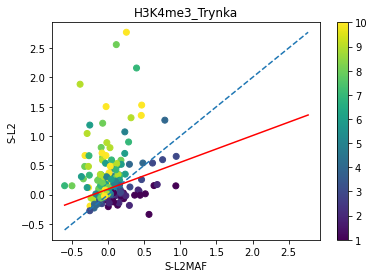

0.06873697388888217


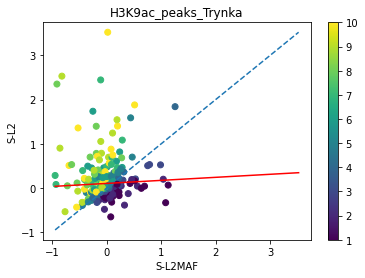

0.07031767767524953


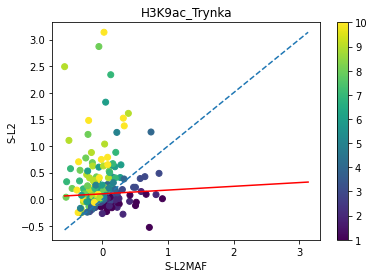

1.1594683339941514


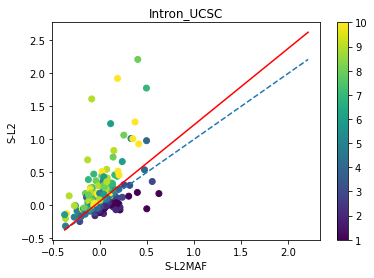

0.8778253942442766


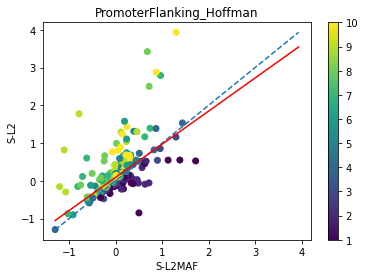

0.7536085985011128


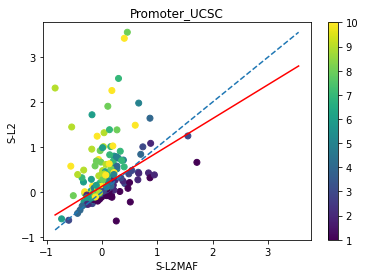

0.20495843579951967


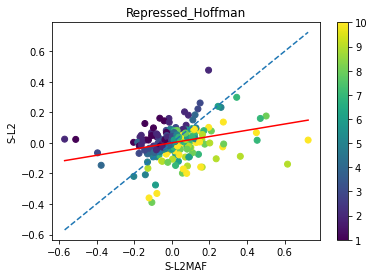

0.10509020932572982


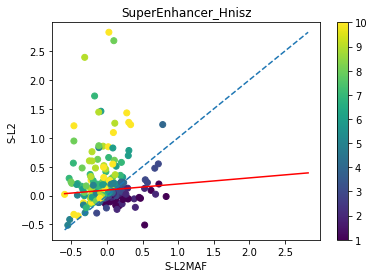

0.6067031640338814


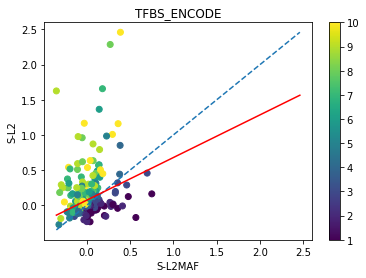

1.0082794513395108


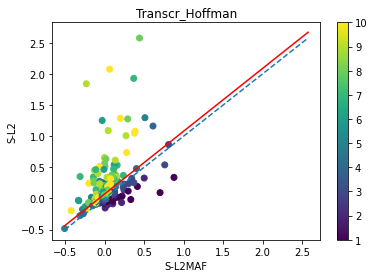

0.4886103394818922


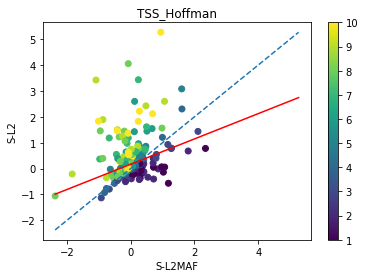

0.7616187523487404


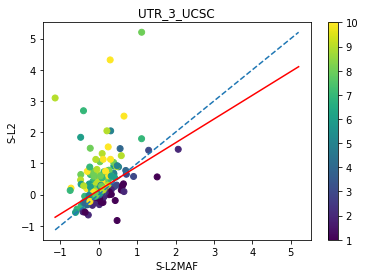

0.7786745078947782


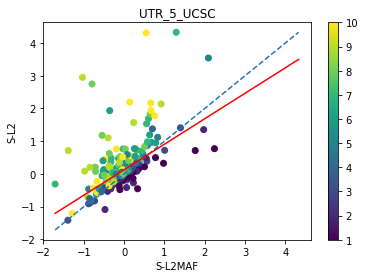

0.2521225761814044


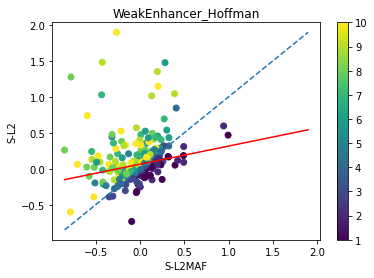

0.8196209702917667


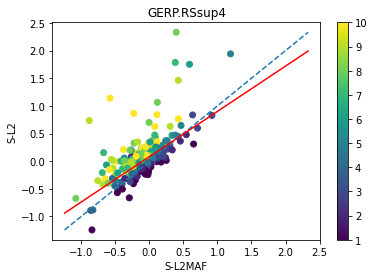

0.7096919266248509


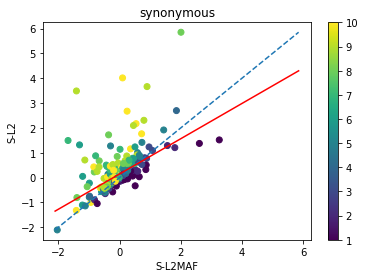

1.0707624066290566


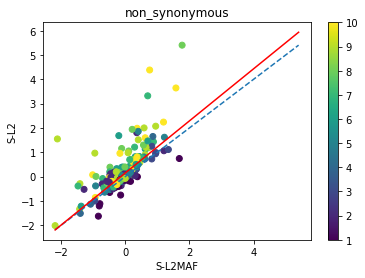

0.7533387670333884


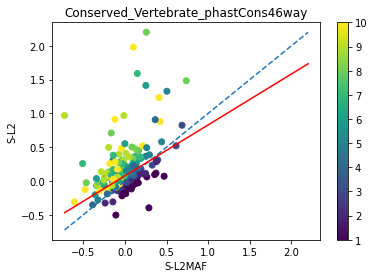

0.42253071279347554


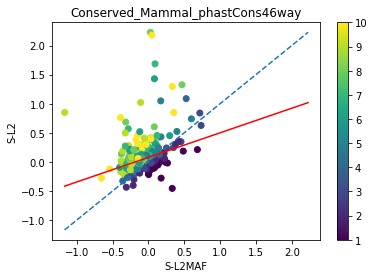

0.35184250870081707


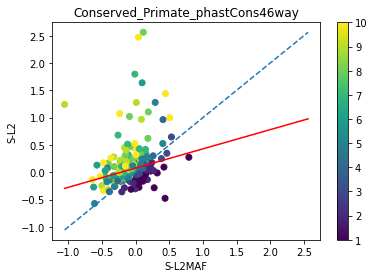

0.6015840768658612


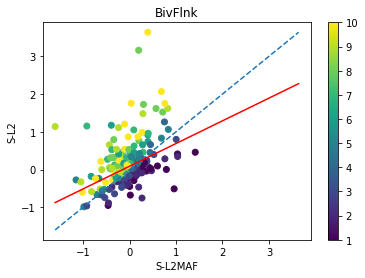

0.7458632805042299


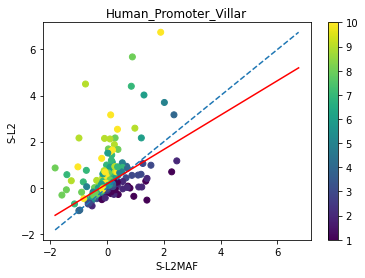

0.2864495267438428


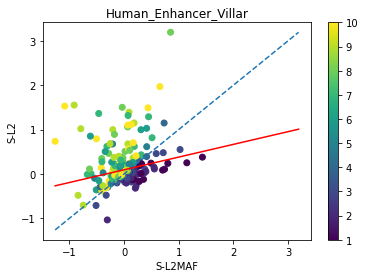

0.5634464595583387


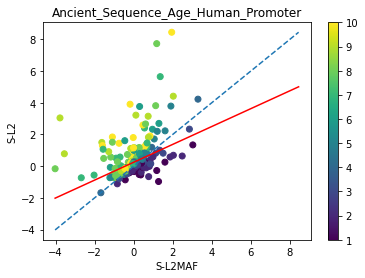

0.5389009191233612


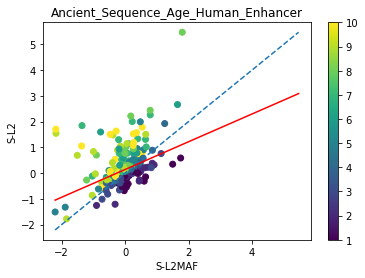

0.7111223334629853


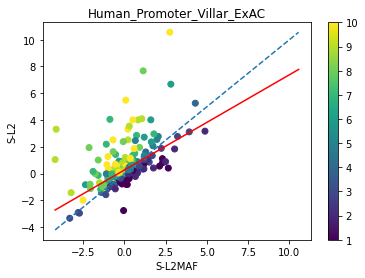

In [18]:
for ann in annot_res['Annotation'].unique():

    mdf = pd.merge(annot_res.loc[(annot_res['Annotation'] == ann) & (annot_res['Method'] == 'S-L2MAF')],
             annot_res.loc[(annot_res['Annotation'] == ann) & (annot_res['Method'] == 'S-L2')],
            on=['Trait', 'MAFbin'])
    plot_xy(mdf['Score_x'], mdf['Score_y'], c=mdf['MAFbin'])
    plt.xlabel('S-L2MAF')
    plt.ylabel('S-L2')
    plt.title(ann)
    plt.colorbar()
    plt.show()

Text(0, 0.5, 'Mean(Predicted $\\chi^2$ - Observed $\\chi^2$)')

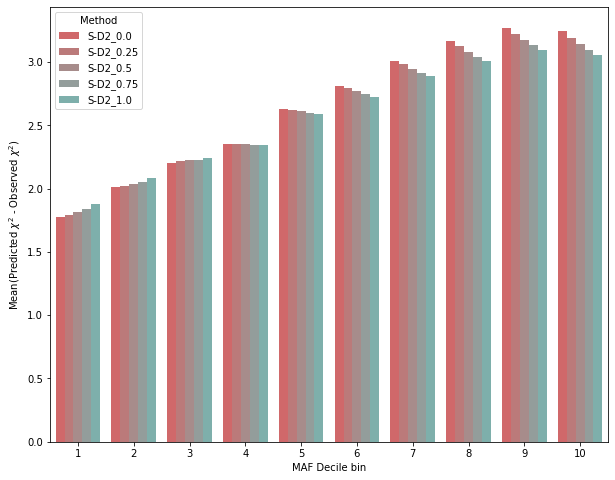

In [12]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='MAFbin', y='Score', hue='Method', data=annot_res, ci=None,
            palette={'S-D2_0.0': '#E15759',
        'S-D2_0.25': '#C66F6F',
        'S-D2_0.5': '#AC8786',
        'S-D2_0.75': '#919F9C',
        'S-D2_1.0': '#76B7B2'})
plt.xlabel('MAF Decile bin')
plt.ylabel('Mean(Predicted $\chi^2$ - Observed $\chi^2$)')

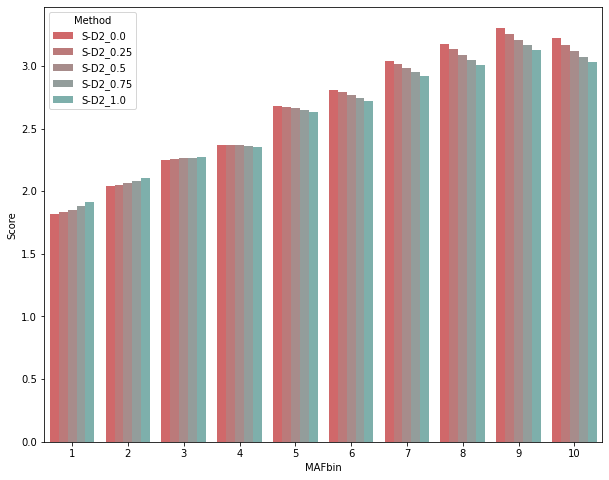

In [13]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='MAFbin', y='Score', hue='Method', ci=None, palette={'S-D2_0.0': '#E15759',
        'S-D2_0.25': '#C66F6F',
        'S-D2_0.5': '#AC8786',
        'S-D2_0.75': '#919F9C',
        'S-D2_1.0': '#76B7B2'}, 
            data=annot_res.loc[annot_res['Annotation'].isin([
    'Coding_UCSC', 'Conserved_LindbladToh', 'synonymous', 'Conserved_Vertebrate_phastCons46way',
    'Conserved_Mammal_phastCons46way', 'Conserved_Vertebrate_phastCons46way'
])])

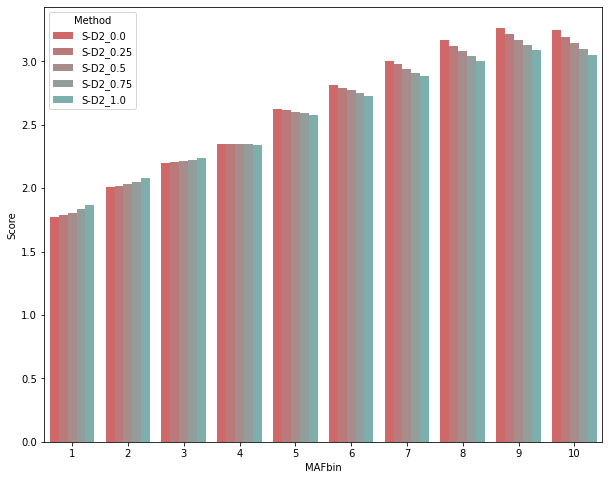

In [14]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='MAFbin', y='Score', hue='Method', ci=None, palette={'S-D2_0.0': '#E15759',
        'S-D2_0.25': '#C66F6F',
        'S-D2_0.5': '#AC8786',
        'S-D2_0.75': '#919F9C',
        'S-D2_1.0': '#76B7B2'},
            data=annot_res.loc[~annot_res['Annotation'].isin([
    'Coding_UCSC', 'Conserved_LindbladToh', 'synonymous', 'Conserved_Vertebrate_phastCons46way',
    'Conserved_Mammal_phastCons46way', 'Conserved_Vertebrate_phastCons46way'
])])

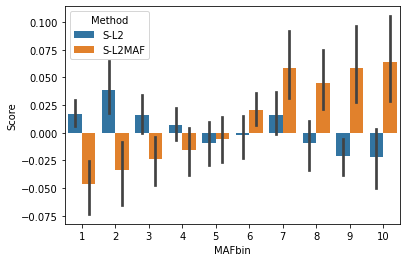

In [24]:
sns.barplot(x='MAFbin', y='Score', hue='Method', data=annot_res.loc[annot_res['Annotation'].isin([
    'Repressed_Hoffman'
])])

Text(0, 0.5, 'Mean(Predicted $\\chi^2$ - Observed $\\chi^2$)')

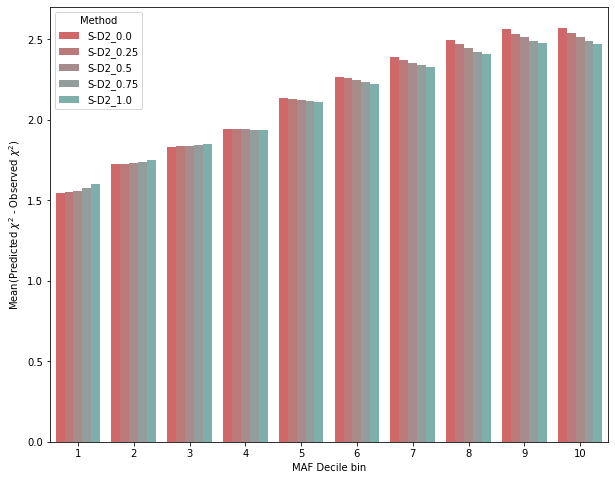

In [16]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='MAFbin', y='Score', hue='Method', data=global_res, ci=None,
           palette={'S-D2_0.0': '#E15759',
        'S-D2_0.25': '#C66F6F',
        'S-D2_0.5': '#AC8786',
        'S-D2_0.75': '#919F9C',
        'S-D2_1.0': '#76B7B2'})
plt.xlabel('MAF Decile bin')
plt.ylabel('Mean(Predicted $\chi^2$ - Observed $\chi^2$)')

In [36]:
list(zip(trait_res['S-L2MAF']['Annotations']['Names'],
    trait_res['S-L2MAF']['Annotations']['tau_star_w']))

[('base', -0.0),
 ('Coding_UCSC', 0.03714826077922697),
 ('Coding_UCSC.flanking.500', -0.341627297777596),
 ('Conserved_LindbladToh', -0.05507533503796234),
 ('Conserved_LindbladToh.flanking.500', 0.2297905726230949),
 ('CTCF_Hoffman', -0.09824377548248402),
 ('CTCF_Hoffman.flanking.500', 0.07169844782311778),
 ('DGF_ENCODE', -0.1760279915218625),
 ('DGF_ENCODE.flanking.500', -0.2784262779675306),
 ('DHS_peaks_Trynka', 0.05075342601027516),
 ('DHS_Trynka', -0.34370916734102763),
 ('DHS_Trynka.flanking.500', 0.07197933215544895),
 ('Enhancer_Andersson', -0.11577836878003424),
 ('Enhancer_Andersson.flanking.500', 0.2418874036090095),
 ('Enhancer_Hoffman', 0.08810334122614713),
 ('Enhancer_Hoffman.flanking.500', -0.23951267967341874),
 ('FetalDHS_Trynka', 0.07665415546365081),
 ('FetalDHS_Trynka.flanking.500', -0.0729922762839743),
 ('H3K27ac_Hnisz', -0.04191475166554869),
 ('H3K27ac_Hnisz.flanking.500', -0.09217139914981398),
 ('H3K27ac_PGC2', -0.07255339713787376),
 ('H3K27ac_PGC2.flank

In [38]:
pd.read_csv("../data/independent_sumstats/UKB_460K.lung_FVCzSMOKE.sumstats.gz", sep="\t")

SNP A1 A2       N   CHISQ       Z
0         rs3094315  G  A  371949  5.2208 -2.2849
1         rs3131972  A  G  371949  5.3935 -2.3224
2         rs3131969  A  G  371949  9.2995 -3.0495
3         rs1048488  C  T  371949  4.5544 -2.1341
4         rs3115850  T  C  371949  4.6587 -2.1584
...             ... .. ..     ...     ...     ...
1187051  rs13056621  A  G  371949  0.1970  0.4439
1187052   rs3865766  C  T  371949  4.6195 -2.1493
1187053   rs3888396  T  C  371949  1.5969  1.2637
1187054   rs2238837  A  C  371949  2.4075 -1.5516
1187055  rs28729663  G  A  371949  1.4578 -1.2074

[1187056 rows x 6 columns]

In [42]:
annot_res = read_pbz2("../data/annotations/annotation_data/EUR/M_5_50.pbz2")
annot_res

{'Covariance': {0.0: array([[1.93250112e+06, 2.69803249e+04, 9.47347599e+04, ...,
          1.28140264e+05, 4.69548423e+03, 1.09359221e+03],
         [2.69803249e+04, 2.69803249e+04, 0.00000000e+00, ...,
          2.82810967e+03, 3.63938758e+02, 2.12034559e+01],
         [9.47347599e+04, 0.00000000e+00, 9.47347599e+04, ...,
          9.68119847e+03, 1.41201249e+03, 9.50267637e+01],
         ...,
         [1.28140264e+05, 2.82810967e+03, 9.68119847e+03, ...,
          6.33012827e+05, 2.21029210e+01, 7.48283430e+01],
         [4.69548423e+03, 3.63938758e+02, 1.41201249e+03, ...,
          2.21029210e+01, 4.69548423e+03, 0.00000000e+00],
         [1.09359221e+03, 2.12034559e+01, 9.50267637e+01, ...,
          7.48283430e+01, 0.00000000e+00, 1.09359221e+03]]),
  0.25: array([[2.51567029e+06, 3.52758385e+04, 1.23488448e+05, ...,
          1.66793265e+05, 6.14963167e+03, 1.42947179e+03],
         [3.52758385e+04, 3.52758385e+04, 0.00000000e+00, ...,
          3.69771286e+03, 4.78950180e+02, 

In [46]:
annot_res['Annotation sum'][1.].reshape(1, -1)

array([[ 5.96115900e+06,  8.50010000e+04,  2.94260000e+05,
         1.47065000e+05,  1.82132100e+06,  1.41963000e+05,
         2.80054000e+05,  8.06918000e+05,  2.40151800e+06,
         6.55488000e+05,  9.88019000e+05,  1.96755600e+06,
         2.57150000e+04,  8.76820000e+04,  2.49911000e+05,
         2.85433000e+05,  4.98847000e+05,  1.18935500e+06,
         2.31915200e+06,  1.87272000e+05,  1.60069800e+06,
         3.97153000e+05,  1.00666200e+06,  2.52428300e+06,
         1.08639500e+06,  2.46604000e+05,  7.92159000e+05,
         7.28182000e+05,  2.27635000e+05,  7.46947000e+05,
         6.22761000e+05,  2.30965900e+06,  5.56790000e+04,
         4.93400000e+04,  1.48357000e+05,  2.76212000e+05,
         6.31280000e+04,  2.74224100e+06,  1.54058700e+06,
         9.96746000e+05,  1.89170000e+04,  7.80742000e+05,
         1.25226000e+06,  2.05774800e+06,  2.48407800e+06,
         1.06150000e+05,  9.85480000e+04,  6.65750000e+04,
         9.10580000e+04,  3.25490000e+04,  1.27493000e+0

In [56]:
annot_df = pd.read_csv("../tables/regression_tables_test/EUR/M_5_50_chi2filt/annotation_metrics.csv")
annot_df

Trait                   Metric    Method  \
0       Respiratory and ENT Diseases                      tau  S-D2_0.0   
1       Respiratory and ENT Diseases                      tau  S-D2_0.0   
2       Respiratory and ENT Diseases                      tau  S-D2_0.0   
3       Respiratory and ENT Diseases                      tau  S-D2_0.0   
4       Respiratory and ENT Diseases                      tau  S-D2_0.0   
...                              ...                      ...       ...   
319125             College Education  differential_enrichment  S-R2_1.0   
319126             College Education  differential_enrichment  S-R2_1.0   
319127             College Education  differential_enrichment  S-R2_1.0   
319128             College Education  differential_enrichment  S-R2_1.0   
319129             College Education  differential_enrichment  S-R2_1.0   

                                              Annotation         Score  \
0                                                   base -3.944672e-08   
1                                            Coding_UCSC  2.241361e-07   
2                               Coding_UCSC.flanking.500  6.061234e-09   
3                                  Conserved_LindbladToh -1.692518e-07   
4                     Conserved_LindbladToh.flanking.500  7.180205e-09   
...                                                  ...           ...   
319125               Ancient_Sequence_Age_Human_Enhancer  5.872636e-08   
319126  Ancient_Sequence_Age_Human_Enhancer.flanking.500 -8.410738e-08   
319127      Human_Enhancer_Villar_Species_Enhancer_Count -2.222808e-08   
319128                        Human_Promoter_Villar_ExAC  5.216467e-09   
319129           Human_Promoter_Villar_ExAC.flanking.500  3.701407e-07   

            Score SE  
0       2.567871e-08  
1       1.154522e-07  
2       3.258653e-08  
3       1.456519e-07  
4       1.944603e-08  
...              ...  
319125  2.974883e-08  
319126  1.189589e-08  
319127 -2.176050e-08  
319128  3.465814e-08  
319129  1.644552e-07  

[319130 rows x 6 columns]

In [61]:
diff_enrich = annot_df.loc[(annot_df['Metric'] == 'differential_enrichment') & 
             (~annot_df['Annotation'].isin(enrichment_exclude))]

piv_dict = {}
piv_se_dict = {}

s_methods = diff_enrich['Method'].unique()

for m in s_methods:
    piv_dict[m] = diff_enrich.loc[(diff_enrich['Method'] == m)].pivot(
        index='Annotation', columns='Trait', values='Score'
    )
    piv_se_dict[m] = diff_enrich.loc[(diff_enrich['Method'] == m)].pivot(
        index='Annotation', columns='Trait', values='Score SE'
    )
    
piv_dict

{'S-D2_0.0': Trait                                             Age at Menarche  \
 Annotation                                                          
 Ancient_Sequence_Age_Human_Enhancer                 -6.317111e-08   
 Ancient_Sequence_Age_Human_Enhancer.flanking.500    -1.496630e-07   
 Ancient_Sequence_Age_Human_Promoter                  3.443978e-07   
 Ancient_Sequence_Age_Human_Promoter.flanking.500     2.873988e-08   
 BivFlnk                                              2.021404e-07   
 ...                                                           ...   
 UTR_5_UCSC.flanking.500                             -1.203295e-08   
 WeakEnhancer_Hoffman                                -9.629959e-08   
 WeakEnhancer_Hoffman.flanking.500                   -2.431979e-08   
 non_synonymous                                      -2.639081e-07   
 synonymous                                          -2.976535e-07   
 
 Trait                                             Age at Menopause  \
 Anno

In [100]:
annot_df['Score SE'] = np.abs(annot_df['Score SE'])

In [102]:
meta_res = meta_analyze_annot(annot_df.loc[~annot_df['Annotation'].isin(enrichment_exclude
                                                                       ],
                   metric='differential_enrichment')
meta_res

(Method                                                S-D2_0.0     S-D2_0.25  \
 Ancient_Sequence_Age_Human_Enhancer               8.622304e-08  8.945744e-08   
 Ancient_Sequence_Age_Human_Enhancer.flanking.500 -3.533105e-08 -3.616463e-08   
 Ancient_Sequence_Age_Human_Promoter               1.485464e-07  1.470465e-07   
 Ancient_Sequence_Age_Human_Promoter.flanking.500  2.527257e-08  2.437486e-08   
 BivFlnk                                           2.885107e-08  3.035544e-08   
 ...                                                        ...           ...   
 UTR_5_UCSC.flanking.500                          -4.037062e-08 -3.841674e-08   
 WeakEnhancer_Hoffman                             -3.228879e-08 -2.888872e-08   
 WeakEnhancer_Hoffman.flanking.500                -4.214834e-08 -4.280297e-08   
 non_synonymous                                   -4.725996e-08 -4.071639e-08   
 synonymous                                       -1.281463e-07 -1.353516e-07   
 
 Method                   

In [128]:
pval_df = pd.DataFrame(-np.log10(2. * stats.norm.sf(abs(meta_res[0] / meta_res[1]))),
             columns=meta_res[0].columns,
             index=meta_res[0].index)

pval_df = pval_df.loc[['MAFbin' not in an and 'flanking.500' not in an for an in pval_df.index]]

pval_df.to_excel("../tables/regression_tables_test/EUR/M_5_50_chi2filt/meta_analyzed_annotation_metrics/differential_enrichment_pvalue.xls")

In [83]:
res = diff_enrich.loc[(diff_enrich.Method == 'S-R2_0.0') & (diff_enrich.Annotation == 'H3K27ac_PGC2.flanking.500')]
res

Trait                   Metric    Method  \
6326         Respiratory and ENT Diseases  differential_enrichment  S-R2_0.0   
13116                     Age first birth  differential_enrichment  S-R2_0.0   
19906                            Anorexia  differential_enrichment  S-R2_0.0   
26696                         Neuroticism  differential_enrichment  S-R2_0.0   
33486   Red Blood Cell Distribution Width  differential_enrichment  S-R2_0.0   
40276                Rheumatoid Arthritis  differential_enrichment  S-R2_0.0   
47066                     Age at Menarche  differential_enrichment  S-R2_0.0   
53856                    Sunburn Occasion  differential_enrichment  S-R2_0.0   
60646                     Crohn's Disease  differential_enrichment  S-R2_0.0   
67436                Red Blood Cell Count  differential_enrichment  S-R2_0.0   
74226           Number children ever born  differential_enrichment  S-R2_0.0   
81016                          Hair Color  differential_enrichment  S-R2_0.0   
87806                       Schizophrenia  differential_enrichment  S-R2_0.0   
94596              White Blood Cell Count  differential_enrichment  S-R2_0.0   
101386                   Age at Menopause  differential_enrichment  S-R2_0.0   
108176             Type 2 Diabetes (UKBB)  differential_enrichment  S-R2_0.0   
114966                      Height (UKBB)  differential_enrichment  S-R2_0.0   
121756                                BMI  differential_enrichment  S-R2_0.0   
128546                            Tanning  differential_enrichment  S-R2_0.0   
135336                       Heel T Score  differential_enrichment  S-R2_0.0   
142126                     Hypothyroidism  differential_enrichment  S-R2_0.0   
148916                 Auto Immune Traits  differential_enrichment  S-R2_0.0   
155706                   High Cholesterol  differential_enrichment  S-R2_0.0   
162496                             Eczema  differential_enrichment  S-R2_0.0   
169286                    Autism Spectrum  differential_enrichment  S-R2_0.0   
176076                         Skin Color  differential_enrichment  S-R2_0.0   
182866                     Smoking Status  differential_enrichment  S-R2_0.0   
189656                                LDL  differential_enrichment  S-R2_0.0   
196446                                HDL  differential_enrichment  S-R2_0.0   
203236                Depressive symptoms  differential_enrichment  S-R2_0.0   
210026                     FEV1-FVC Ratio  differential_enrichment  S-R2_0.0   
216816                     Morning Person  differential_enrichment  S-R2_0.0   
223606                         BMI (UKBB)  differential_enrichment  S-R2_0.0   
230396                        Ever Smoked  differential_enrichment  S-R2_0.0   
237186                    Type 2 Diabetes  differential_enrichment  S-R2_0.0   
243976                     Balding Type I  differential_enrichment  S-R2_0.0   
250766        Forced Vital Capacity (FVC)  differential_enrichment  S-R2_0.0   
257556              Dermatologic Diseases  differential_enrichment  S-R2_0.0   
264346            Coronary Artery Disease  differential_enrichment  S-R2_0.0   
271136                    Waist-hip Ratio  differential_enrichment  S-R2_0.0   
277926                 Ulcerative Colitis  differential_enrichment  S-R2_0.0   
284716                   Eosinophil Count  differential_enrichment  S-R2_0.0   
291506                             Height  differential_enrichment  S-R2_0.0   
298296                 Years of Education  differential_enrichment  S-R2_0.0   
305086                     Platelet Count  differential_enrichment  S-R2_0.0   
311876            Systolic Blood Pressure  differential_enrichment  S-R2_0.0   
318666                  College Education  differential_enrichment  S-R2_0.0   

                       Annotation         Score      Score SE  
6326    H3K27ac_PGC2.flanking.500 -2.344308e-08  5.940182e-10  
13116   H3K27ac_PGC2.flanking.500 -9.115923e-09  2.020948e-09  
199

In [90]:
np.array(ro.FloatVector(res['Score SE'].values))

array([ 5.94018198e-10,  2.02094780e-09,  3.50807856e-08, -6.37166575e-09,
        6.35313544e-09,  4.79855570e-08, -1.37430522e-09,  1.72002793e-08,
        9.64365845e-08,  1.43130484e-08,  3.81442671e-09,  4.26555357e-08,
       -1.59632957e-08, -2.41554824e-09,  1.23188060e-08,  3.88600956e-09,
       -3.77987666e-08,  5.82884403e-09,  2.99493647e-08,  5.53272963e-09,
        8.10814679e-09,  3.98447416e-09,  9.11184994e-09,  1.78383523e-09,
        1.24700934e-07,  2.99237265e-08, -6.68768429e-09,  2.46709072e-08,
        2.64080595e-08,  7.98657292e-09, -9.00679339e-09, -5.61021678e-09,
       -2.09863704e-08,  1.96993317e-08,  3.55489619e-08,  3.17139885e-08,
       -1.62910321e-08,  4.91907909e-09,  2.67145378e-08, -7.58306149e-09,
        6.49609234e-08,  6.05506706e-09,  5.62341722e-09, -5.00297900e-09,
       -8.28503064e-09, -1.13286424e-08, -8.50174719e-09])

In [98]:
dict(r_meta.metagen(ro.FloatVector(res['Score'].values),
                    ro.FloatVector(np.abs(res['Score SE'].values))).items())

{'studlab': R object with classes: ('RTYPES.INTSXP',) mapped to:
 [1, 2, 3, 4, ..., 44, 45, 46, 47],
 'TE': R object with classes: ('numeric',) mapped to:
 [-0.000000, -0.000000, 0.000000, -0.000000, ..., -0.000000, -0.000000, -0.000000, -0.000000],
 'seTE': R object with classes: ('numeric',) mapped to:
 [0.000000, 0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000, 0.000000],
 'lower': R object with classes: ('numeric',) mapped to:
 [-0.000000, -0.000000, -0.000000, -0.000000, ..., -0.000000, -0.000000, -0.000000, -0.000000],
 'upper': R object with classes: ('numeric',) mapped to:
 [-0.000000, -0.000000, 0.000000, -0.000000, ..., -0.000000, -0.000000, -0.000000, -0.000000],
 'zval': R object with classes: ('numeric',) mapped to:
 [-39.465248, -4.510717, 0.412008, -4.802126, ..., -3.675599, -16.797887, -4.640158, -3.290919],
 'pval': R object with classes: ('numeric',) mapped to:
 [0.000000, 0.000006, 0.680334, 0.000002, ..., 0.000237, 0.000000, 0.000003, 0.000999],
 'w.

In [41]:
class Jackknife(object):

    '''
    Base class for jackknife objects. Input involves x,y, so this base class is tailored
    for statistics computed from independent and dependent variables (e.g., regressions).
    The __delete_vals_to_pseudovalues__ and __jknife__ methods will still be useful for other
    sorts of statistics, but the __init__ method will need to be overriden.

    Parameters
    ----------
    x : np.matrix with shape (n, p)
        Independent variable.
    y : np.matrix with shape (n, 1)
        Dependent variable.
    n_blocks : int
        Number of jackknife blocks
    *args, **kwargs :
        Arguments for inheriting jackknives.

    Attributes
    ----------
    n_blocks : int
        Number of jackknife blocks
    p : int
        Dimensionality of the independent varianble
    N : int
        Number of datapoints (equal to x.shape[0])

    Methods
    -------
    jknife(pseudovalues):
        Computes jackknife estimate and variance from the jackknife pseudovalues.
    delete_vals_to_pseudovalues(delete_vals, est):
        Converts delete values and the whole-data estimate to pseudovalues.
    get_separators():
        Returns (approximately) evenly-spaced jackknife block boundaries.
    '''

    def __init__(self, func_inputs, n_blocks=None, separators=None):
        
        N = np.unique([fi.shape[0] for fi in func_inputs])
        
        if len(N) > 1:
            raise ValueError('Function inputs must of the same size.')
        else:
            self.N = N[0]
        
        self.func_inputs = func_inputs
        
        if separators is not None:
            if max(separators) != self.N:
                raise ValueError(
                    'Max(separators) must be equal to number of data points.')
            if min(separators) != 0:
                raise ValueError('Max(separators) must be equal to 0.')
            self.separators = sorted(separators)
            self.n_blocks = len(separators) - 1
        elif n_blocks is not None:
            self.n_blocks = n_blocks
            self.separators = self.get_separators(self.N, self.n_blocks)
        else:
            raise ValueError('Must specify either n_blocks are separators.')

        if self.n_blocks > self.N:
            raise ValueError('More blocks than data points.')

    @classmethod
    def jknife(cls, pseudovalues):
        '''
        Converts pseudovalues to jackknife estimate and variance.

        Parameters
        ----------
        pseudovalues : np.matrix pf floats with shape (n_blocks, p)

        Returns
        -------
        jknife_est : np.matrix with shape (1, p)
            Jackknifed estimate.
        jknife_var : np.matrix with shape (1, p)
            Variance of jackknifed estimate.
        jknife_se : np.matrix with shape (1, p)
            Standard error of jackknifed estimate, equal to sqrt(jknife_var).
        jknife_cov : np.matrix with shape (p, p)
            Covariance matrix of jackknifed estimate.

        '''
        n_blocks = pseudovalues.shape[0]
        jknife_cov = np.atleast_2d(np.cov(pseudovalues.T, ddof=1) / n_blocks)
        jknife_var = np.atleast_2d(np.diag(jknife_cov))
        jknife_se = np.atleast_2d(np.sqrt(jknife_var))
        jknife_est = np.atleast_2d(np.mean(pseudovalues, axis=0))
        return (jknife_est, jknife_var, jknife_se, jknife_cov)

    @classmethod
    def delete_values_to_pseudovalues(cls, delete_values, est):
        '''
        Converts whole-data estimate and delete values to pseudovalues.

        Parameters
        ----------
        delete_values : np.matrix with shape (n_blocks, p)
            Delete values.
        est : np.matrix with shape (1, p):
            Whole-data estimate.

        Returns
        -------
        pseudovalues : np.matrix with shape (n_blocks, p)
            Psuedovalues.

        Raises
        ------
        ValueError :
            If est.shape != (1, delete_values.shape[1])

        '''
        n_blocks, p = delete_values.shape
        if est.shape != (1, p):
            raise ValueError(
                'Different number of parameters in delete_values than in est.')

        return n_blocks * est - (n_blocks - 1) * delete_values

    @classmethod
    def get_separators(cls, N, n_blocks):
        '''Define evenly-spaced block boundaries.'''
        return np.floor(np.linspace(0, N, n_blocks + 1)).astype(int)
    
    def delete_values(cls, func, s):
        '''
        Compute delete values by deleting one block at a time.

        Parameters
        ----------
        x : np.matrix with shape (n, p)
            Independent variable.
        y : np.matrix with shape (n, 1)
            Dependent variable.
        func : function (n, p) , (n, 1) --> (1, p)
            Function of x and y to be jackknived.
        s : list of ints
            Block separators.

        Returns
        -------
        delete_values : np.matrix with shape (n_blocks, p)
            Delete block values (with n_blocks blocks defined by parameter s).

        Raises
        ------
        ValueError :
            If x.shape[0] does not equal y.shape[0] or x and y are not 2D.

        '''
        d = [func(
            *(np.vstack([x[0:s[i], ...], x[s[i + 1]:, ...]]) for x in cls.func_inputs))
             for i in range(len(s) - 1)]

        return np.concatenate(d, axis=0)
    
    
    def resample(cls, func):
        del_vals = cls.delete_values(func, cls.separators)
        return cls.jknife(cls.delete_values_to_pseudovalues(del_vals, func(*cls.func_inputs)))

In [44]:
x = np.random.normal(loc=5, scale=5, size=200).reshape(-1, 1)
y = np.random.normal(loc=5, scale=5, size=200).reshape(-1, 1)

mean = (1, 2)
cov = [[1, 0.5], [0.5, 1]]
x = np.random.multivariate_normal(mean, cov, size=200)
print(np.corrcoef(x[:, 0], x[:, 1])[0, 1])

jk = Jackknife([x[:, :1], x[:, 1:]], 20)
jk.resample(lambda x, y: np.array([np.corrcoef(x.flatten(), y.flatten())[0, 1]]).reshape(-1, 1))

0.5297964089843217


(array([[0.52844871]]),
 array([[0.00149795]]),
 array([[0.03870333]]),
 array([[0.00149795]]))

In [31]:
mean = (1, 2)
cov = [[1, 0.5], [0.5, 1]]
x = np.random.multivariate_normal(mean, cov, size=200)
x
np.corrcoef(x[:, 0], x[:, 1])

array([[1.        , 0.53356093],
       [0.53356093, 1.        ]])

In [29]:
x[:, :1], x[:, 1:]

(array([[ 1.54039849e+00],
        [ 2.69727762e+00],
        [ 1.09506024e+00],
        [ 1.15425966e+00],
        [ 1.47762035e+00],
        [ 5.85343006e-01],
        [ 1.57355844e+00],
        [ 1.90059935e+00],
        [ 4.09127358e-02],
        [ 2.87638732e+00],
        [ 1.19774055e+00],
        [ 8.78117387e-01],
        [-4.49556109e-01],
        [-1.86486999e+00],
        [ 1.15402346e+00],
        [ 1.39153202e+00],
        [ 2.03798164e+00],
        [-1.08441200e+00],
        [-7.27468635e-01],
        [ 1.35230351e+00],
        [-4.63850880e-01],
        [ 8.56052897e-02],
        [ 2.12411895e+00],
        [ 2.59305409e+00],
        [ 1.88372645e+00],
        [ 1.02822047e+00],
        [ 2.04470945e+00],
        [ 2.76706264e+00],
        [ 1.32507912e+00],
        [ 1.75801334e+00],
        [ 1.30602456e+00],
        [ 1.44896171e-01],
        [ 1.50578497e+00],
        [ 1.58826719e+00],
        [ 2.02394815e+00],
        [-1.78656243e-01],
        [ 1.98381807e+00],
 

In [ ]:
n_blocks = jknife.delete_values.shape[0]
        numer_delete_vals = np.multiply(
            M, jknife.delete_values[:, 0:n_annot]) / Nbar  # (n_blocks, n_annot)
        denom_delete_vals = np.sum(
            numer_delete_vals, axis=1).reshape((n_blocks, 1))
        denom_delete_vals = np.dot(denom_delete_vals, np.ones((1, n_annot)))
        prop = jk.RatioJackknife(
            cat / tot, numer_delete_vals, denom_delete_vals)

In [24]:
del_vals.shape

(20, 1)

In [20]:
x.shape, x.T.shape

((200, 1), (1, 200))

In [5]:
np.unique([1, 1, 1])

array([1])

In [52]:
def weighted_cov(chi2, pred_chi2, w):
    """
    Used to compute weighted correlation as defined by Speed, Holmes and Balding
    https://www.biorxiv.org/content/10.1101/736496v2.full
    """
    return np.dot((1./w).T, chi2*pred_chi2)*np.sum(1./w) - np.dot((1./w).T, chi2)*np.dot((1./w).T, pred_chi2)


def weighted_corr(chi2, pred_chi2, w):
    return weighted_cov(chi2, pred_chi2, w) / np.sqrt(
        weighted_cov(chi2, chi2, w) * weighted_cov(pred_chi2, pred_chi2, w)
    )

def compute_prediction_metrics(pred_chi2, true_chi2, w):

    w = np.maximum(w, 1.)

    jk = Jackknife([pred_chi2.reshape(-1, 1),
                    true_chi2.reshape(-1, 1),
                    w.reshape(-1, 1)], n_blocks=200)

    return {
        'Mean Predicted Chisq': jk.resample(
            lambda p, t, w: np.array([np.mean(p)]).reshape(-1, 1)
        ),
        'Mean True Chisq': jk.resample(
            lambda p, t, w: np.array([np.mean(t)]).reshape(-1, 1)
        ),
        'Mean Difference': jk.resample(
            lambda p, t, w: np.array([np.mean(p - t)]).reshape(-1, 1)
        ),
        'Weighted Mean Difference': jk.resample(
            lambda p, t, w: np.array([np.mean((1./w)*(p - t))]).reshape(-1, 1)
        ),
        'Mean Squared Difference': jk.resample(
            lambda p, t, w: np.array([np.mean((p - t)**2)]).reshape(-1, 1)
        ),
        'Weighted Mean Squared Difference': jk.resample(
            lambda p, t, w: np.array([np.mean((1./w)*(p - t)**2)]).reshape(-1, 1)
        ),
        'Correlation': jk.resample(
            lambda p, t, w: np.array([np.corrcoef(p.flatten(), t.flatten())[0, 1]]).reshape(-1, 1)
        ),
        'Weighted Correlation': jk.resample(
            lambda p, t, w: np.array([weighted_corr(t, p, w)]).reshape(-1, 1)
        )
    }

In [53]:
mean = (1, 2)
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, size=200)

df = pd.DataFrame({'x': data[:, 0],
              'y': data[:, 1],
              'w': 1. + np.random.uniform(size=200)})
              
compute_prediction_metrics(df['x'].values, df['y'].values, df['w'].values)

{'Mean Predicted Chisq': (array([[1.06278149]]),
  array([[0.00497537]]),
  array([[0.07053629]]),
  array([[0.00497537]])),
 'Mean True Chisq': (array([[1.91951447]]),
  array([[0.0052054]]),
  array([[0.07214847]]),
  array([[0.0052054]])),
 'Mean Difference': (array([[-0.85673298]]),
  array([[0.0050424]]),
  array([[0.07100986]]),
  array([[0.0050424]])),
 'Weighted Mean Difference': (array([[-0.60802307]]),
  array([[0.00289035]]),
  array([[0.05376201]]),
  array([[0.00289035]])),
 'Mean Squared Difference': (array([[1.73742899]]),
  array([[0.03014054]]),
  array([[0.17361031]]),
  array([[0.03014054]])),
 'Weighted Mean Squared Difference': (array([[1.25486613]]),
  array([[0.0164404]]),
  array([[0.12822011]]),
  array([[0.0164404]])),
 'Correlation': (array([[0.50556686]]),
  array([[0.00314909]]),
  array([[0.05611674]]),
  array([[0.00314909]])),
 'Weighted Correlation': (array([[0.50683458]]),
  array([[0.0033847]]),
  array([[0.0581782]]),
  array([[0.0033847]]))}